# <p style="text-align: center;">**Project: Volatility Forecasting**</p>

In [1]:
if (!require(zoo)) install.packages('zoo')
if (!require(urca)) install.packages('urca')
if (!require(rugarch)) install.packages('rugarch')
if (!require(repr)) install.packages('repr')
if (!require(aTSA)) install.packages('aTSA')
if (!require(quantmod)) install.packages('quantmod')
if (!require(forecast)) install.packages('forecast')
if (!require(highfrequency)) install.packages('highfrequency')
if (!require(fGarch)) install.packages('fGarch')
if (!require(tseries)) install.packages('tseries')
if (!require(ggplot2)) install.packages('ggplot2')
if (!require(ggthemes)) install.packages('ggthemes')

library(zoo)
library(urca)
library(rugarch)
library(repr)
library(aTSA)
library(quantmod)
library(forecast)
library(highfrequency)
library(fGarch)
library(tseries)
library(ggplot2)
library(ggthemes)

options(repr.plot.width = 14, repr.plot.height = 10)

Loading required package: zoo




Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: urca

Loading required package: rugarch

Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma


Loading required package: repr

Loading required package: aTSA


Attaching package: 'aTSA'


The following object is masked from 'package:graphics':

    identify


Loading required package: quantmod

Loading required package: xts

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: forecast


Attaching package: 'forecast'


The following object is masked from 'package:aTSA':

    forecast


Loading required package: highfrequency

Loading required package: fGarch

NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch

# 1. Data description
## Provide short summary of descriptive statistics, ACF plots and plots of data you are going to use.

In [2]:
load("8.RData")
ls()

[1] "acn"

”.RData” file contains an xts file with:
* returns (ret),
* realized volatility (RV),
* positive realized semi-volatility (RV p),
* negative realized semi-volatility (RV n),
* realized skewness (RS),
* realized kurtosis (RK).






In [3]:
nrow(acn)
head(acn, 2)
tail(acn, 2)

[1] 1500

                    ret          RV       RV_p        RV_n         RS       RK
2010-01-05  0.013151510 0.008419666 0.00580238 0.006101079 -0.5886803 5.646397
2010-01-06 -0.001665497 0.013340333 0.01092583 0.007654465  1.1229024 7.638631

                    ret         RV        RV_p        RV_n        RS       RK
2016-01-21 -0.006039409 0.01748914 0.012286796 0.012446073 0.1629330 3.930343
2016-01-22  0.007544105 0.01023658 0.008202391 0.006124401 0.3890174 3.184639

Upon reviewing the data set, it consists of 1,500 daily samples spanning from 2010 to 2016. With each year comprising 250 trading days, this equates to approximately six years of data.

In [4]:
rets <- acn$ret
RV_day <- acn$RV
RV_p <- acn$RV_p
RV_n <- acn$RV_n
RV_RS <- acn$RS
RV_RK <- acn$RK

### Brief overall description

In [5]:
summary(acn)

     Index                 ret                   RV          
 Min.   :2010-01-05   Min.   :-0.1114461   Min.   :0.003709  
 1st Qu.:2011-07-04   1st Qu.:-0.0063869   1st Qu.:0.007766  
 Median :2013-01-10   Median : 0.0006812   Median :0.009290  
 Mean   :2013-01-08   Mean   : 0.0006718   Mean   :0.010241  
 3rd Qu.:2014-07-14   3rd Qu.: 0.0080830   3rd Qu.:0.011636  
 Max.   :2016-01-22   Max.   : 0.1110067   Max.   :0.038817  
      RV_p               RV_n                RS                 RK        
 Min.   :0.002165   Min.   :0.002123   Min.   :-4.86293   Min.   : 2.214  
 1st Qu.:0.005315   1st Qu.:0.005098   1st Qu.:-0.52304   1st Qu.: 3.847  
 Median :0.006641   Median :0.006281   Median : 0.09954   Median : 4.941  
 Mean   :0.007305   Mean   :0.007019   Mean   : 0.15475   Mean   : 6.676  
 3rd Qu.:0.008234   3rd Qu.:0.008090   3rd Qu.: 0.78176   3rd Qu.: 7.383  
 Max.   :0.031675   Max.   :0.030878   Max.   : 5.62864   Max.   :42.240  

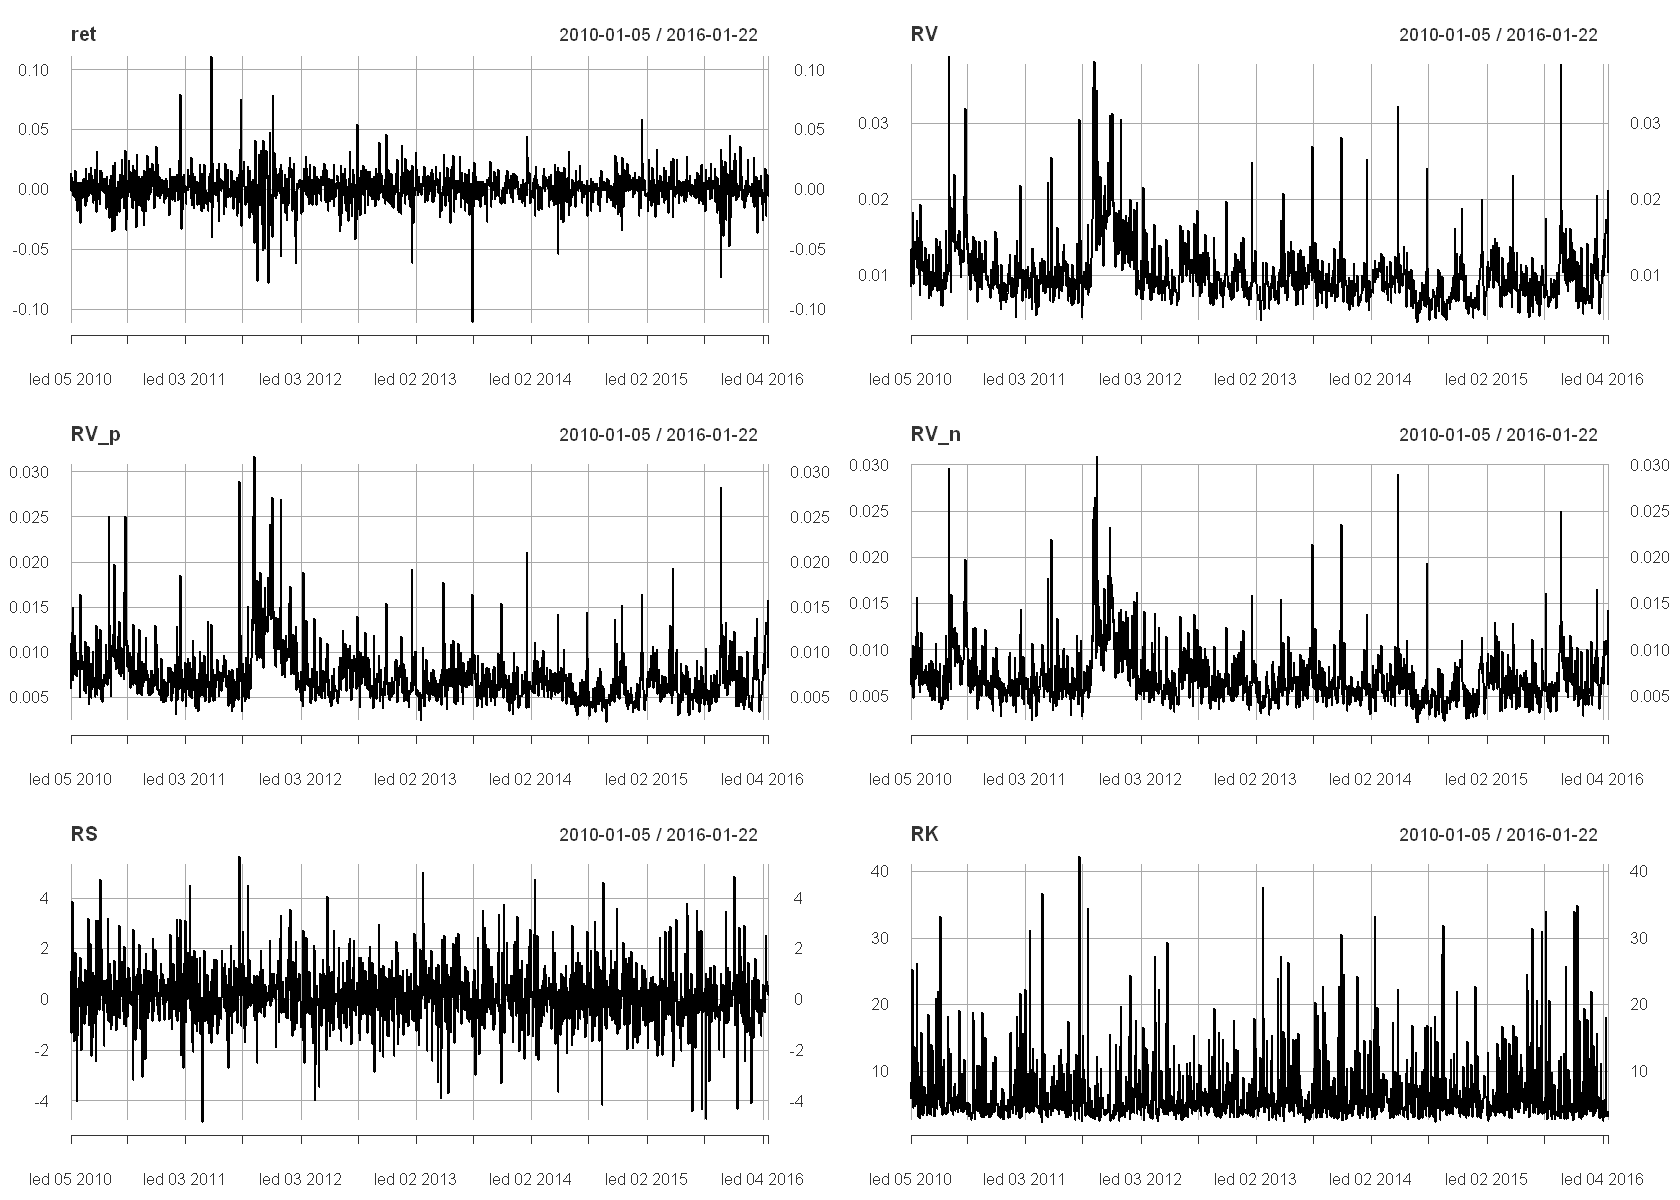

In [6]:
# plots time series of all columns of acn into 6 subplots
par(mfrow = c(3, 2))
# for (i in 1:6) {
#   plot(acn[, i], main = colnames(acn)[i])
# }
plot(acn[, 1], main = colnames(acn)[1])
plot(acn[, 2], main = colnames(acn)[2])
plot(acn[, 3], main = colnames(acn)[3])
plot(acn[, 4], main = colnames(acn)[4])
plot(acn[, 5], main = colnames(acn)[5])
plot(acn[, 6], main = colnames(acn)[6])

### Data description - Returns

In [7]:
# Calculate descriptive statistics
mean_return <- mean(rets)
std_dev <- sd(rets)
min_return <- min(rets)
max_return <- max(rets)
quantiles <- quantile(rets)

# Print descriptive statistics
cat("Mean Return:", mean_return, "\n")
cat("Standard Deviation:", std_dev, "\n")
cat("Minimum Return:", min_return, "\n")
cat("Maximum Return:", max_return, "\n")
cat("Quantiles:", quantiles, "\n")

Mean Return: 0.0006718148 
Standard Deviation: 0.01447971 


Minimum Return: -0.111446 
Maximum Return: 0.1110067 
Quantiles: -0.111446 -0.006386941 0.000681214 0.008083024 0.1110067 


Our returns data indicates a modest mean daily return of approximately 0.07%. However, with a standard deviation of 1.45%, our returns exhibit notable variability. The range of returns is extensive, spanning from a minimum of -11.14% to a maximum of 11.10%. Quantiles reveal a symmetric distribution around the median, with the majority of returns falling within the interquartile range (-0.64% to 0.81%). These statistics suggest that while our returns maintain a positive average, they also demonstrate significant volatility and a wide spectrum of values.

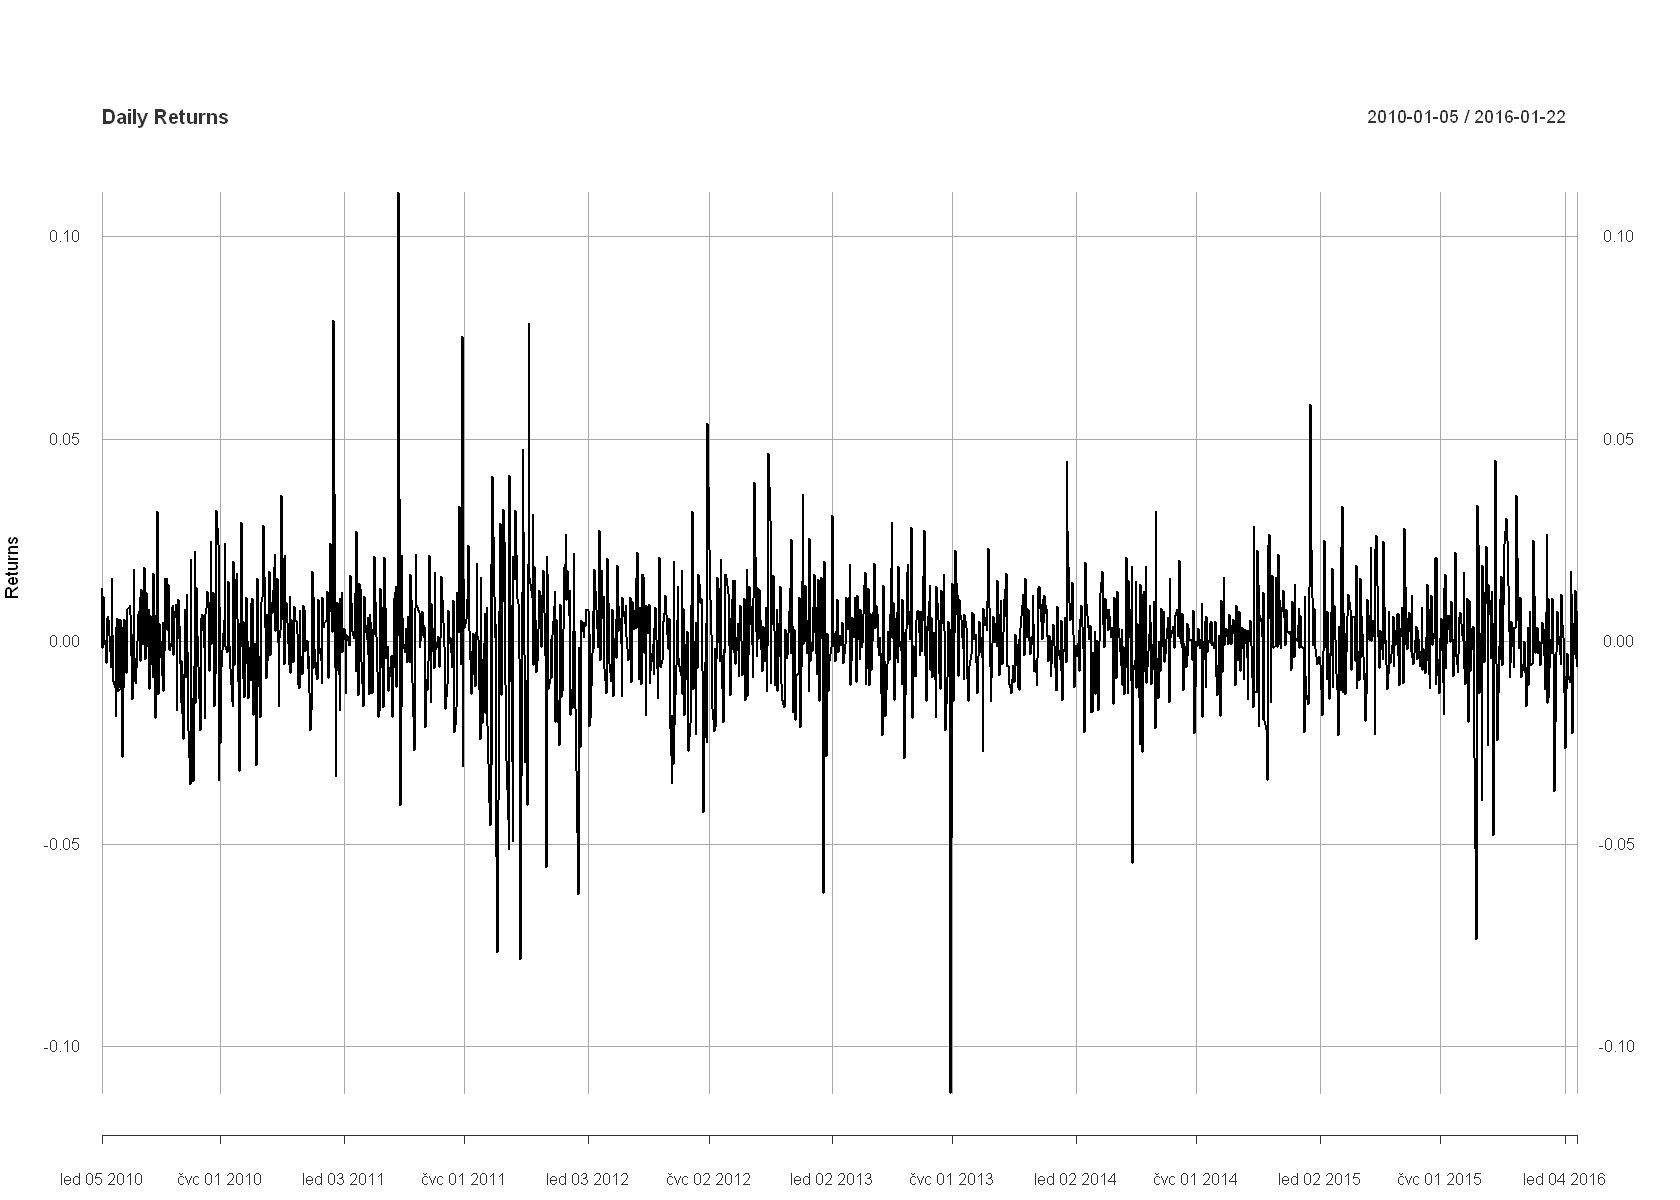

In [8]:
# Ploting our time series data
plot(rets, main = "Daily Returns", xlab = "Date", ylab = "Returns")

Based on the plot, we can observe that the mean of the returns is likely zero. There is evident autocorrelation, and the data appears to be stationary.
Additionaly, we might observe some volatility clusters. For instance, tt is noticeable larger volatility in 2011, especially in the second half of the year and also in the year 2015.


### Histogram

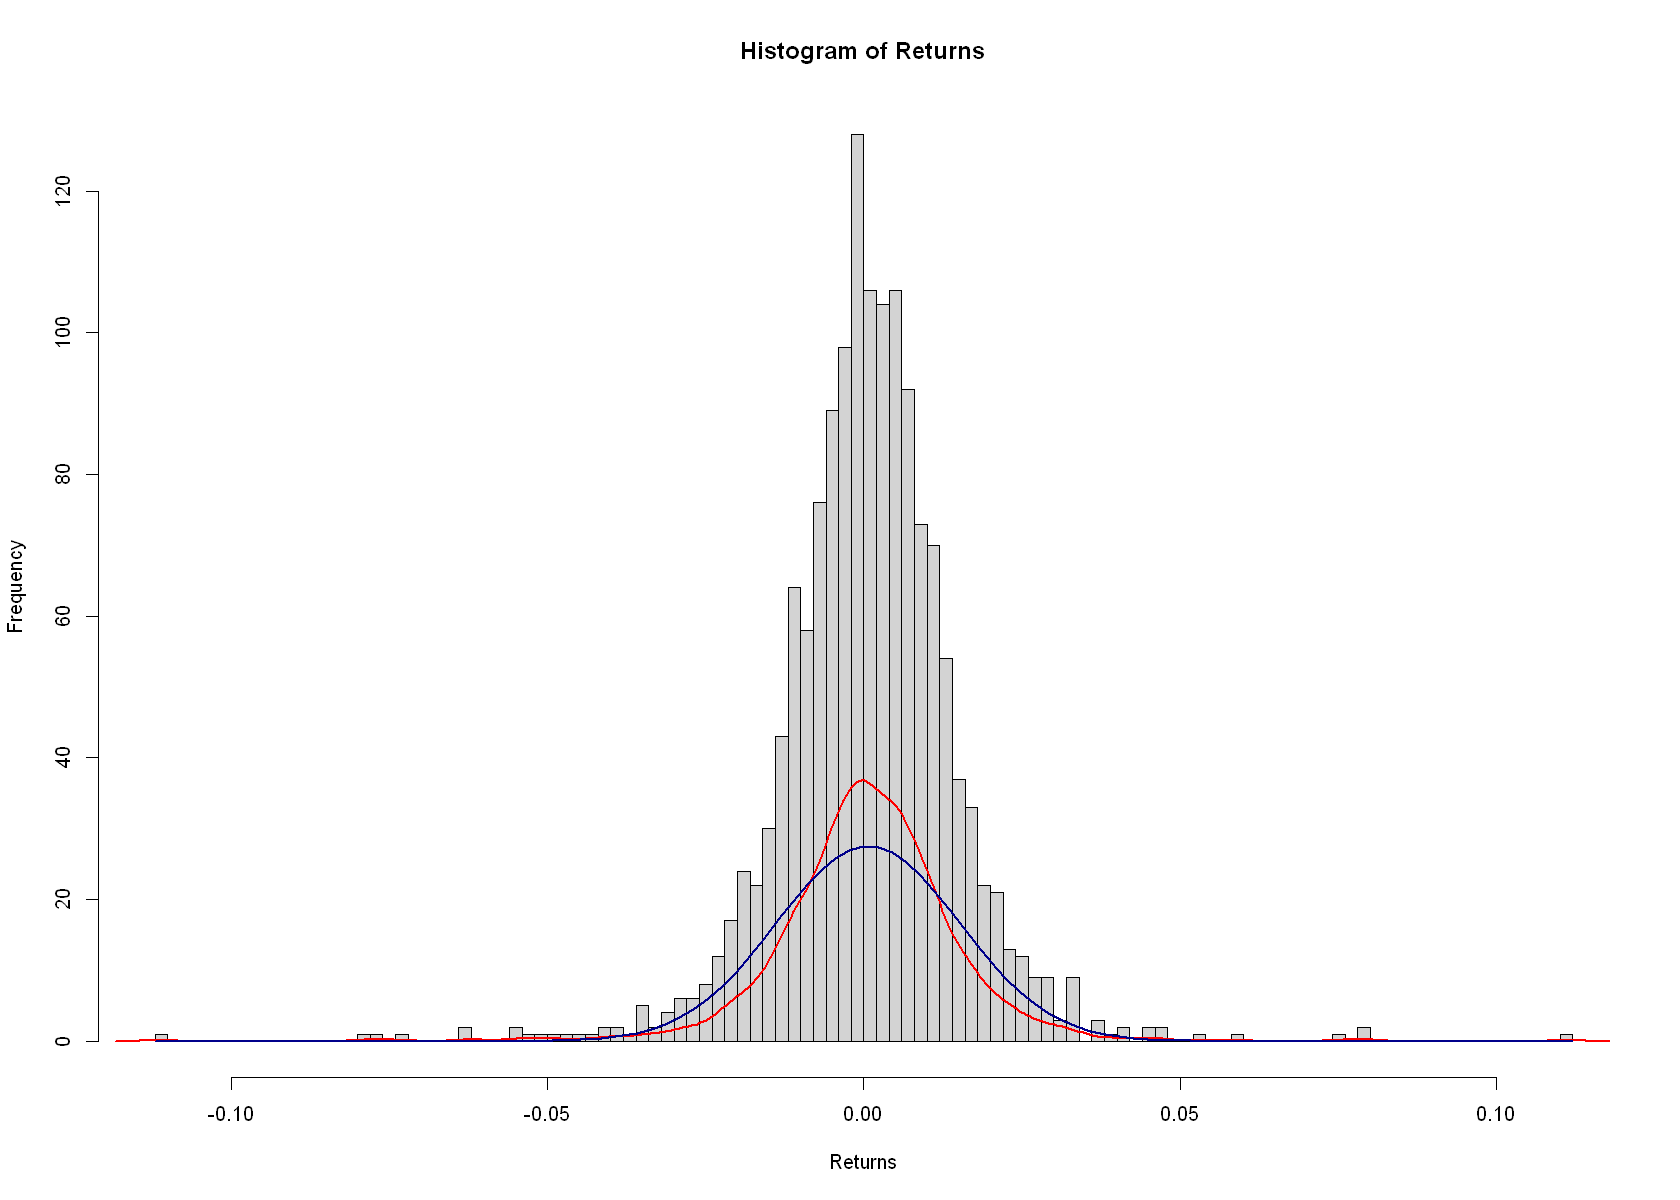

In [9]:
# plot histogram of rets
hist(rets, breaks = "FD", main = "Histogram of Returns", xlab = "Returns", ylab = "Frequency")
# include an empirical density curve
lines(density(rets), col = "red", lwd = 2)
# include a normal curve
curve(dnorm(x, mean = mean_return, sd = std_dev), col = "darkblue", lwd = 2, add = TRUE)
# 

From the plot above, it is observable that empirical distribution slightly differs from the normal distribution. We also test for series to follow normal distribution using Jarque-Bera test and we reject the null hypothesis of normally distrubuted data.

In [10]:
jarque.bera.test(rets)


	Jarque Bera Test

data:  rets
X-squared = 4422.7, df = 2, p-value < 2.2e-16


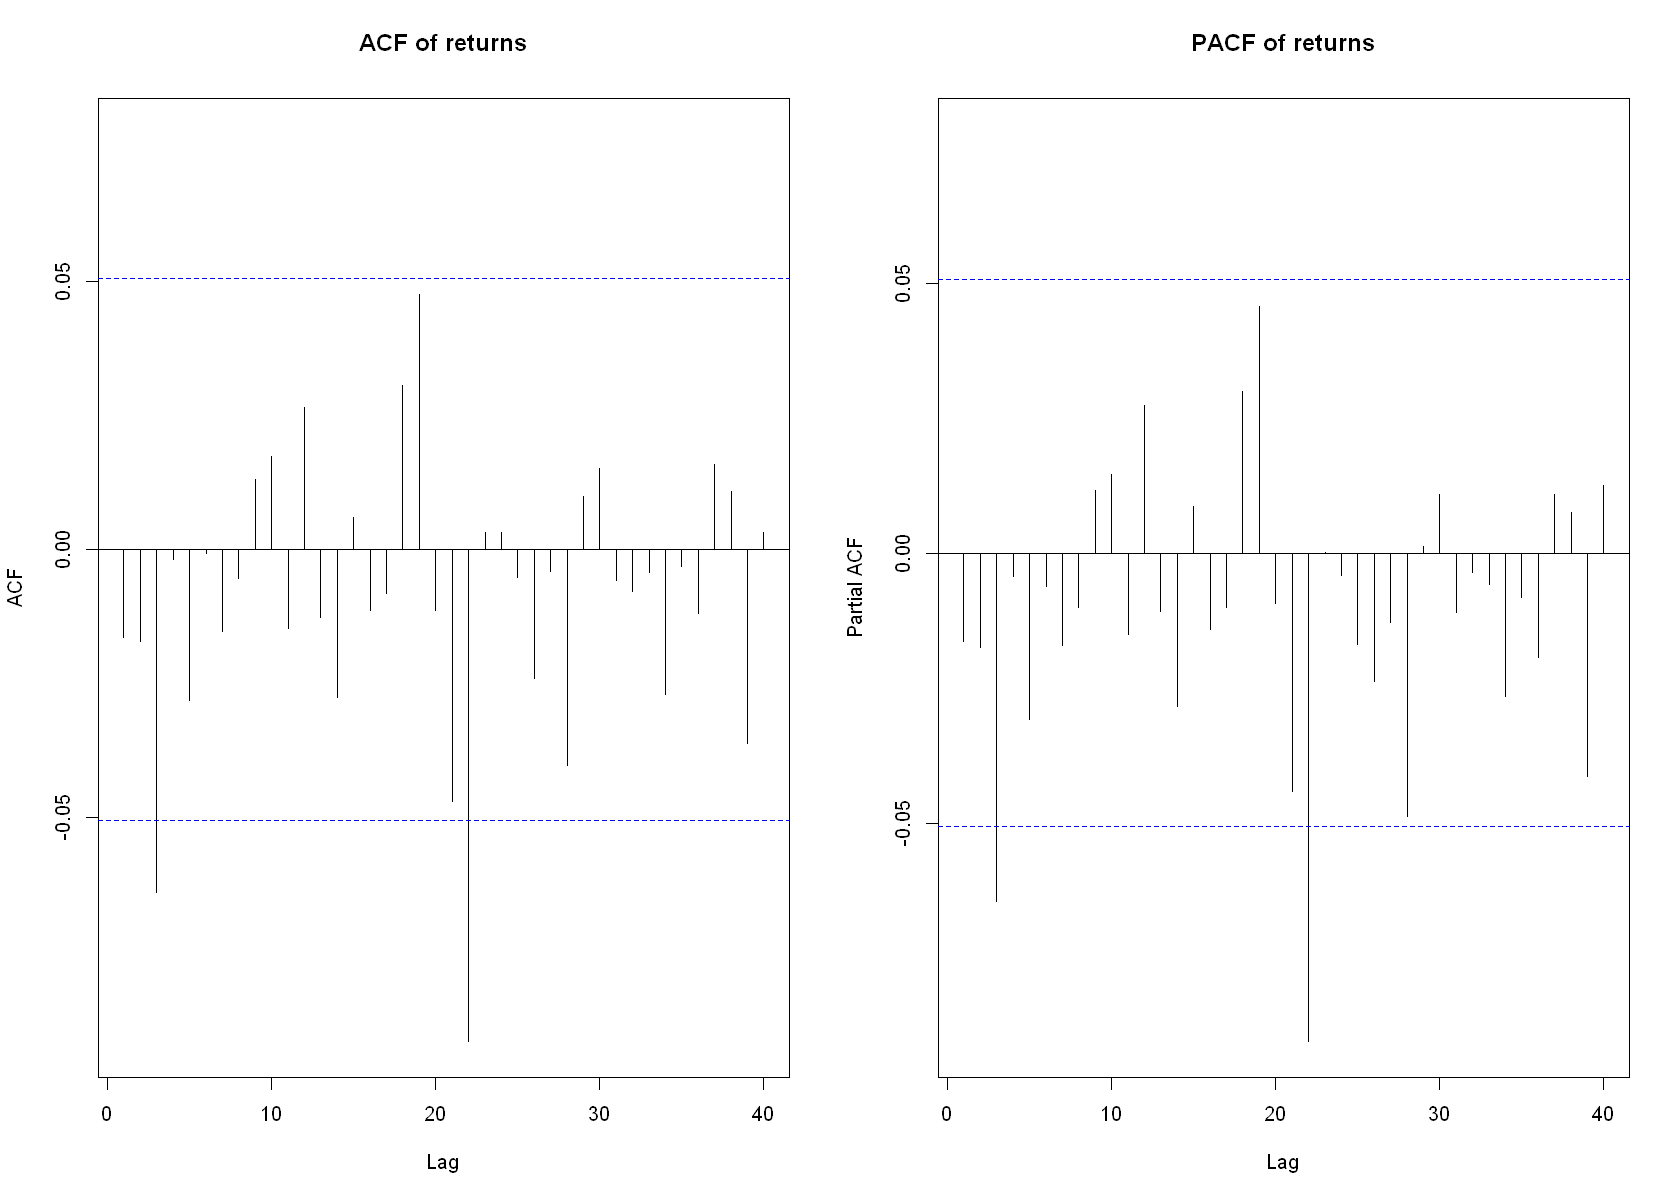

In [11]:
par(mfrow=c(1,2))
Acf(rets, main =  'ACF of returns', lag = 40)
Pacf(rets, main = 'PACF of returns', lag = 40)

It's difficult to definitively say from these plots whether the time series is stationary or not. We need to perform tests for stationarity and autocorrelation.

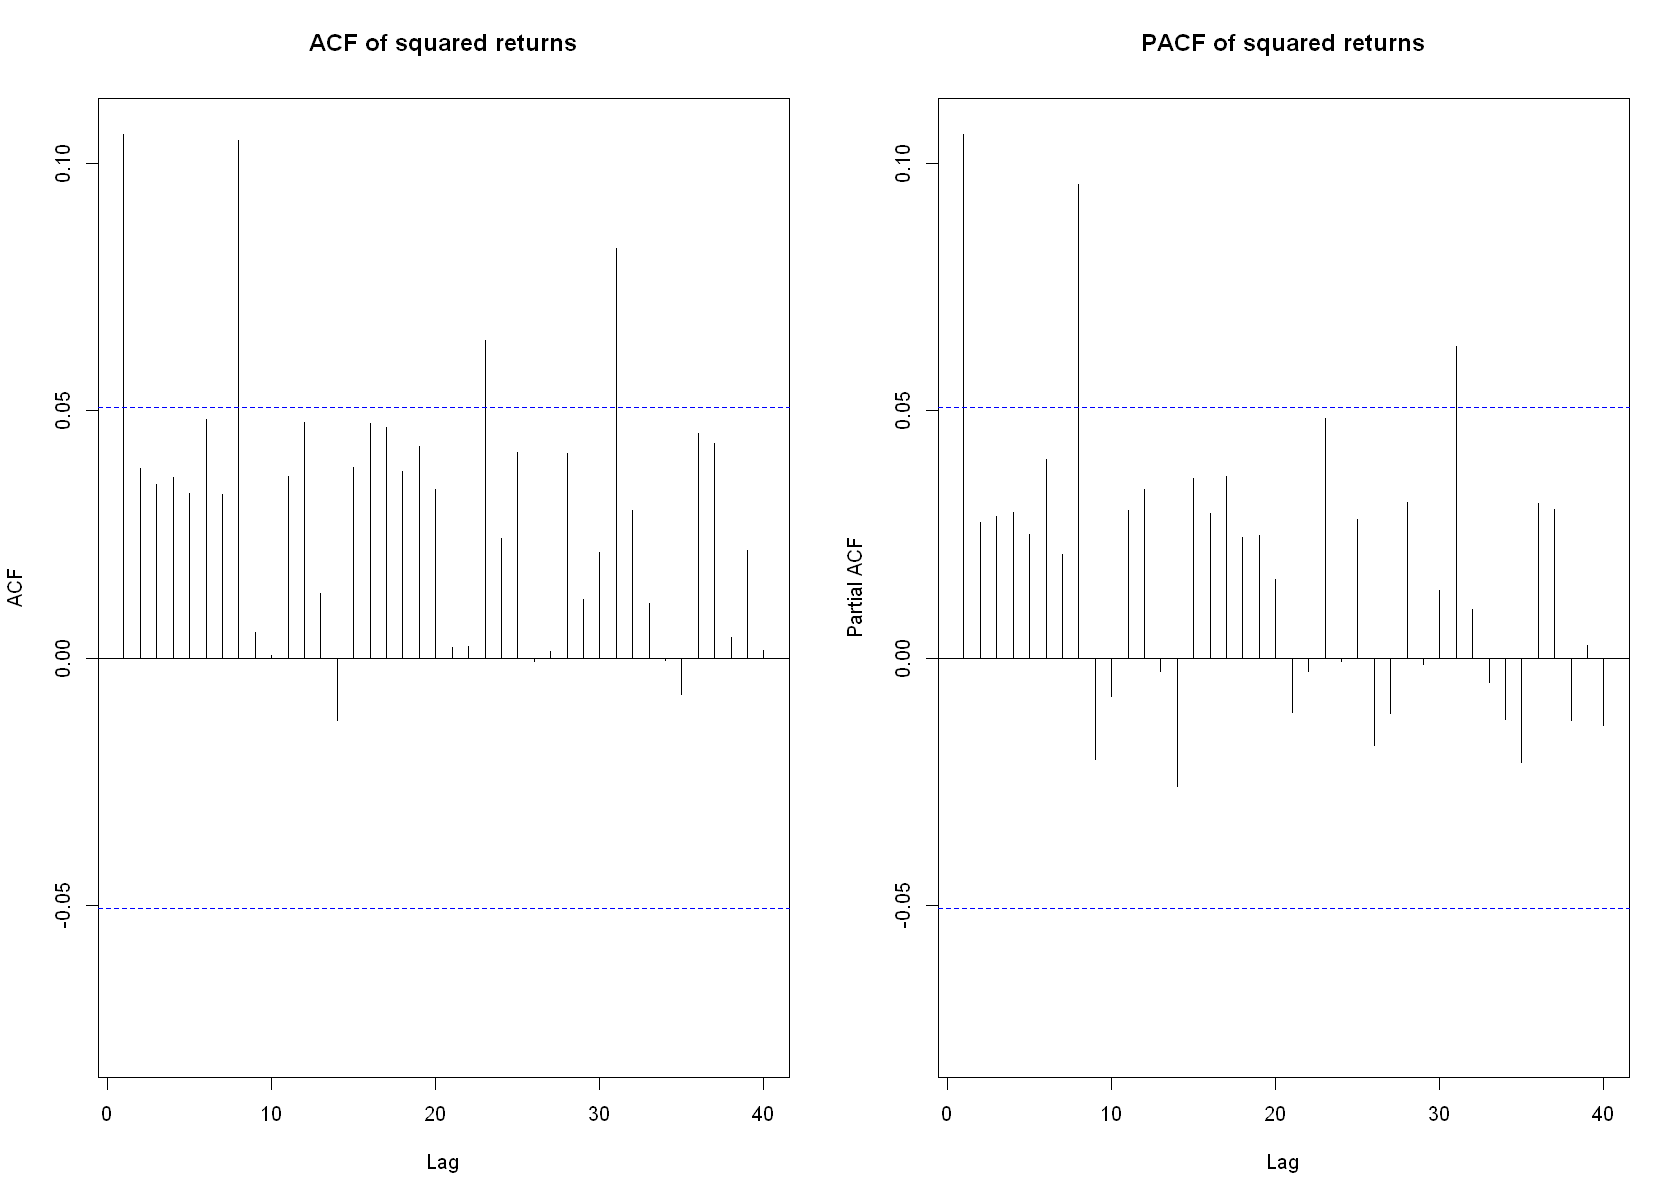

In [12]:
par(mfrow=c(1,2))
Acf(rets^2, main =  'ACF of squared returns', lag = 40)
Pacf(rets^2, main = 'PACF of squared returns', lag = 40)

Plotting of squared returns reveals that they are not completely independent.

### Phillips-Perron (PP) Test

**Purpose**
The PP test is similar to the ADF test but more robust to serial correlation and heteroskedasticity in the error term. It also tests for a unit root in the time series.

**Hypotheses**
- Null Hypothesis (H₀): The time series has a unit root (the series is non-stationary).
- Alternative Hypothesis (H₁): The time series does not have a unit root (the series is stationary).


In [13]:
pp.test01 <- ur.pp(rets, type="Z-tau", model="constant")
summary(pp.test01)


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.112141 -0.007069  0.000007  0.007346  0.110384 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.0006744  0.0003745   1.801   0.0719 .
y.l1        -0.0163199  0.0258378  -0.632   0.5277  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01448 on 1497 degrees of freedom
Multiple R-squared:  0.0002664,	Adjusted R-squared:  -0.0004014 
F-statistic: 0.399 on 1 and 1497 DF,  p-value: 0.5277


Value of test-statistic, type: Z-tau  is: -39.4896 

         aux. Z statistics
Z-tau-mu            1.8079

Critical values for Z statistics: 
                     1pct     5pct     10pct
critical values -3.437515 -2.86393 -2.568061


The p-value is 0.5277 meaning that returns are not stationary and thus let’s transform them to be stationary using the first order differencing

In [14]:
rets_diff <- diff(rets)
pp.test02 <- ur.pp(rets_diff, type="Z-tau", model="constant")
summary(pp.test02)


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.112504 -0.009535 -0.000819  0.008842  0.108725 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.504e-07  4.624e-04  -0.001        1    
y.l1        -4.994e-01  2.240e-02 -22.298   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0179 on 1496 degrees of freedom
Multiple R-squared:  0.2495,	Adjusted R-squared:  0.249 
F-statistic: 497.2 on 1 and 1496 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: -118.8062 

         aux. Z statistics
Z-tau-mu             -0.01

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -3.437518 -2.863931 -2.568062


As a result, the returns are stationary.

### ADF test

In [15]:
tseries::adf.test(rets)

Warning message in tseries::adf.test(rets):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  rets
Dickey-Fuller = -11.286, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary


According to ADF test, returns are stationary.

### The following step is to check for autocorrelation using the Box-Ljung test.

In [16]:
Box.test(rets, type = 'Ljung-Box')
Box.test(rets, lag = 3, type = 'Ljung-Box')
Box.test(rets, lag = 11, type = 'Ljung-Box')


	Box-Ljung test

data:  rets
X-squared = 0.40018, df = 1, p-value = 0.527



	Box-Ljung test

data:  rets
X-squared = 6.9932, df = 3, p-value = 0.07212



	Box-Ljung test

data:  rets
X-squared = 9.6346, df = 11, p-value = 0.5635


All Box-Ljung tests indicate that the autocorrelations in the returns time series are not statistically significant (p-value > 0.05) at various lags. Therefore, we fail to reject that lags are jointly equal to zero.

### Data description - Realized Volatility

In [17]:
# Calculate descriptive statistics for realized volatility
mean_RV <- mean(RV_day)
std_dev_RV <- sd(RV_day)
min_RV <- min(RV_day)
max_RV <- max(RV_day)
quantiles_RV <- quantile(RV_day)

# Print descriptive statistics for realized volatility
cat("Mean Realized Volatility:", mean_RV, "\n")
cat("Standard Deviation of Realized Volatility:", std_dev_RV, "\n")
cat("Minimum Realized Volatility:", min_RV, "\n")
cat("Maximum Realized Volatility:", max_RV, "\n")
cat("Quantiles of Realized Volatility:", quantiles_RV, "\n")

Mean Realized Volatility: 0.01024091 


Standard Deviation of Realized Volatility: 0.004125582 
Minimum Realized Volatility: 0.003709127 
Maximum Realized Volatility: 0.03881703 
Quantiles of Realized Volatility: 0.003709127 0.007765524 0.009290015 0.0116362 0.03881703 


Our realized volatility (RV) data provides insight into the variability of daily returns over the observed period. The mean realized volatility is approximately 0.0102, indicating the average daily variability in returns is around 1.02%. The standard deviation of 0.0041 reflects moderate fluctuations around this average. The minimum realized volatility observed is 0.0037, while the maximum is significantly higher at 0.0388, suggesting occasional periods of high market turbulence.

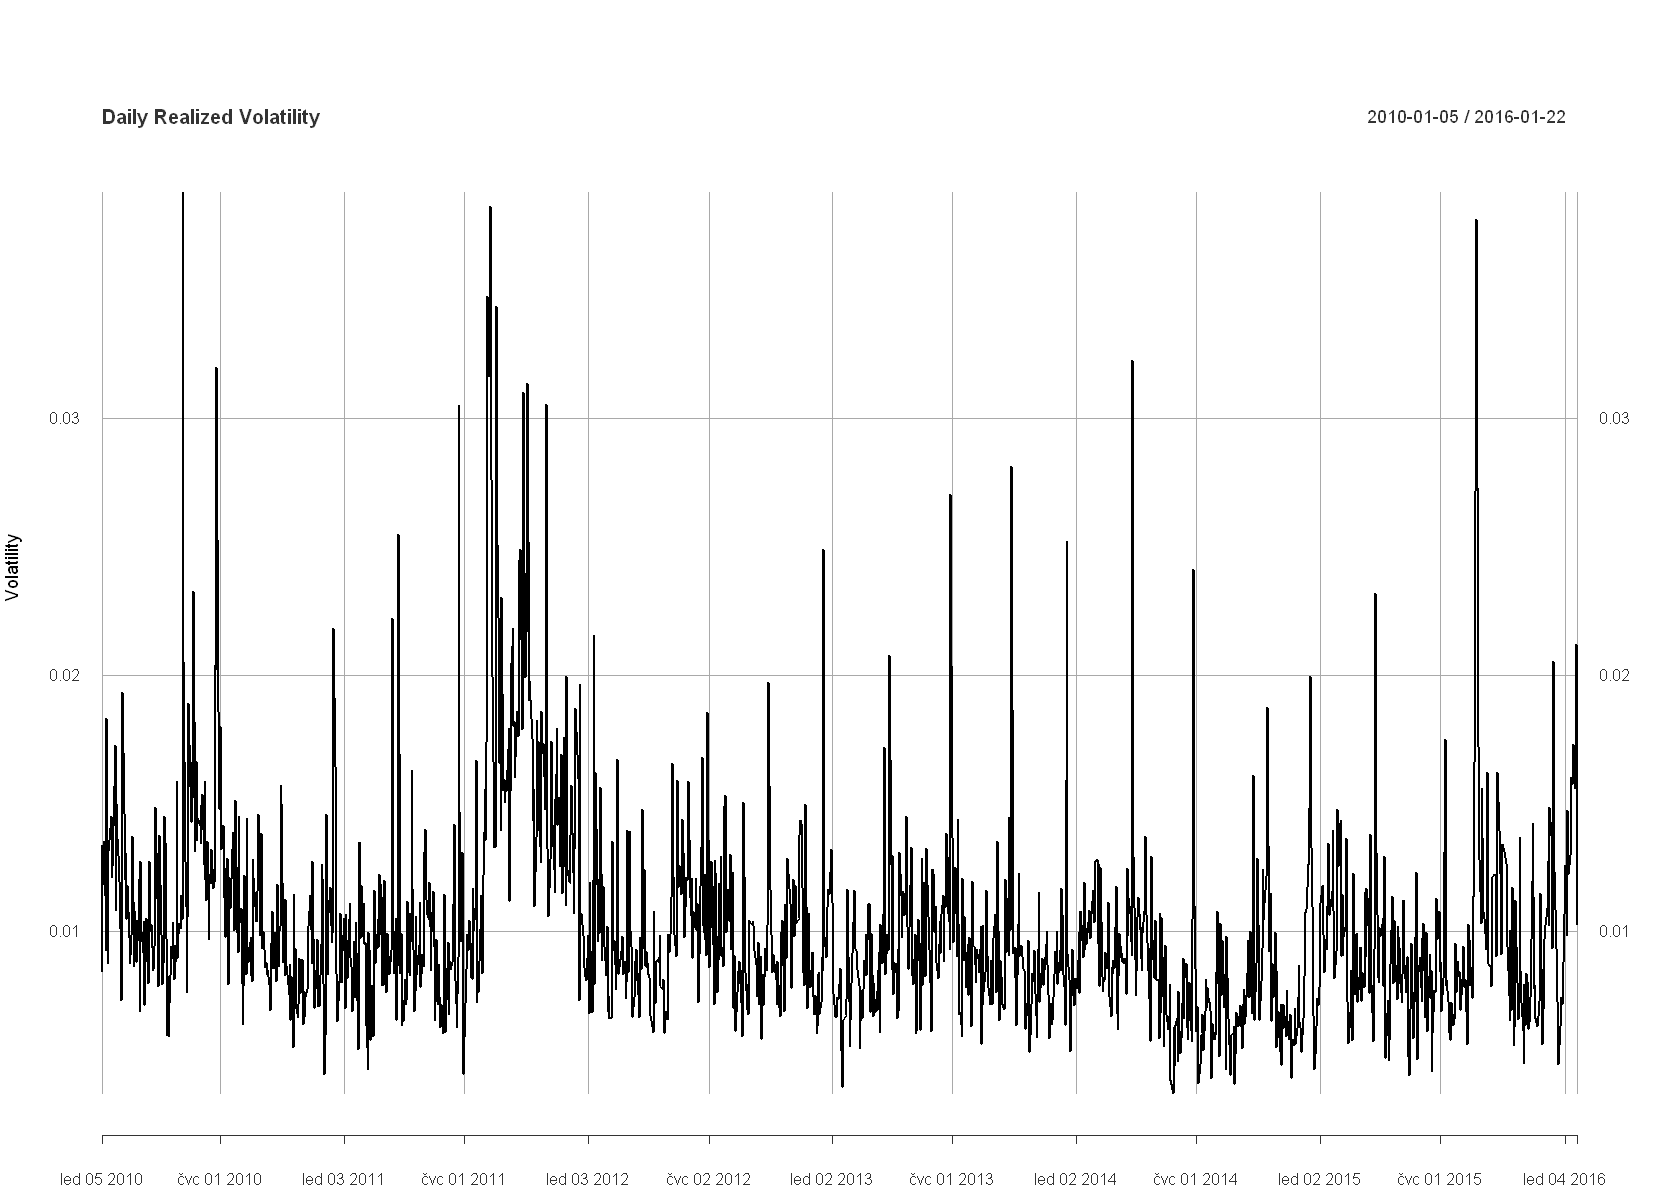

In [18]:
plot(RV_day, main = "Daily Realized Volatility", xlab = "Date", ylab = "Volatility")

### Histogram

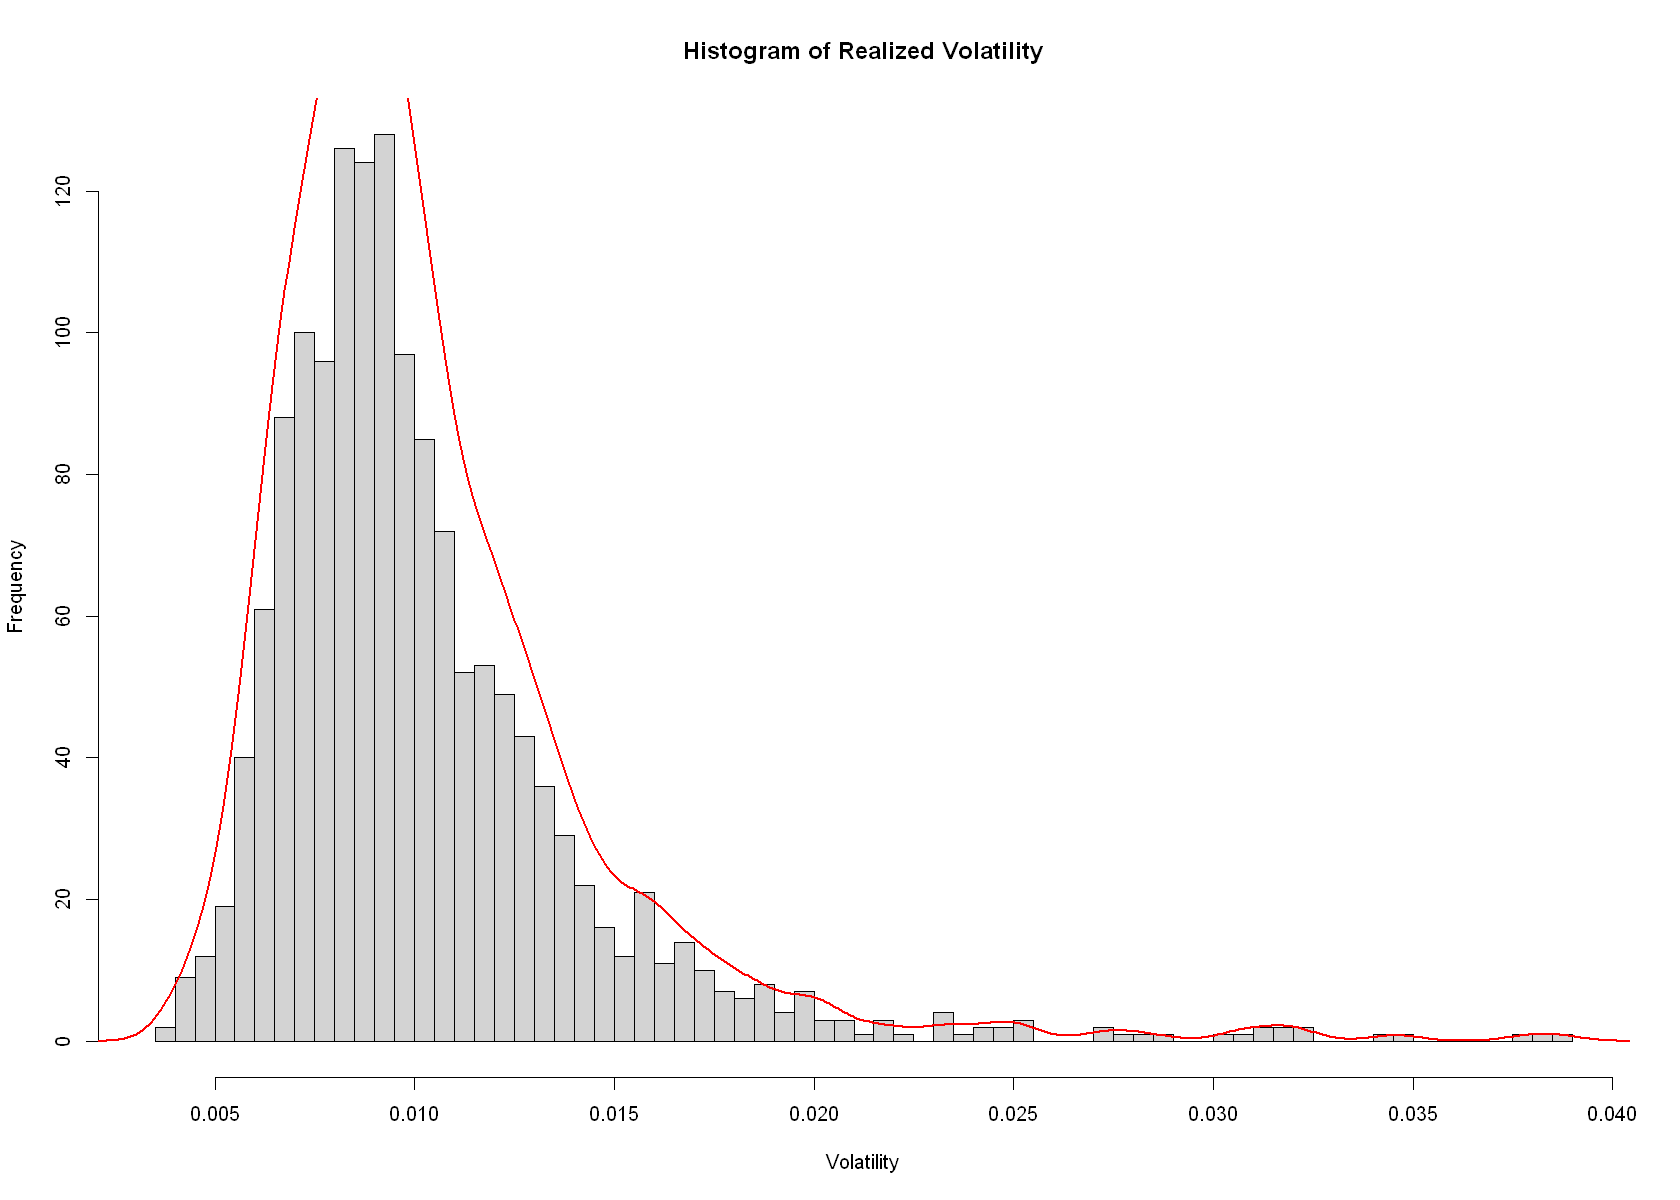

In [19]:
# Histogram
hist(RV_day, breaks = "FD", main = "Histogram of Realized Volatility", xlab = "Volatility", ylab = "Frequency")
# Add empirical distribution
lines(density(RV_day), col = "red", lwd = 2)

The volatility appears to be range bound between 0.01 and 0.035 throughout the period. There is no clear upward or downward trend in the volatility over the six years.

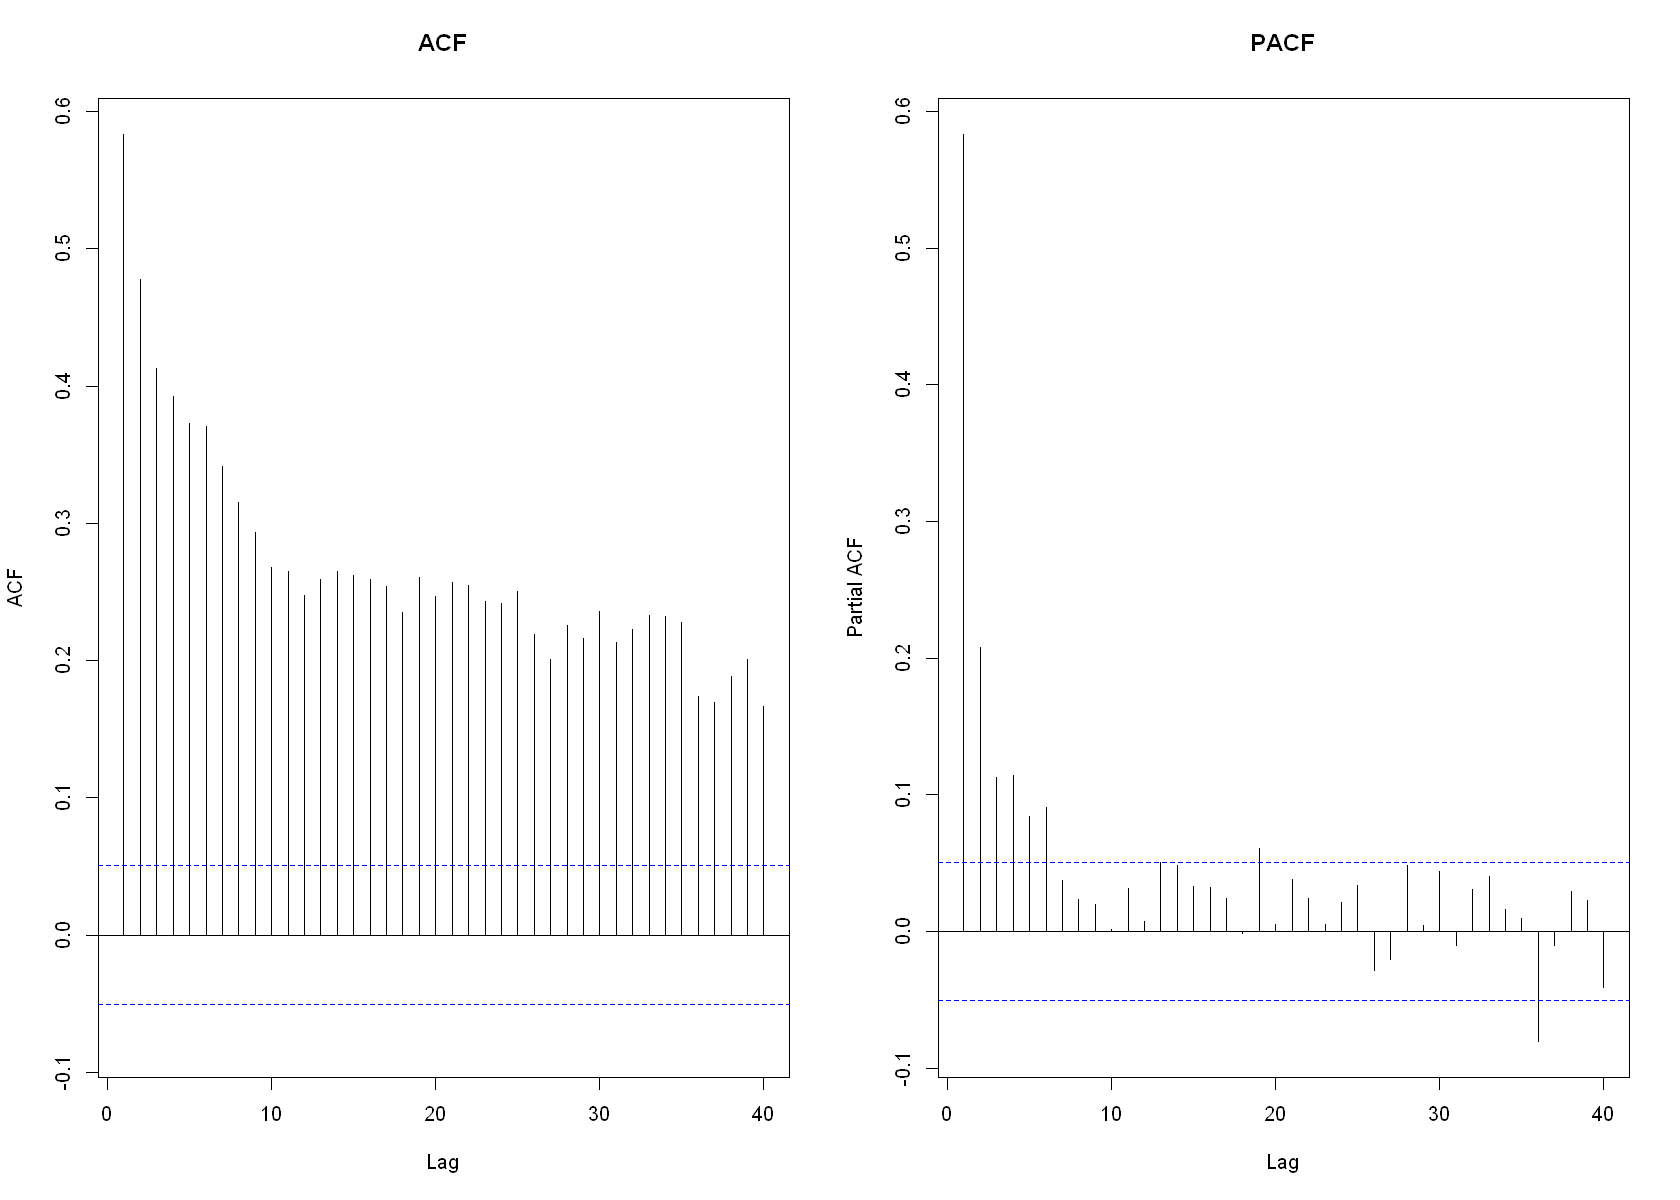

In [20]:
par(mfrow=c(1,2))
Acf(RV_day, main =  'ACF', lag = 40)
Pacf(RV_day, main = 'PACF', lag = 40)

From the ACF and PACF tests, it is evident that there are numerous dependencies in the RV samples. Many lags are significant, confirming our expectation that volatility exhibits long memory.

### Phillips-Perron (PP) Test

In [21]:
pp.test03 <- ur.pp(RV_day, type="Z-tau", model="constant")
summary(pp.test03)


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0115082 -0.0018697 -0.0004738  0.0011524  0.0284386 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0042702  0.0002318   18.42   <2e-16 ***
y.l1        0.5831488  0.0209941   27.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003353 on 1497 degrees of freedom
Multiple R-squared:  0.3401,	Adjusted R-squared:  0.3397 
F-statistic: 771.5 on 1 and 1497 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: -21.3159 

         aux. Z statistics
Z-tau-mu           19.7766

Critical values for Z statistics: 
                     1pct     5pct     10pct
critical values -3.437515 -2.86393 -2.568061


From the test, we can conclude that the time series is stationary.

### ADF test

In [22]:
tseries::adf.test(RV_day)

Warning message in tseries::adf.test(RV_day):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  RV_day
Dickey-Fuller = -6.5458, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary


From the Augmented Dickey-Fuller test, we also conclude that realized variance is staionary.

### Box-Ljung test

In [23]:
Box.test(RV_day, type = 'Ljung-Box')
Box.test(RV_day, lag = 2, type = 'Ljung-Box')
Box.test(RV_day, lag = 19, type = 'Ljung-Box')


	Box-Ljung test

data:  RV_day
X-squared = 511.11, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  RV_day
X-squared = 853.98, df = 2, p-value < 2.2e-16



	Box-Ljung test

data:  RV_day
X-squared = 3221.7, df = 19, p-value < 2.2e-16


All Box-Ljung tests indicate that the autocorrelations in the returns time series are statistically significant (p-value <= 0.05) at various lags. Therefore, there is strong evidence suggesting the presence of autocorrelation.

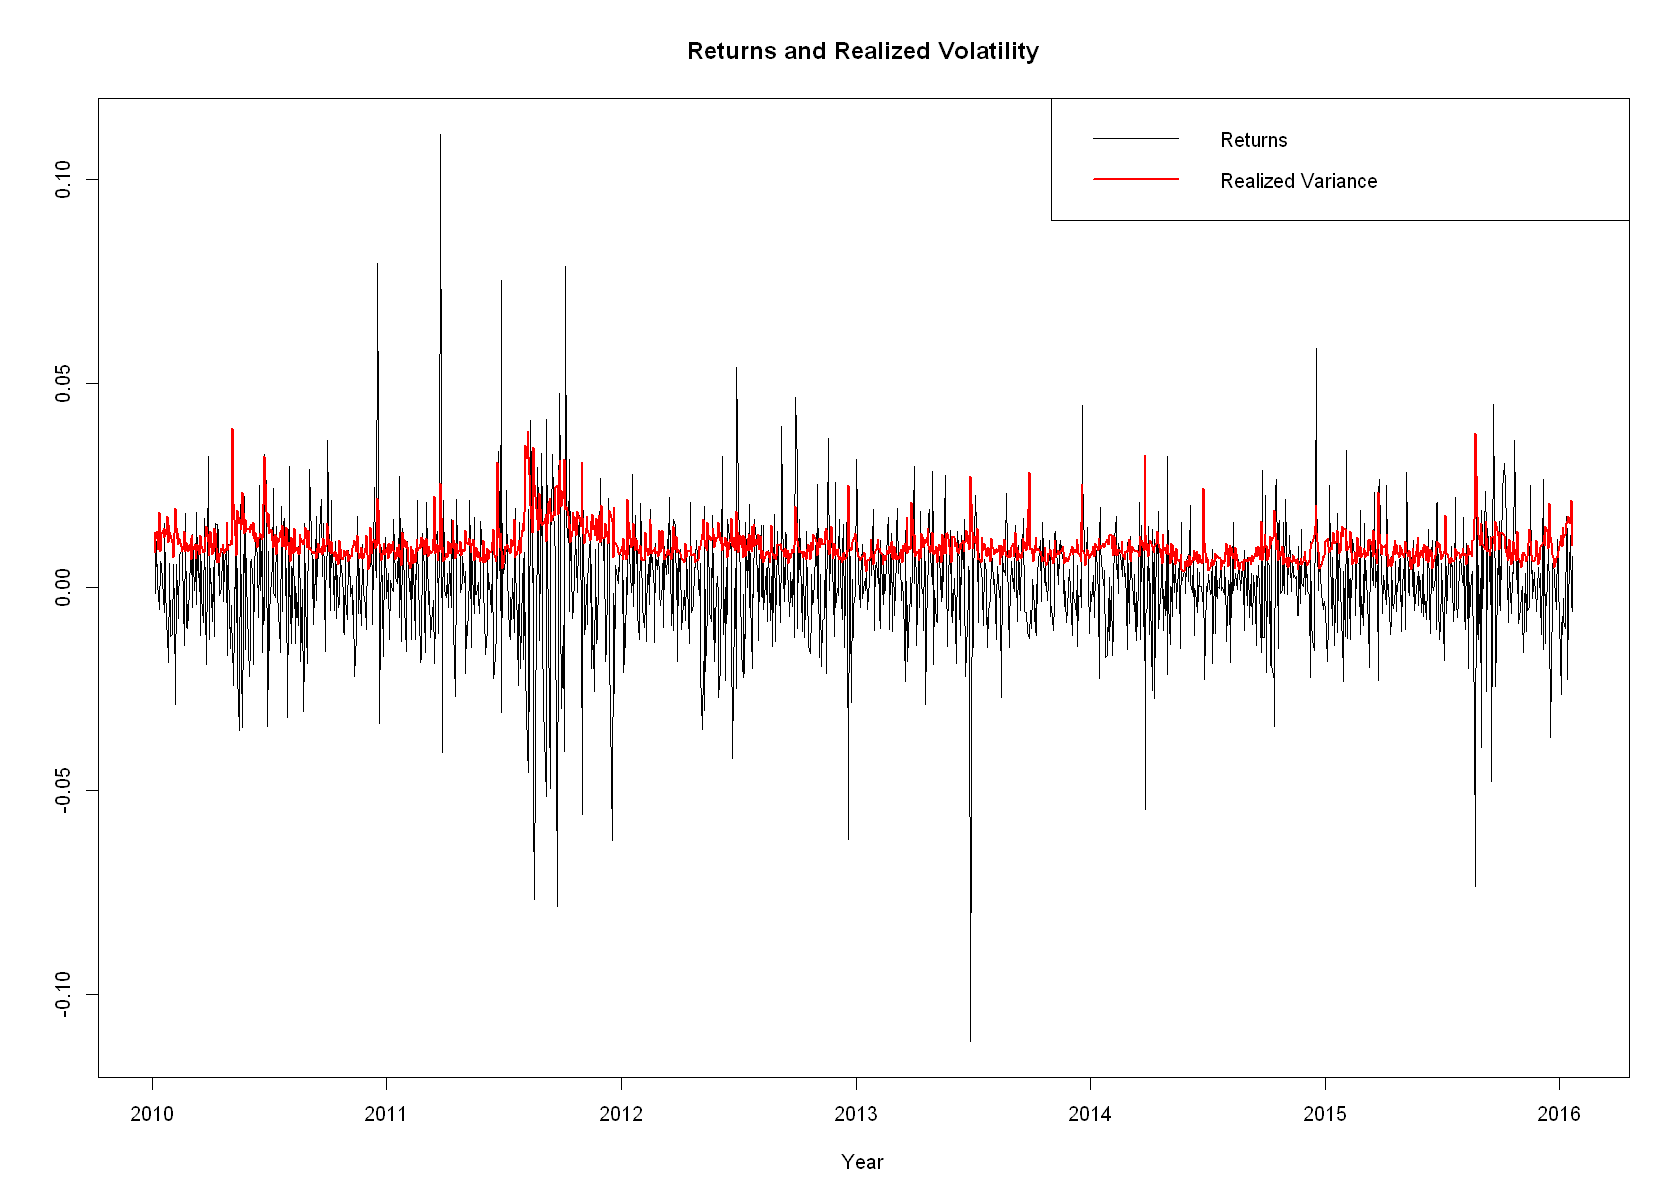

In [24]:
# Custom function for plotting time series data
custom_plot <- function(data, xlab, ylab, ylim, main) {
  plot.zoo(data, xlab = xlab, ylab = ylab, ylim = ylim, main = main)
}

# Custom function for overlaying lines on a plot
overlay_lines <- function(data, col, lwd) {
  lines(data, col = col, lwd = lwd)
}

# Determine the range for y-axis scaling
value_range <- range(c(rets, RV_day))

# Plotting the time series data with custom settings
custom_plot(rets, xlab = 'Year', ylab = NA, ylim = value_range, main = "Returns and Realized Volatility")
overlay_lines(zoo(RV_day), col = "red", lwd = 2)

# Add legend
legend("topright", legend = c("Returns", "Realized Variance"), col = c("black", "red"), lwd = c(1, 2))


Realized variance matches the returns except for several exceptions. For example, we have extreme spikes in the second half of 2011 and simultaneously volatility didn't increase much.

### Checking volatility spikes for maximum and minimum values.

In [25]:
# Calculate the maximum value in the returns
extreme_value <- max(rets)

# Output the index of the maximum return
cat("Return of Extreme Value:\n")
peak_idx <- which.max(rets)
cat(peak_idx, "\n")

# Output the date of the maximum return
cat("Date of Extreme Value:\n")
extreme_date <- index(rets)[peak_idx]
extreme_date

# Output the highest value in the returns
cat("Extreme Positive Return Value:\n")
extreme_return <- rets[peak_idx]
cat(extreme_return, "\n")

Return of Extreme Value:
307 
Date of Extreme Value:


[1] "2011-03-25"

Extreme Positive Return Value:
0.1110067 


In [26]:
rets['2011-03-24/2011-03-27']
RV_day['2011-03-24/2011-03-27']

                   ret
2011-03-24 0.003172404
2011-03-25 0.111006728

                    RV
2011-03-24 0.009087275
2011-03-25 0.025491767

The positive maximum return is 11 % with a positive value of realized volatility of 2 %, which means that volatility doesn’t reflect completely returns.

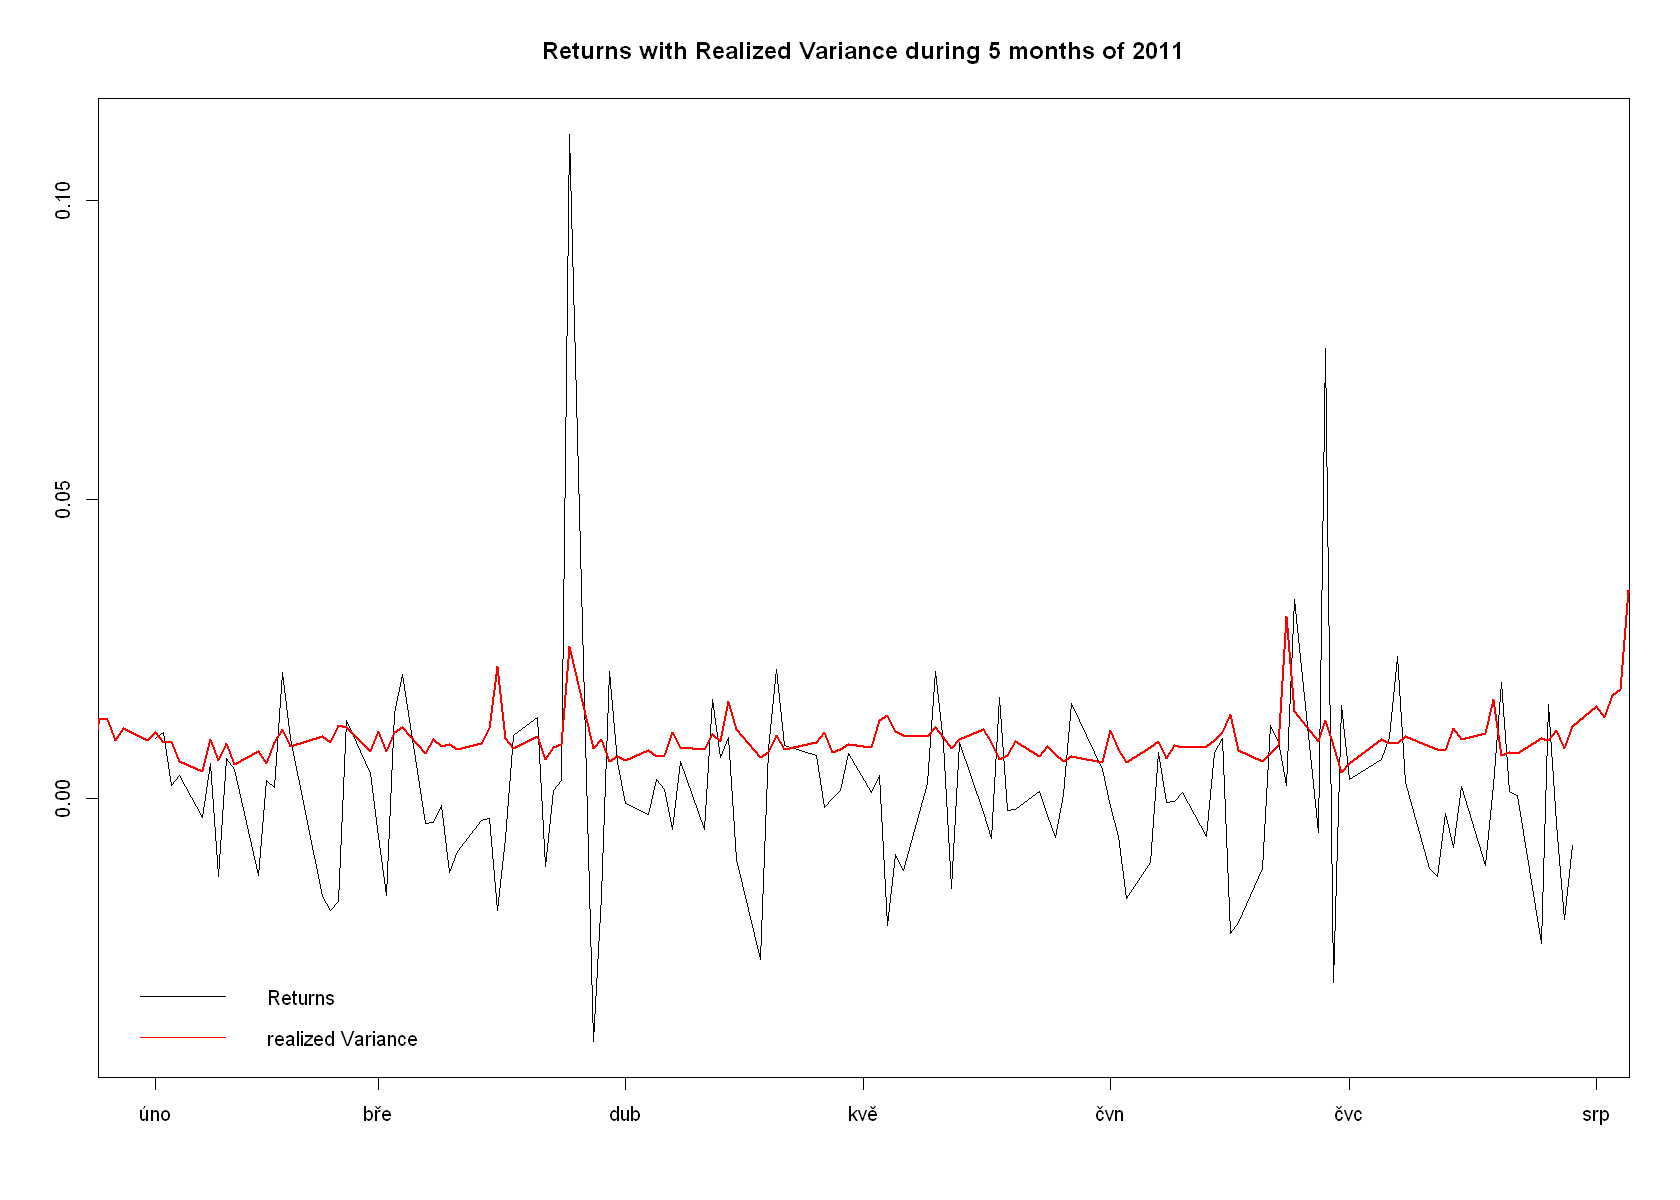

In [27]:
# Define date range for plotting
time_frame <- '2011-02/2011-07'

# Custom function to create a time series plot
custom_time_series_plot <- function(data, x_label, y_label, title) {
  plot.zoo(data, xlab = x_label, ylab = y_label, main = title)
}

# Custom function to overlay additional time series data
add_time_series <- function(data, color, line_width) {
  lines(data, col = color, lwd = line_width)
}

# Custom function to add a legend to the plot
add_legend <- function(position, labels, colors, line_width, box_type) {
  legend(position, legend = labels, col = colors, lwd = line_width, bty = box_type)
}

# Generate the plot
custom_time_series_plot(rets[time_frame], x_label = NA, y_label = NA, title = "Returns with Realized Variance during 5 months of 2011")
add_time_series(zoo(RV_day), color = "red", line_width = 2)
add_legend("bottomleft", labels = c("Returns", "realized Variance"), colors = c("black", "red"), line_width = 1, box_type = "n")

In [28]:
# Calculate the maximum absolute value in the returns
extreme_value <- max(abs(rets))

# Output the index of the maximum return
cat("Return of Extreme Value:\n")
peak_idx <- which.max(abs(rets))
cat(peak_idx, "\n")

# Output the date of the maximum return
cat("Date of Extreme Value:\n")
extreme_date <- index(rets)[peak_idx]
extreme_date

# Output the highest value in the returns
cat("Extreme Negative Return Value:\n")
extreme_return <- rets[peak_idx]
cat(extreme_return, "\n")


Return of Extreme Value:
867 
Date of Extreme Value:


[1] "2013-06-28"

Extreme Negative Return Value:
-0.111446 


In [29]:
rets['2013-06-28/2013-06-30']
RV_day['2013-06-28/2013-06-30']

                 ret
2013-06-28 -0.111446

                   RV
2013-06-28 0.02702821

It proves what we saw from the plot from previous sub-section, the returns have during the day 28.06.2013 value of – 11 % while volatility has a positive value of 2 %.

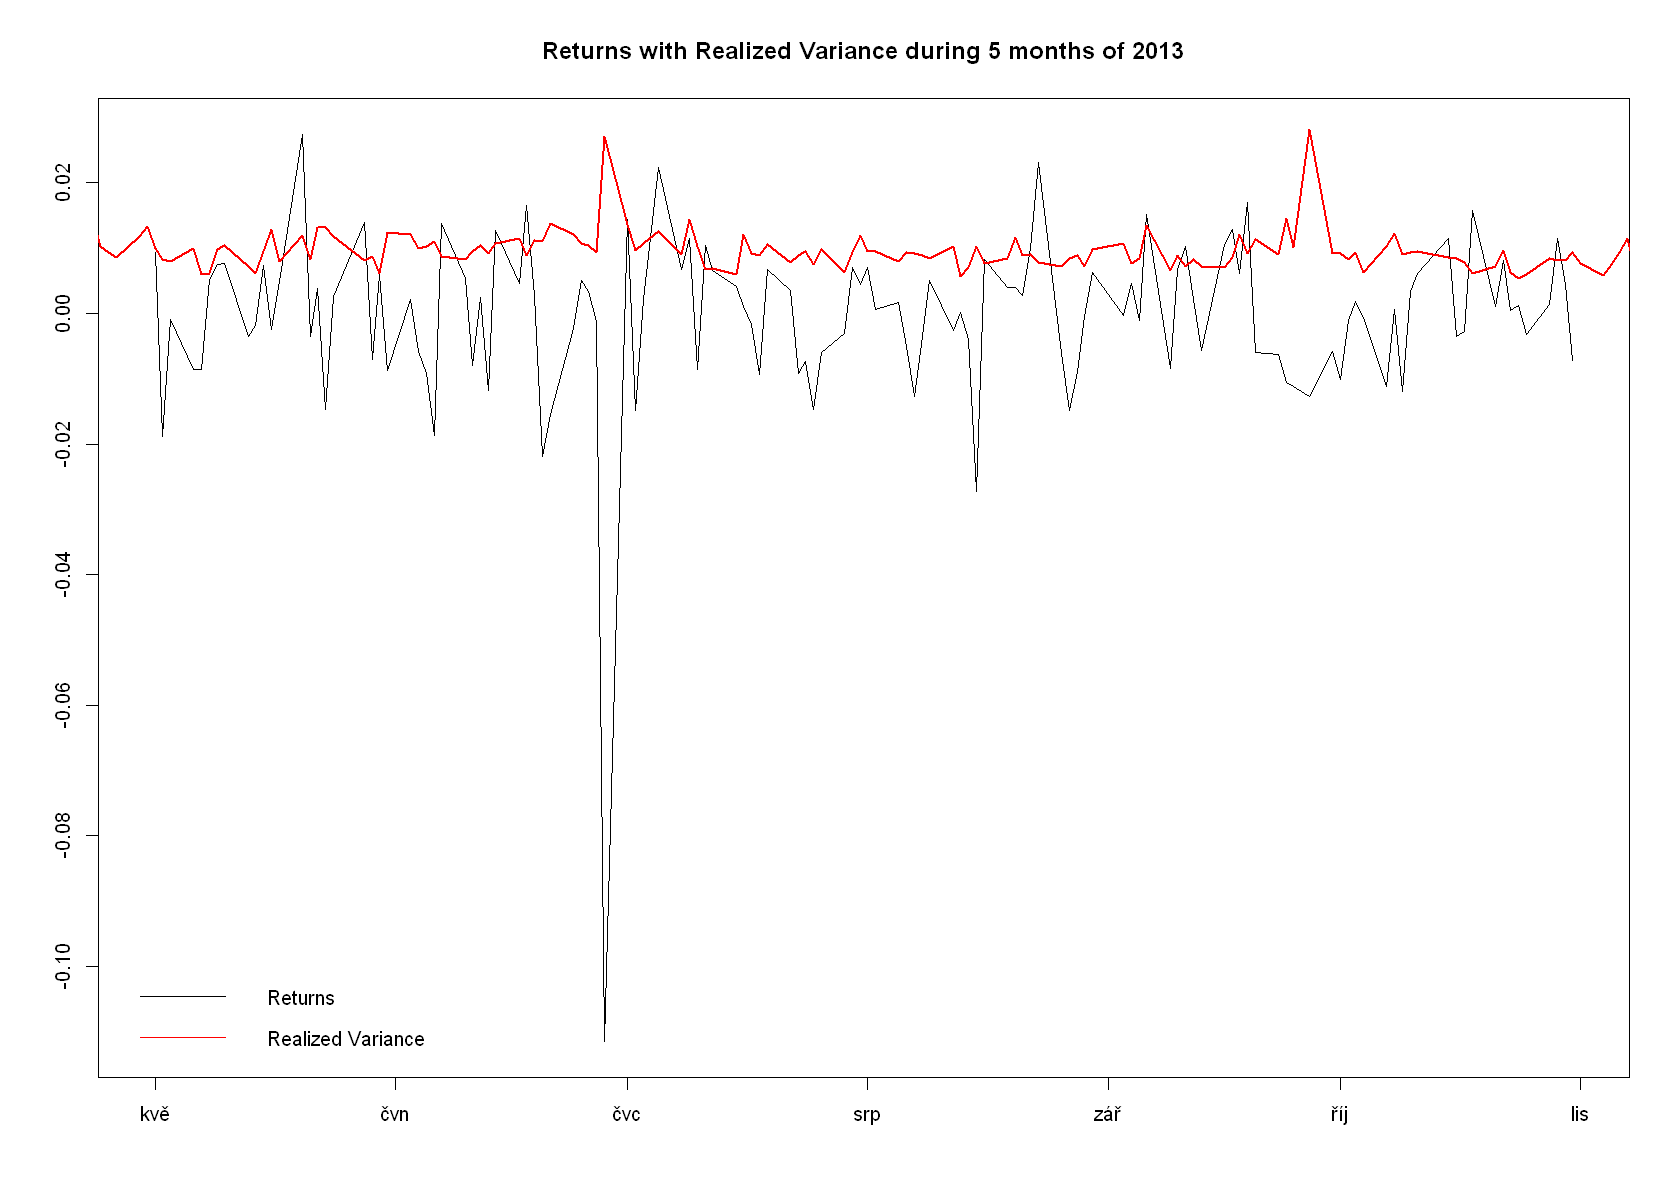

In [30]:
# Define date range for plotting
time_frame <- '2013-05/2013-10'

# Custom function to create a time series plot
custom_time_series_plot <- function(data, x_label, y_label, title) {
  plot.zoo(data, xlab = x_label, ylab = y_label, main = title)
}

# Custom function to overlay additional time series data
add_time_series <- function(data, color, line_width) {
  lines(data, col = color, lwd = line_width)
}

# Custom function to add a legend to the plot
add_legend <- function(position, labels, colors, line_width, box_type) {
  legend(position, legend = labels, col = colors, lwd = line_width, bty = box_type)
}

# Generate the plot
custom_time_series_plot(rets[time_frame], x_label = NA, y_label = NA, title = "Returns with Realized Variance during 5 months of 2013")
add_time_series(zoo(RV_day), color = "red", line_width = 2)
add_legend("bottomleft", labels = c("Returns", "Realized Variance"), colors = c("black", "red"), line_width = 1, box_type = "n")


### Asymmetry Analysis of Realized Volatility

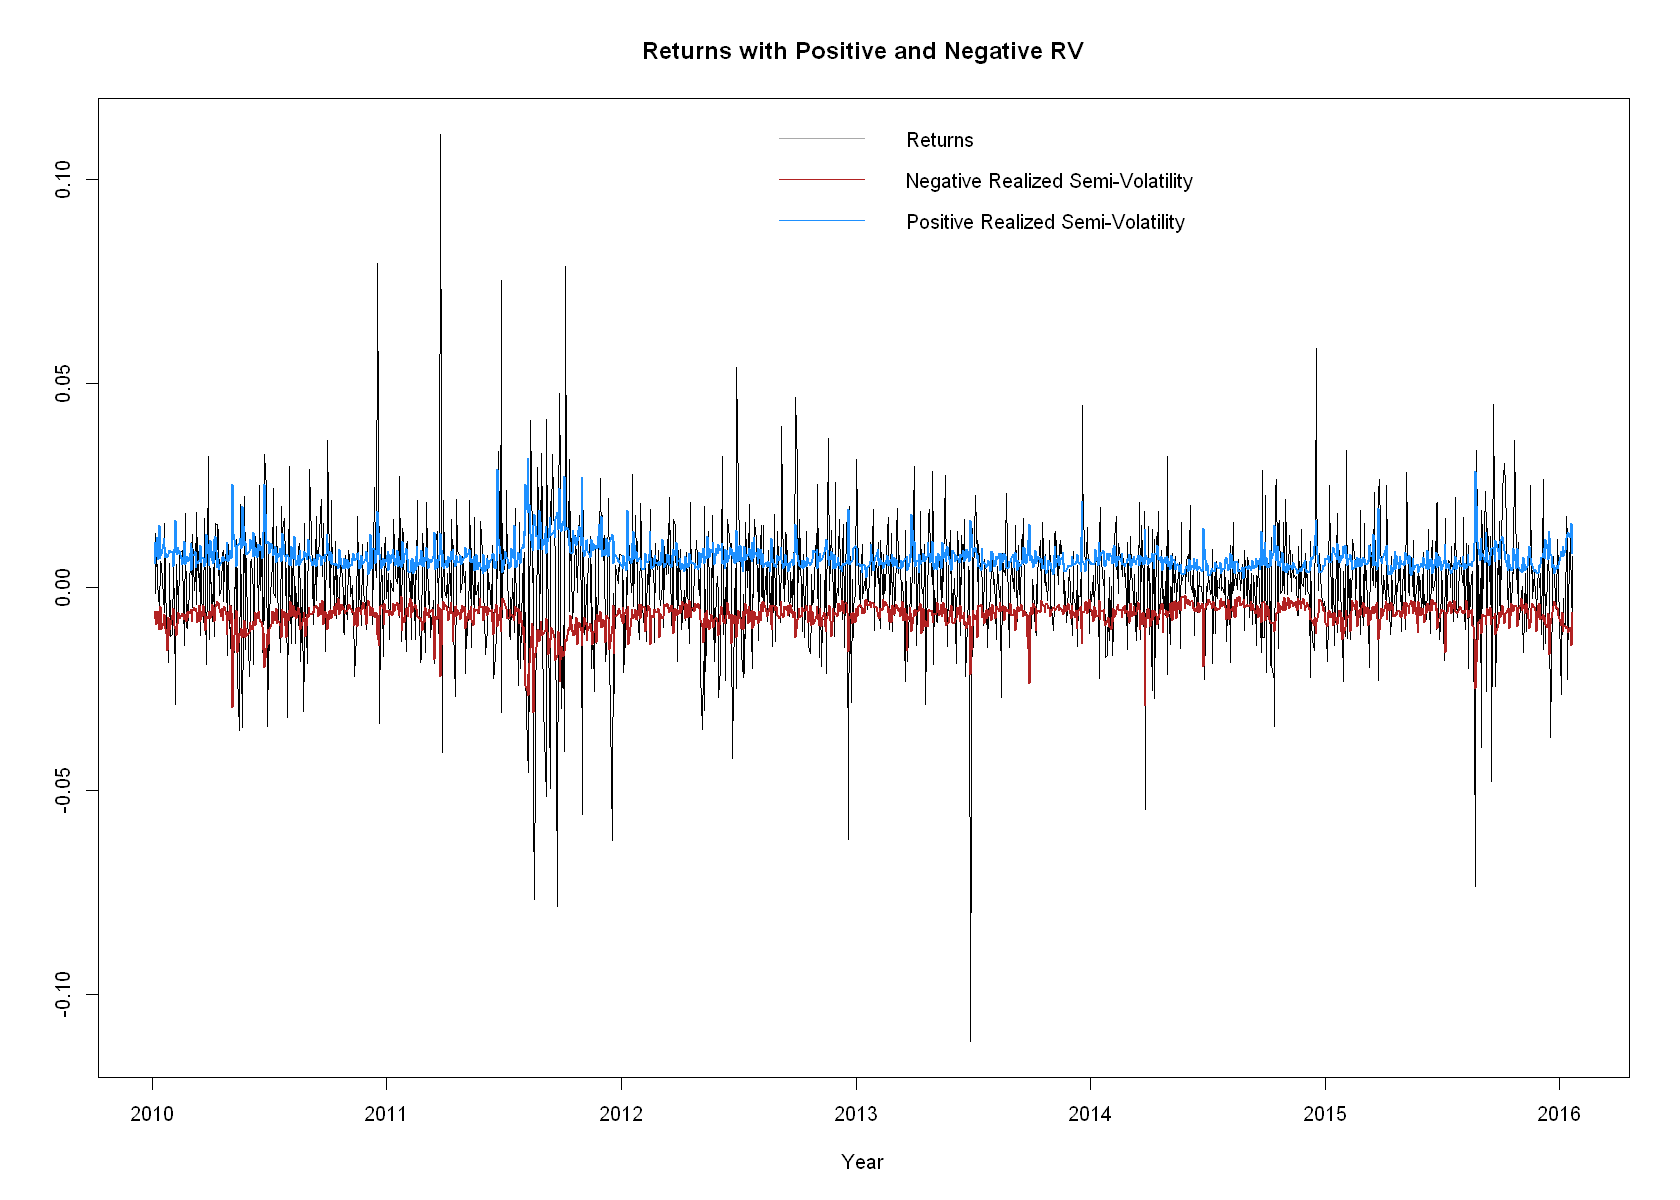

In [31]:
# Setting color schemes for various plots
palette_two <- c("darkgrey", "firebrick")
palette_three <- c("darkgrey", "firebrick", "dodgerblue")
palette_four <- c("darkgrey", "firebrick", "dodgerblue", "forestgreen")
vibrant_colors <- rainbow(6) # Generate a rainbow color scheme

# Define custom range function
compute_range <- function(values) {
  range(values)
}

# Define custom plot function
generate_plot <- function(data, x_label, y_label, y_limits, title) {
  plot.zoo(data, xlab = x_label, ylab = y_label, ylim = y_limits, main = title)
}

# Define custom line function
add_custom_lines <- function(data, color, line_width) {
  lines(data, col = color, lwd = line_width)
}

# Define custom legend function
insert_legend <- function(position, colors, line_width, box_type, labels) {
  legend(position, col = colors, lwd = line_width, bty = box_type, legend = labels)
}

# Determine the range for y-axis scaling
y_limits <- compute_range(c(rets, RV_p, -RV_n))

# Generate the plot with the rets data
generate_plot(rets, x_label = 'Year', y_label = NA, y_limits = y_limits, title = "Returns with Positive and Negative RV")

# Add lines for negative and positive realized volatility
add_custom_lines(-zoo(RV_n), color = palette_three[2], line_width = 2)
add_custom_lines(zoo(RV_p), color = palette_three[3], line_width = 2)

# Insert legend into the plot
insert_legend("topright", colors = palette_three, line_width = 1, box_type = "n", labels = c("Returns", "Negative Realized Semi-Volatility", "Positive Realized Semi-Volatility"))


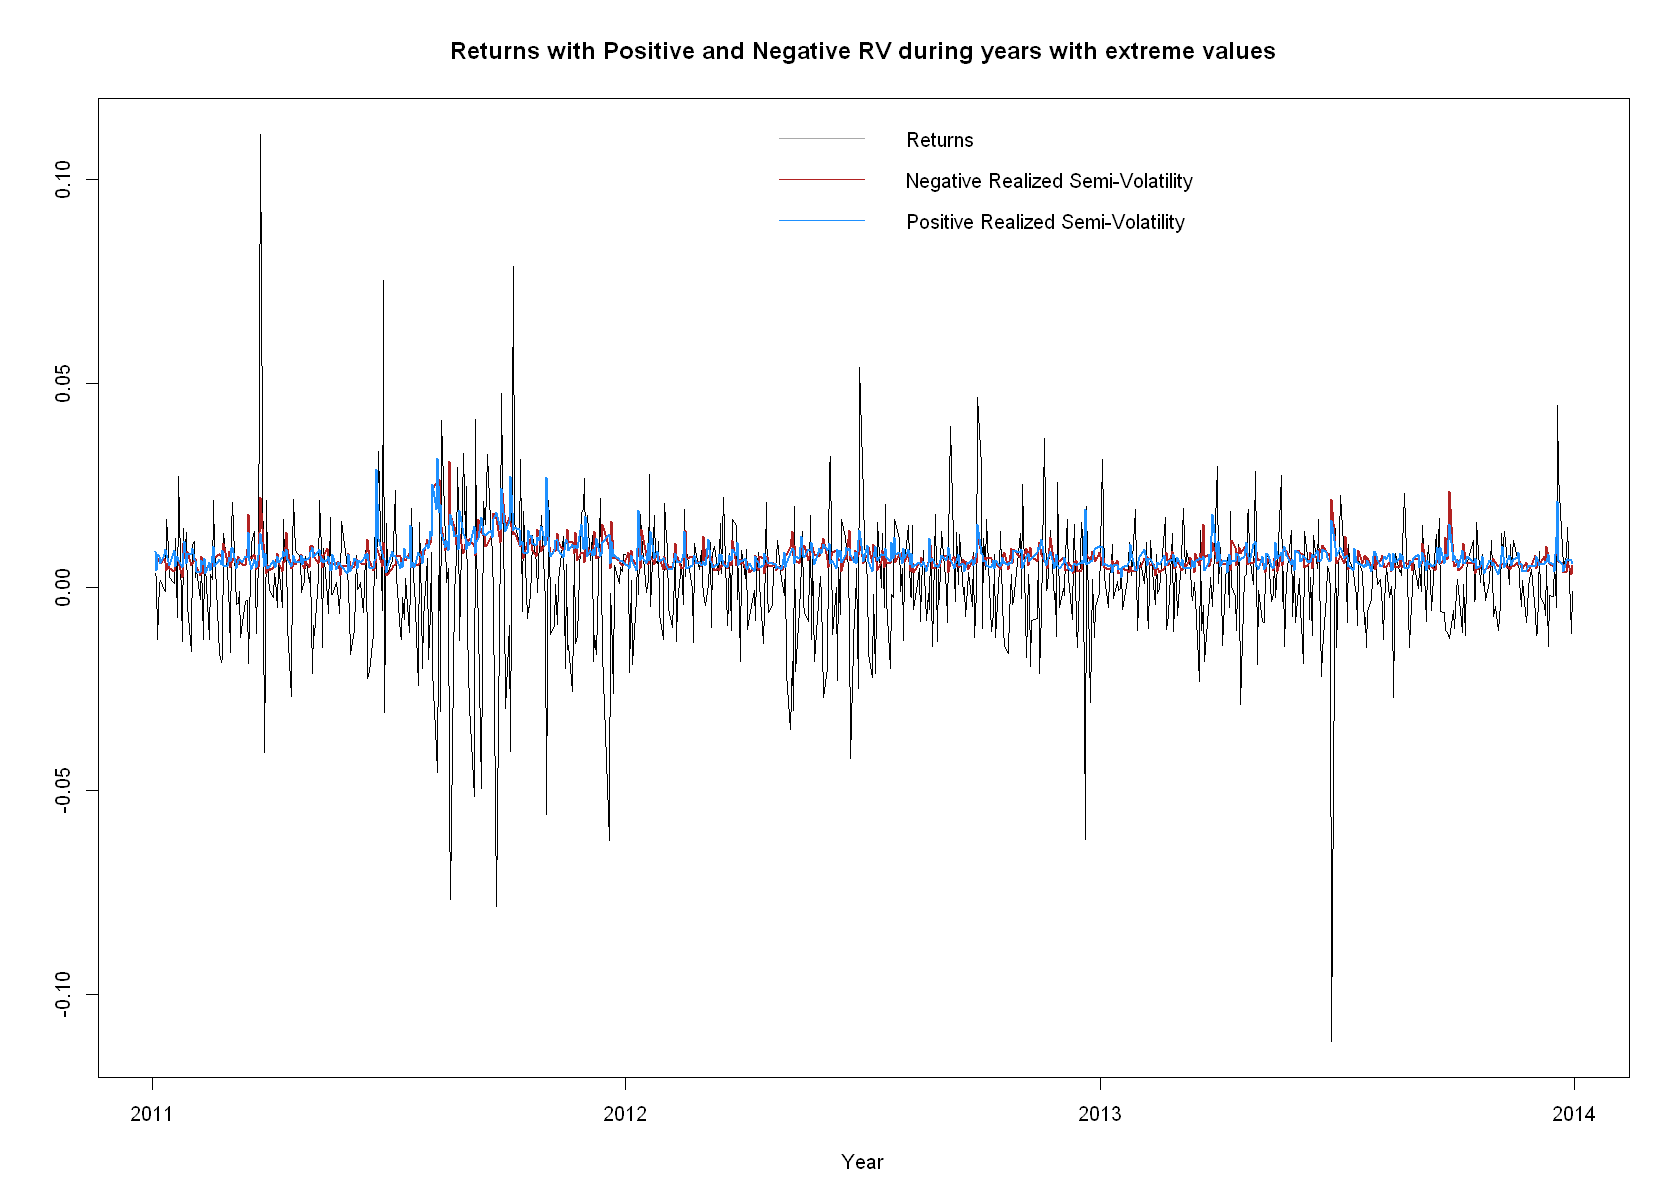

In [32]:
# Define custom range calculation function
calculate_range <- function(data) {
  range(data)
}

# Define custom plotting function
generate_plot <- function(data, x_label, y_label, y_limits, title) {
  plot.zoo(data, xlab = x_label, ylab = y_label, ylim = y_limits, main = title)
}

# Define custom line adding function
add_lines <- function(data, color, line_width) {
  lines(data, col = color, lwd = line_width)
}

# Define custom legend adding function
add_legend <- function(position, colors, line_width, box_type, labels) {
  legend(position, col = colors, lwd = line_width, bty = box_type, legend = labels)
}

# Define the date range
date_range <- '2011/2013'

# Determine the y-axis scale
y_scale <- calculate_range(c(rets[date_range], RV_n[date_range]))

# Generate the plot
generate_plot(rets[date_range], x_label = 'Year', y_label = NA, y_limits = y_scale, title = "Returns with Positive and Negative RV during years with extreme values")

# Add lines for negative and positive realized volatility
add_lines(zoo(RV_n[date_range]), color = palette_three[2], line_width = 2)
add_lines(zoo(RV_p[date_range]), color = palette_three[3], line_width = 2)

# Add legend to the plot
add_legend("topright", colors = palette_three, line_width = 1, box_type = "n", labels = c("Returns", "Negative Realized Semi-Volatility", "Positive Realized Semi-Volatility"))

From the plots, it is noticeable that negative RV is a bit larger than positive RV, thus there is an asymmetry.

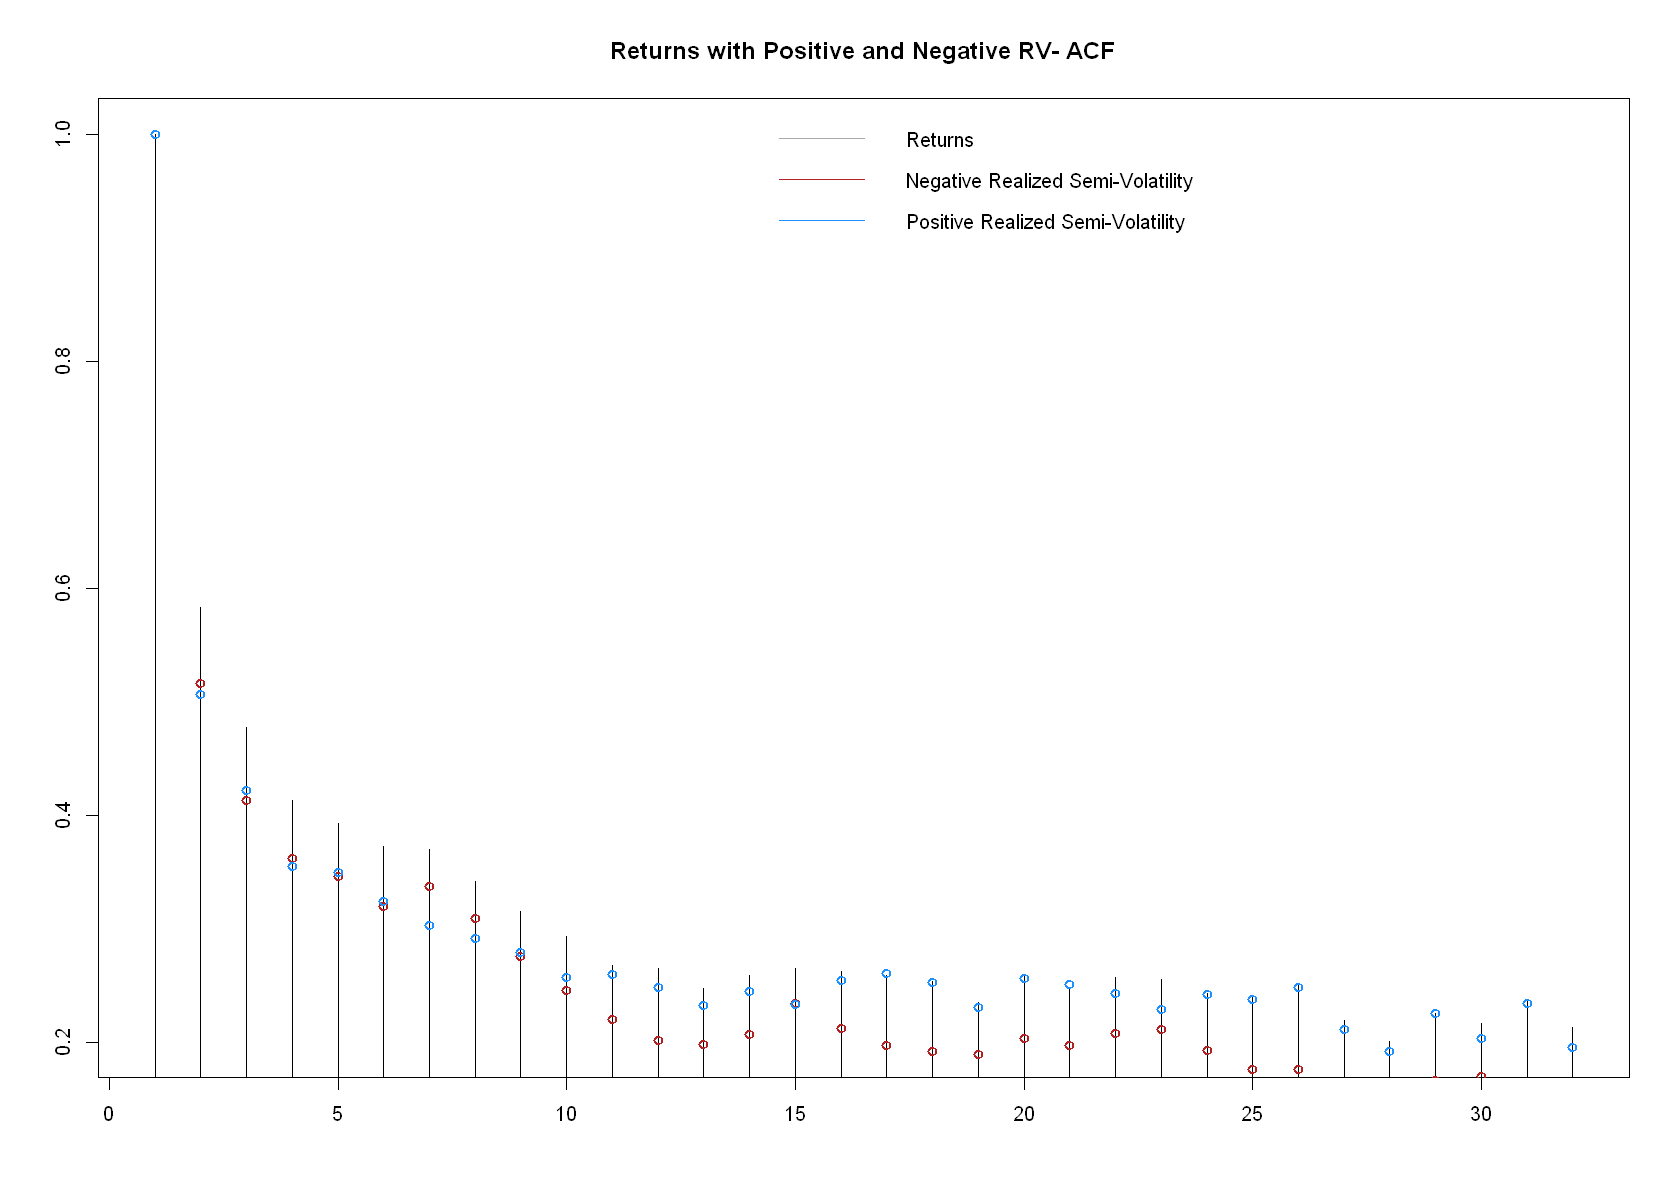

In [33]:
# Calculate autocorrelations
calculate_acf <- function(data) {
  acf(data, plot = FALSE)$acf[,1,1]
}

# Custom function for plotting ACF
plot_acf <- function(data, line_type, y_label, x_label, title) {
  plot(data, type = line_type, ylab = y_label, xlab = x_label, main = title)
}

# Custom function to add points to the plot
add_points <- function(data, color, line_width) {
  points(data, col = color, lwd = line_width)
}

# Custom function to add a legend
add_legend <- function(position, colors, line_width, box_type, labels) {
  legend(position, col = colors, lwd = line_width, bty = box_type, legend = labels)
}

# Calculate ACFs
acf_metric_a <- calculate_acf(RV_day)
acf_metric_b <- calculate_acf(RV_p)
acf_metric_c <- calculate_acf(RV_n)

# Generate the ACF plot
plot_acf(acf_metric_a, line_type = "h", y_label = NA, x_label = NA, title = "Returns with Positive and Negative RV- ACF")

# Add points for negative and positive realized volatility
add_points(acf_metric_c, color = palette_three[2], line_width = 2)
add_points(acf_metric_b, color = palette_three[3], line_width = 2)

# Insert legend into the plot
add_legend("topright", colors = palette_three, line_width = 1, box_type = "n", labels = c("Returns", "Negative Realized Semi-Volatility", "Positive Realized Semi-Volatility"))

Till the seventh lag, there is no big difference between positive and negative RV. Still, after this lag we see that negative RV starts to have lower values in contrast to positive RV, meaning that positive influences more volatility than negative one.

### Realized skewness and kurtosis

The formula for relized kurtosis is specified as:
$$RKurt_t=\frac{N\sum_{i=1}^N (r_{t,i})^4}{\left(\sum_{i=1}^N r_{t,i}^2\right)^2} $$

And the formula for relized skewness as:
$$RSkew_t=\frac{\sqrt{N}\sum_{i=1}^N (r_{t,i})^3}{\left(\sum_{i=1}^N r_{t,i}^2\right)^{3/2}} $$

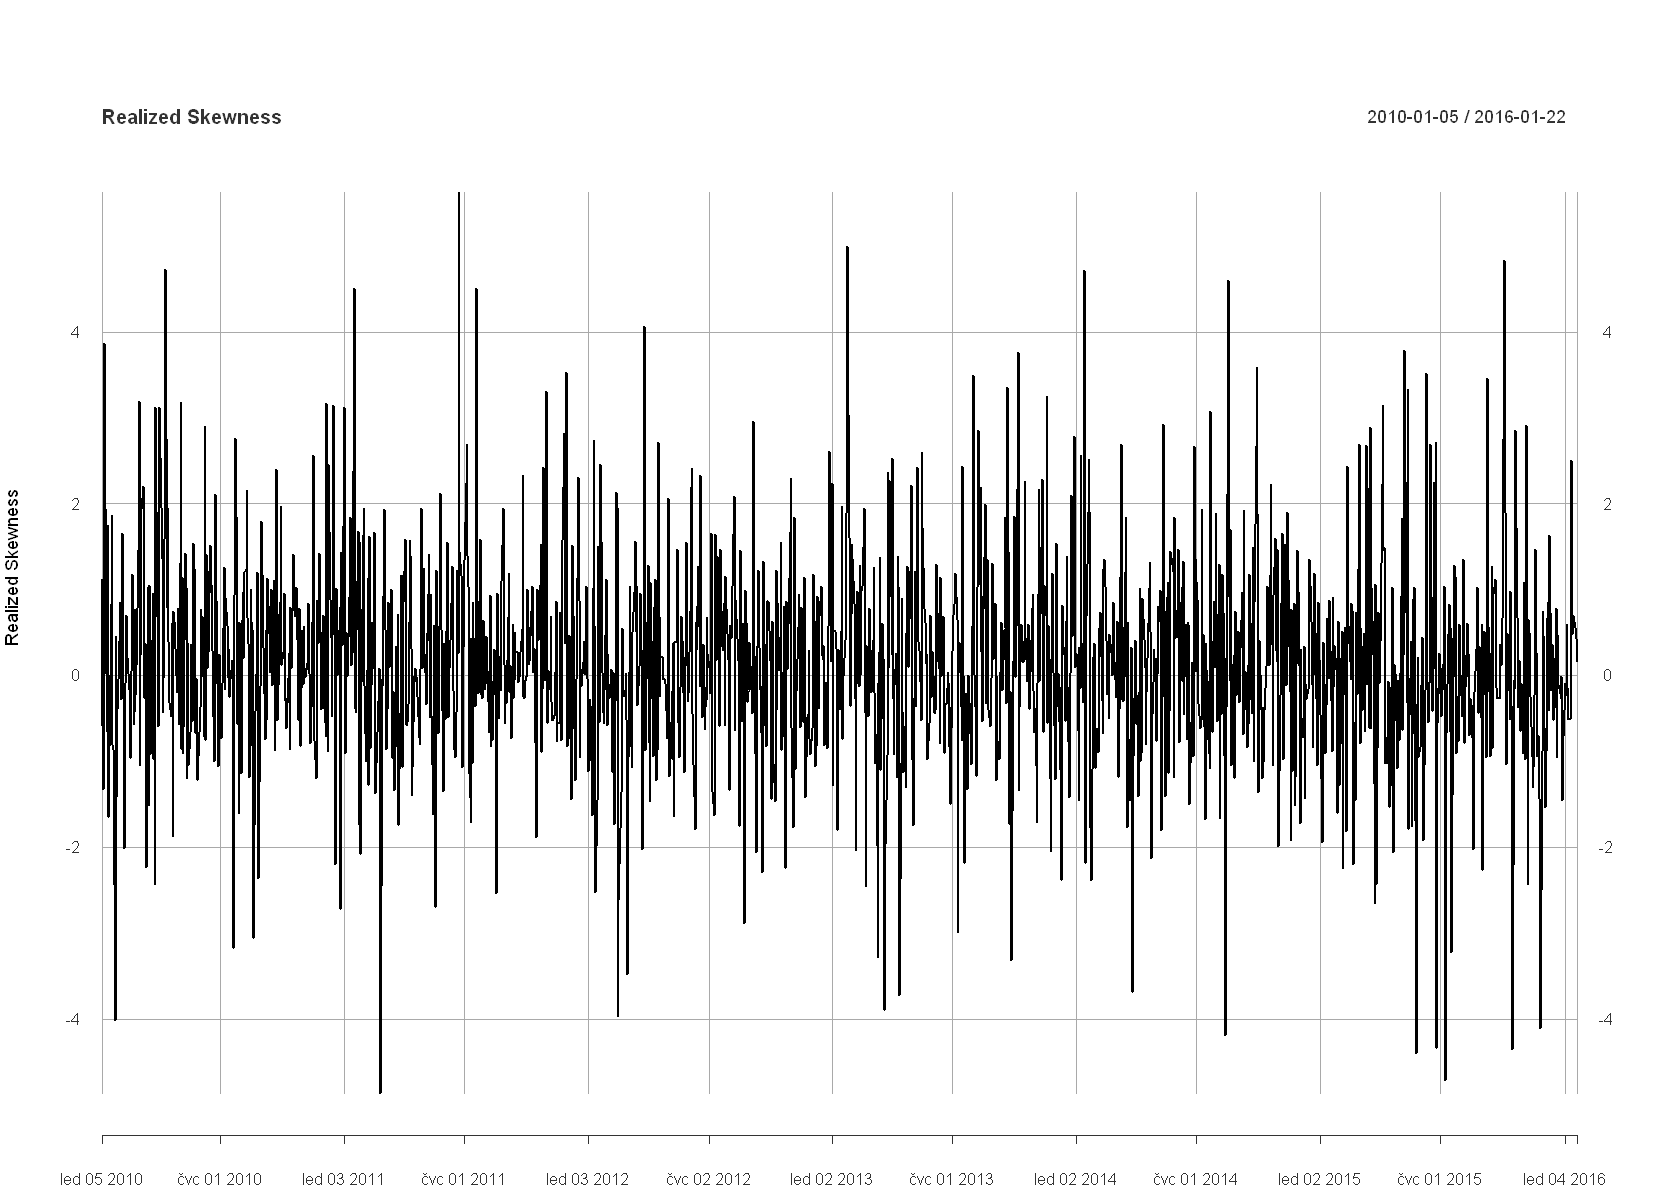

In [34]:
plot(RV_RS, main = "Realized Skewness", xlab = "Date", ylab = "Realized Skewness")

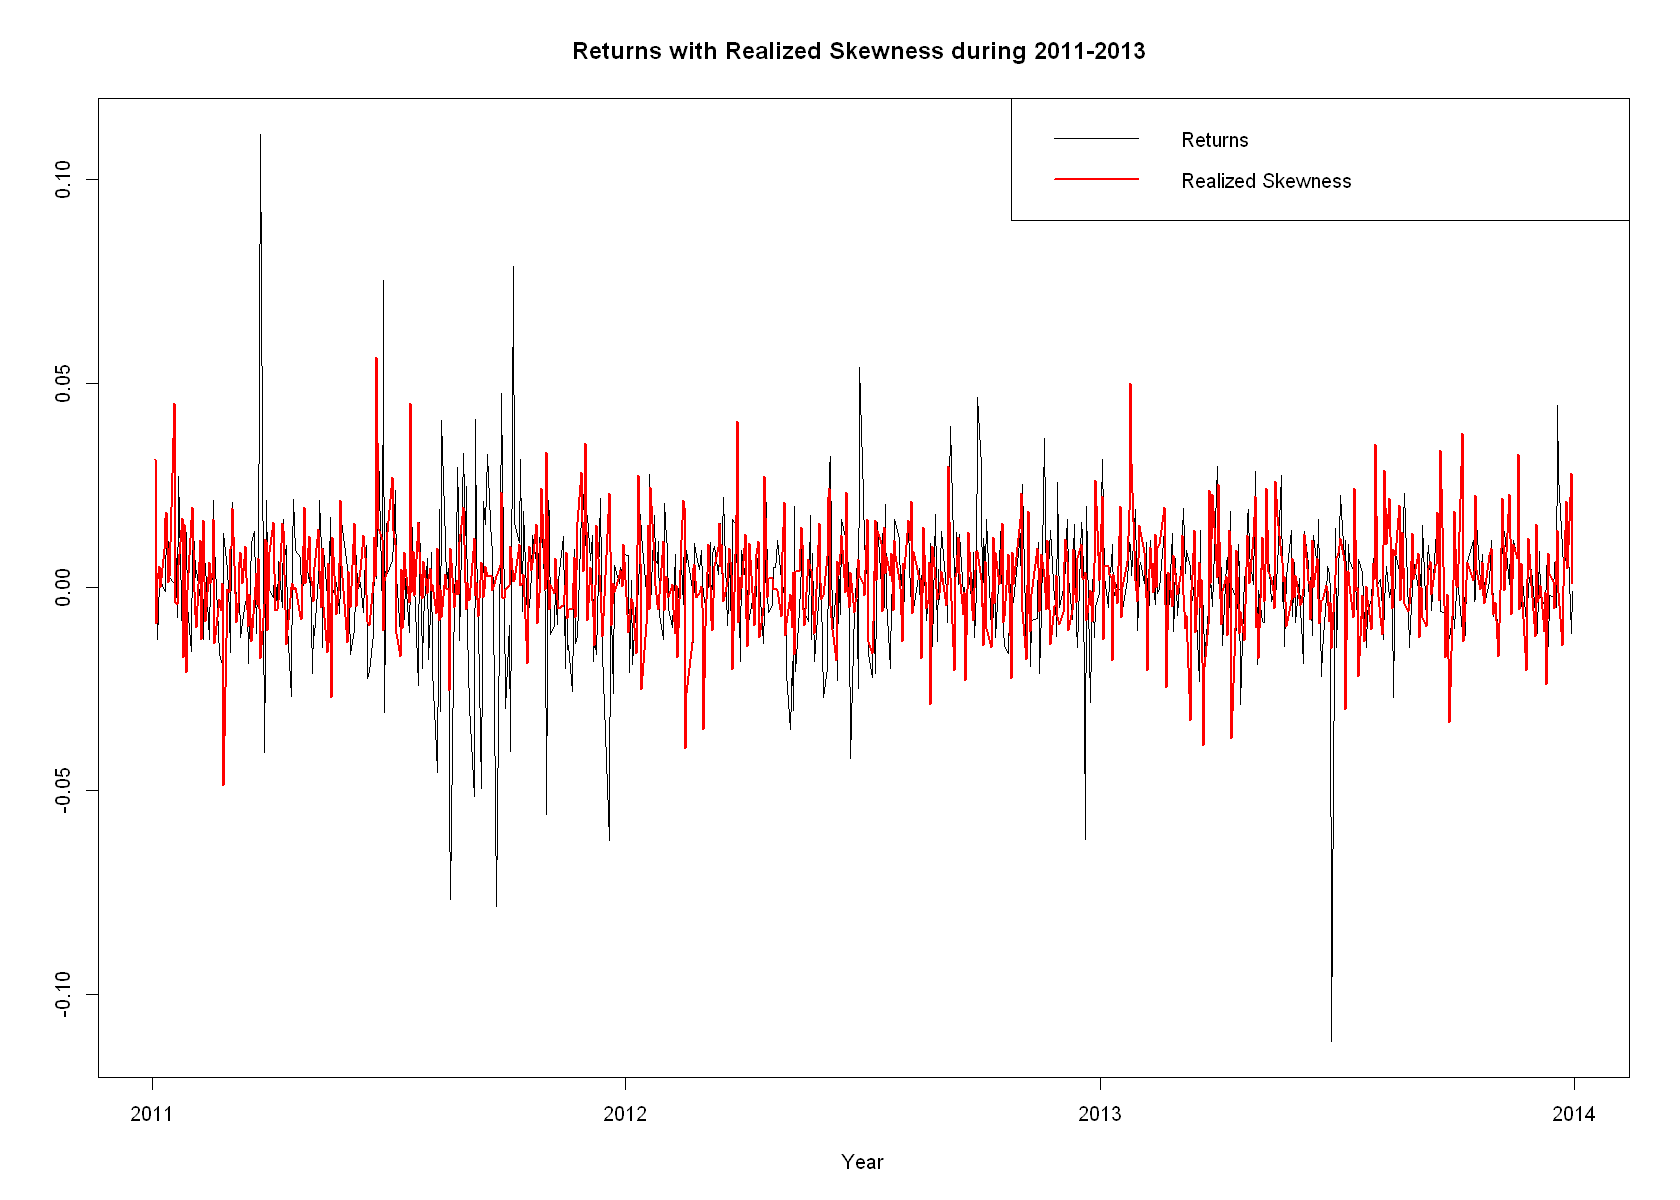

In [35]:
# Define a custom function for plotting zoo objects
plot_custom_zoo <- function(data, x_label, y_label, y_limits, title) {
  plot.zoo(data, xlab = x_label, ylab = y_label, ylim = y_limits, main = title)
}

# Define a custom function for adding lines
add_custom_lines <- function(data, color, line_width) {
  lines(data, col = color, lwd = line_width)
}

# Define the specified date range
date_range <- '2011/2013'

# Transform the data for Realized Skewness
skewness_plot <- RV_RS/100

# Determine the range for the y-axis scaling
y_limits <- compute_range(c(rets[date_range], skewness_plot[date_range]))

# Generate the plot
plot_custom_zoo(rets[date_range], x_label = 'Year', y_label = NA, y_limits = y_limits,
                title = "Returns with Realized Skewness during 2011-2013 ")

# Add lines for the Realized Skewness
add_custom_lines(zoo(skewness_plot[date_range]), color = "red", line_width = 2)
# Add legend
legend("topright", legend = c("Returns", "Realized Skewness"), col = c("black", "red"), lwd = c(1, 2))

From the plot, we can observe that the realized skewness predominantly reflects the influence of jumps, with positive jumps contributing to positive skewness and negative jumps leading to negative skewness except in the second half of 2011 where returns are highly volatile.

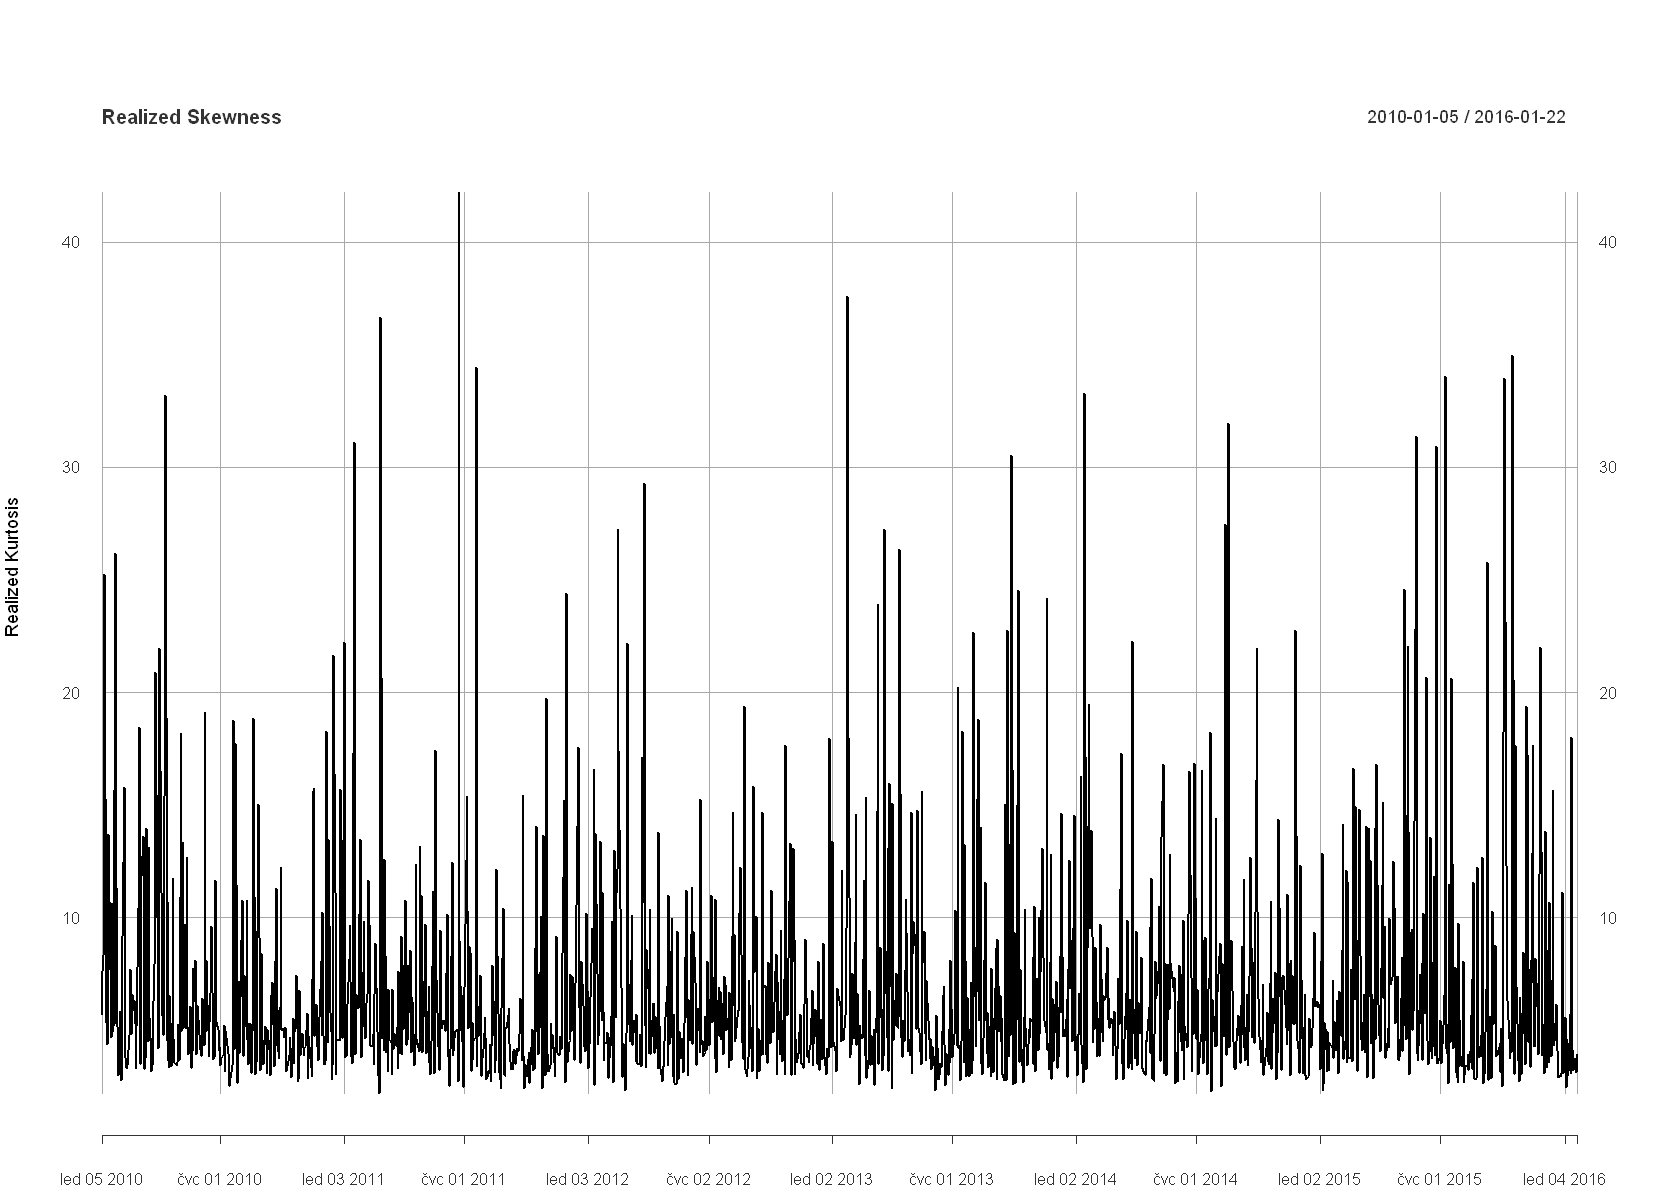

In [36]:
plot(RV_RK, main = "Realized Skewness", xlab = "Date", ylab = "Realized Kurtosis")

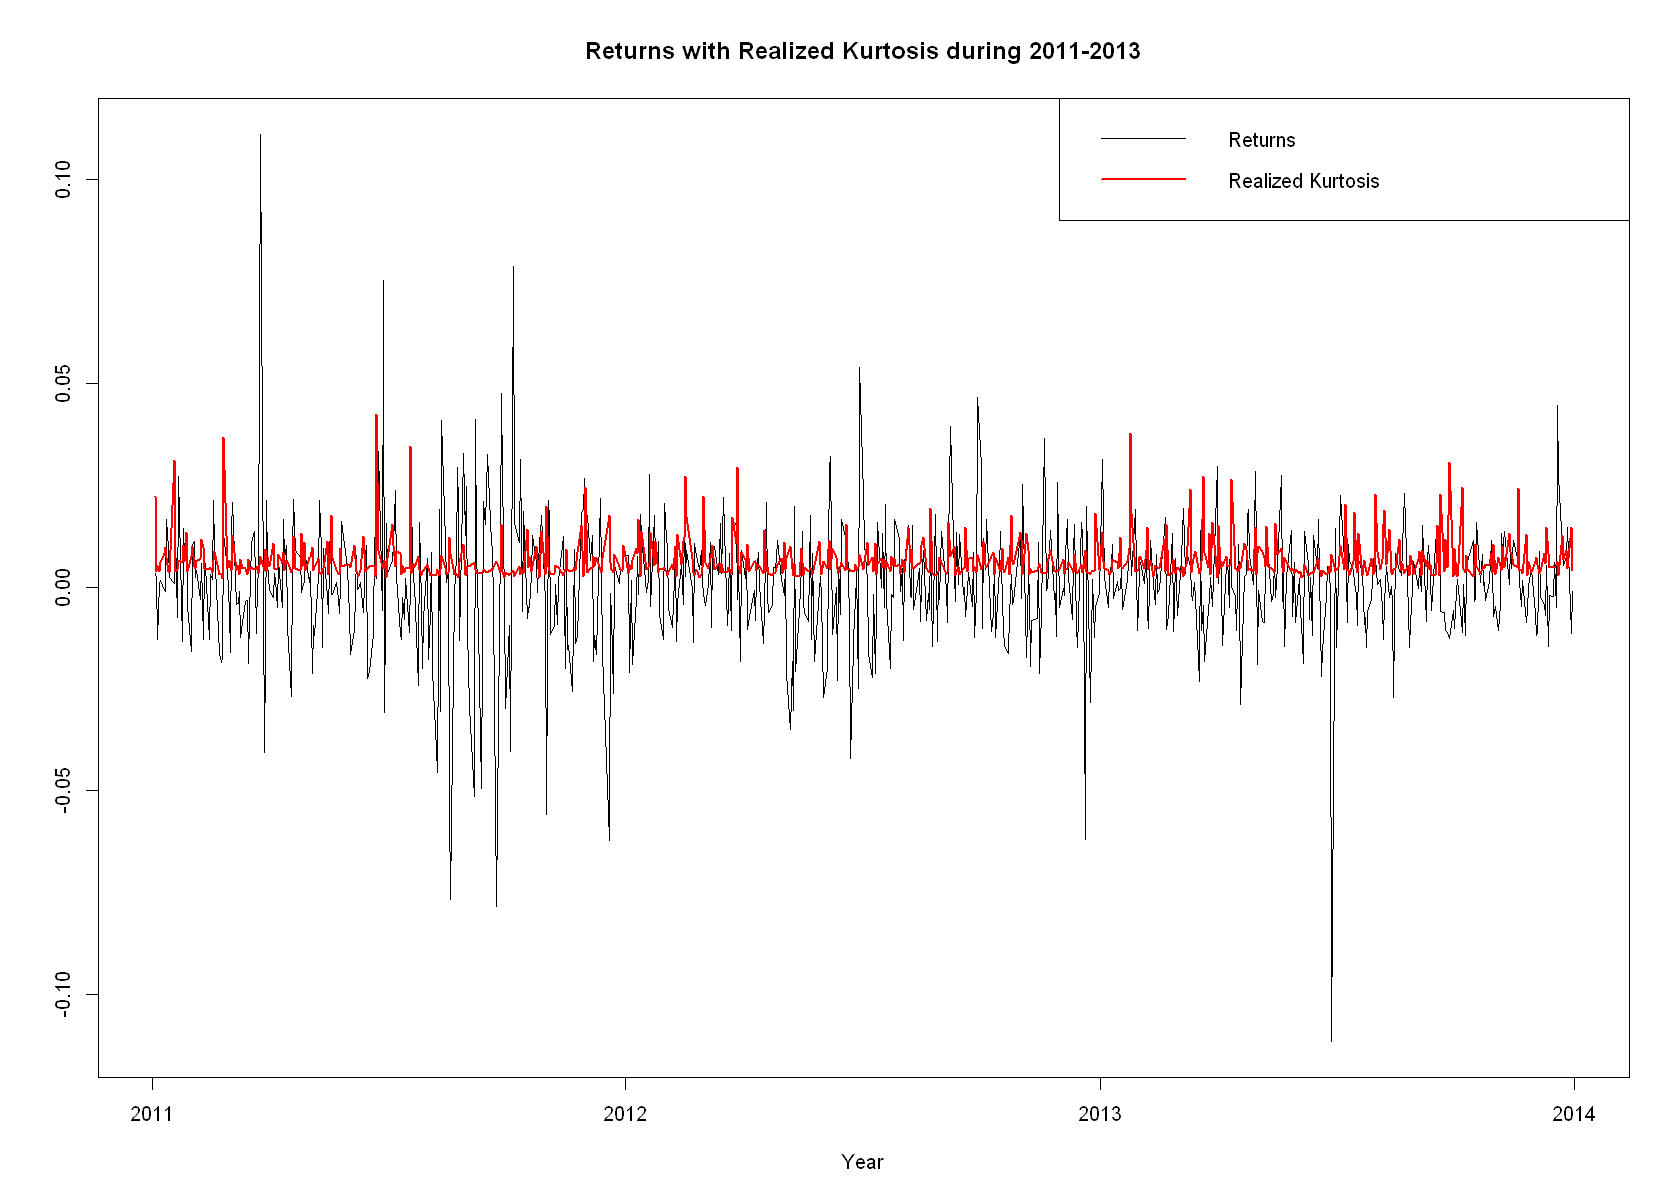

In [37]:
# Define a custom function for plotting zoo objects
plot_custom_zoo <- function(data, x_label, y_label, y_limits, title) {
  plot.zoo(data, xlab = x_label, ylab = y_label, ylim = y_limits, main = title)
}

# Define a custom function for adding lines
add_custom_lines <- function(data, color, line_width) {
  lines(data, col = color, lwd = line_width)
}

# Define the specified date range
interval <- '2011/2013'

# Transform the data for Realized Kurtosis
kurtosis_plot <- RV_RK/1000

# Determine the range for the y-axis scaling
y_limits <- calculate_range(c(rets[interval], kurtosis_plot[interval]))

# Generate the plot
plot_custom_zoo(rets[interval], x_label = 'Year', y_label = NA, y_limits = y_limits,
                title = "Returns with Realized Kurtosis during 2011-2013")

# Add lines for the Realized Kurtosis
add_custom_lines(zoo(kurtosis_plot[interval]), color = "red", line_width = 2)
# Add legend
legend("topright", legend = c("Returns", "Realized Kurtosis"), col = c("black", "red"), lwd = c(1, 2))

We observe that Realized Kurtosis has the potential to indicate the speed at which volatility fluctuates.

# 2. In-sample fit.
## Estimate parameters of the following volatility models with full sample size: AR(1)-RV, HAR, HAR-RS, HAR-Rskew-RKurt, Realized GARCH, ARMA-GARCH. Discuss the fits and compare qualitative differences of the estimates shortly. Note you can simply use the plot comparing in-sample fits of all models.

### AR(1)-RV

The AR(1)-RV model is defined as:

RVₜ = μ + φ ⋅ RVₜ₋₁ + εₜ

Where:
- RVₜ is the realized volatility at time t
- μ is the intercept term
- φ is the autoregressive parameter
- RVₜ₋₁ is the realized volatility at the previous time step
- εₜ is the error term assumed to be independently and identically distributed with mean zero and constant variance.

In [38]:
AR1_fit <- Arima(RV_day,c(1,0,0))
AR1_fit

Series: RV_day 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.5829  0.0102
s.e.  0.0210  0.0002

sigma^2 = 1.124e-05:  log likelihood = 6419.46
AIC=-12832.93   AICc=-12832.91   BIC=-12816.99

### AR(1) Coefficient (ar1)
- **Estimate**: 0.5829
  - The autoregressive coefficient for the first lag is 0.5829.The AR(1) coefficient of 0.5829 indicates a moderate level of persistence in the realized volatility series, meaning past values have a noticeable influence on future values.
- **Standard Error**: 0.0210
  - The standard error indicates the precision of the AR(1) coefficient estimate.

### Mean
- **Estimate**: 0.0102
- **Standard Error**: 0.0002
  - The standard error shows the precision of the mean estimate.

- The small standard errors for both the AR(1) coefficient and the mean suggest that these estimates are precise.

### Error Term
- **Sigma^2 (Variance of Residuals)**: 1.124e-05
  - The estimated variance of the residuals indicates the variability of the model's residuals.The low variance of the residuals (sigma^2) indicates that the model captures most of the variability in the data.

### Model Fit:
- **Log Likelihood**: The log likelihood of the model is 6419.46, a measure used to compare different models, where higher values indicate a better fit.
- **AIC (Akaike Information Criterion)**: The AIC is -12832.93. Lower AIC values suggest a better model fit.
- **AICc (Corrected AIC)**: The corrected AIC is -12832.91, adjusted for the sample size.
- **BIC (Bayesian Information Criterion)**: The BIC is -12816.99, another criterion for model selection where lower values indicate a better fit, but it penalizes models with more parameters more heavily than the AIC.

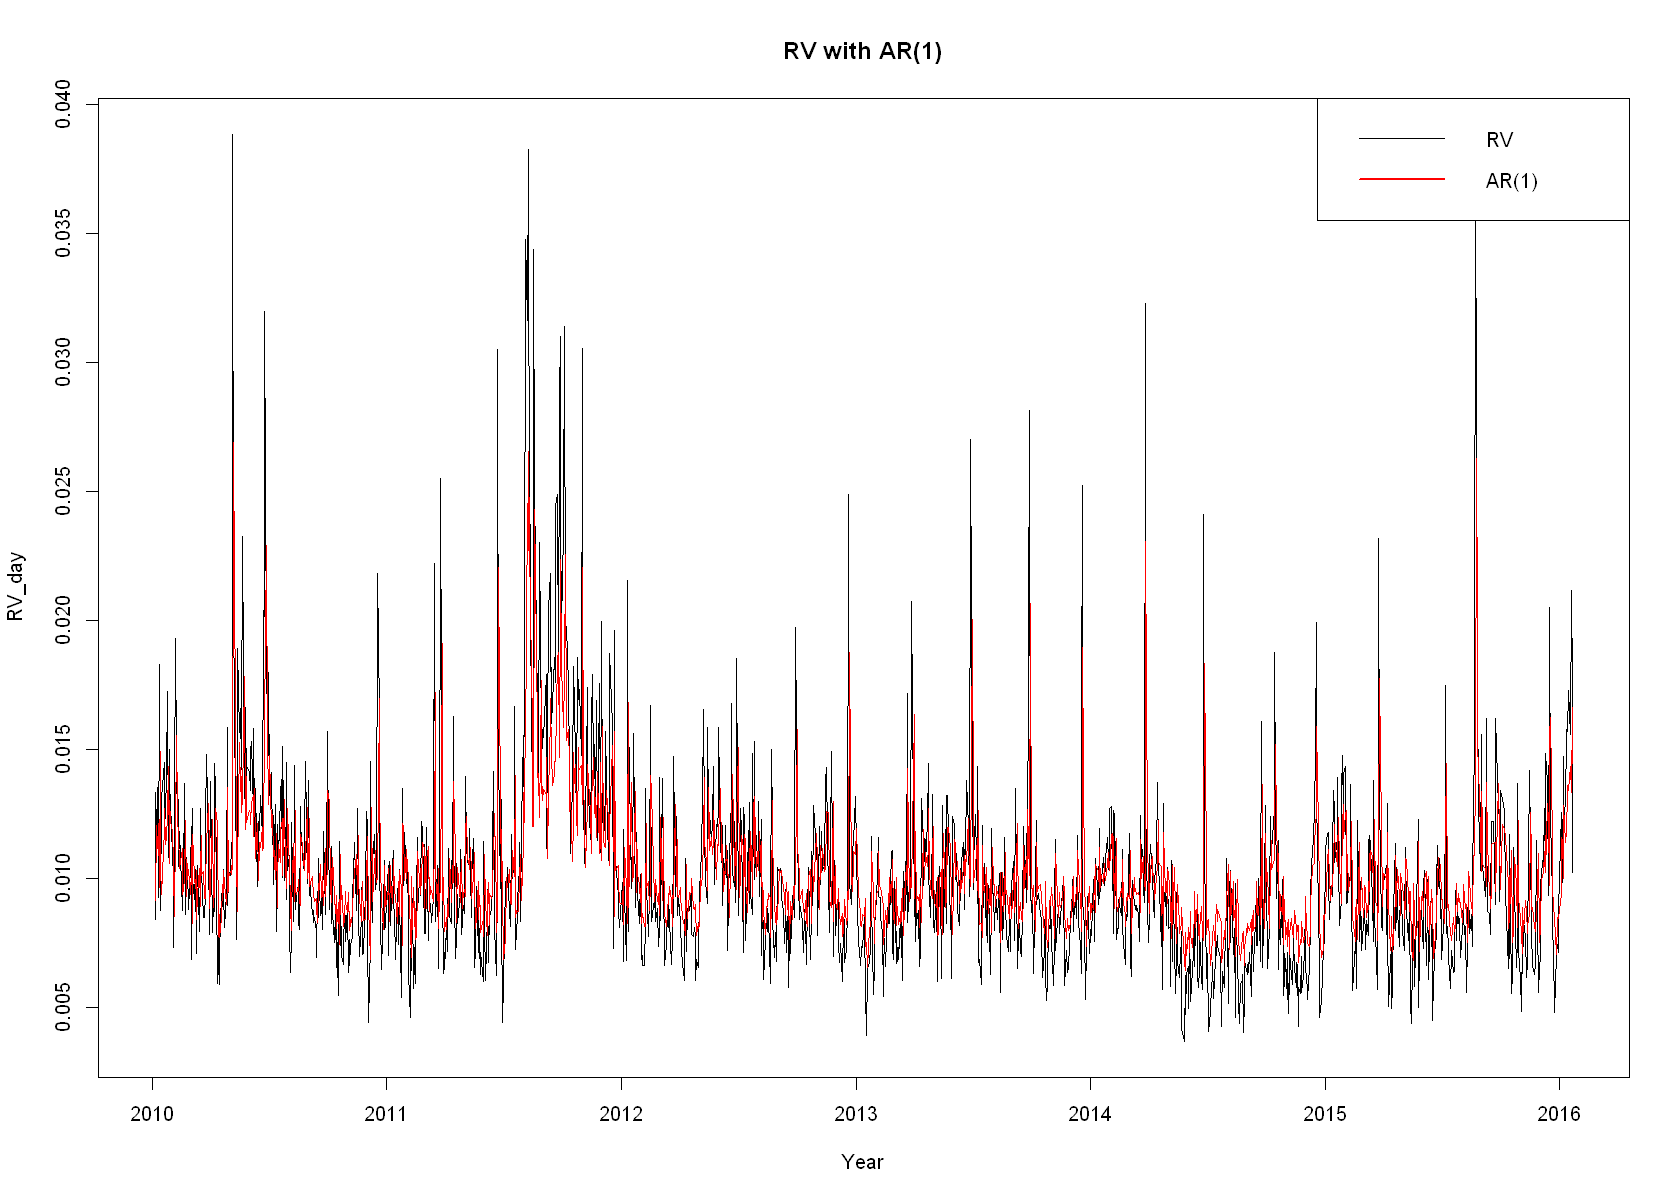

In [39]:
AR1 <- xts(AR1_fit$fitted,order.by = index(RV_day))

plot.zoo(RV_day, xlab='Year', main= "RV with AR(1)")
lines(zoo(AR1), col = 'red')
# Add legend
legend("topright", legend = c("RV", "AR(1)"), col = c("black", "red"), lwd = c(1, 2))

### HAR

The HAR (Heterogeneous Autoregressive) model for realized volatility can be expressed as:

$RV_{t} = \beta_{0} + \beta_{1}RV_{t-1}(d) + \beta_{2}RV_{t-1}(w) + \beta_{3}RV_{t-1}(m) + u_{t}$


Where:
- $RV_{t}$ is the realized volatility at time t.
- $RV_{t-1}(d)$ is the daily realized volatility.
- $RV_{t-1}(w)$ is the weekly realized volatility.
- $RV_{t-1}(m)$ is the monthly realized volatility.
- $u_{t}$ is normally distributed error term.


In [40]:
HAR_fit <- HARmodel(data = RV_day , periods = c(1,5,22),
    type = "HAR", h = 1, transform = NULL, inputType = "RM")
HAR_fit


Model:
RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22

Coefficients:
   beta0     beta1     beta2     beta3  
0.001428  0.348395  0.261157  0.251014  
Newey-West Standard Errors:
    beta0      beta1      beta2      beta3  
0.0003583  0.0608128  0.0510227  0.0555367  


    r.squared  adj.r.squared  
       0.4002         0.3990  


## HAR Coefficients
- **Intercept (β₀)**: 0.001428
  - This constant term indicates the baseline level of the dependent variable when all lagged terms are zero.
- **β₁**: 0.348395
  - This coefficient measures the effect of RV₁ₜ₋₁ (realized volatility at lag 1, which means a day ago) on RV₁ₜ. A positive value suggests a moderate effect.
- **β₂**: 0.261157
  - This coefficient measures the effect of RV₁ₜ₋₅ (realized volatility at lag 5, which means a week ago) on RV₁ₜ. A positive value suggests a moderate effect.
- **β₃**: 0.251014
  - This coefficient measures the effect of RV₁ₜ₋₂₂ (realized volatility at lag 22, which means a month ago) on RV₁ₜ. A positive value suggests a moderate effect.
- The positive coefficients (β₁, β₂, β₃) suggest that higher values of past realized volatility (at lags 1, 5, and 22) are associated with higher current realized volatility (RV₁ₜ), reflecting volatility persistence.
- The intercept (β₀) provides the baseline level of realized volatility, which is small but positive.

## Newey-West Standard Errors
- **Standard Error of β₀**: 0.0003583
- **Standard Error of β₁**: 0.0608128
- **Standard Error of β₂**: 0.0510227
- **Standard Error of β₃**: 0.0555367
  - These standard errors are adjusted for potential autocorrelation and heteroscedasticity in the residuals using the Newey-West method, indicating precise estimates.
- The relatively small Newey-West standard errors indicate precise estimates, suggesting the model accounts well for autocorrelation and heteroscedasticity in the data.

## Goodness-of-Fit
- **R-squared**: 0.4002
  - Approximately 40.02% of the variance in RV₁ₜ is explained by the model, suggesting a moderate fit.
- **Adjusted R-squared**: 0.3990
  - This adjusted statistic accounts for the number of predictors in the model, indicating a similar level of explanatory power to the R-squared.
- The R-squared and adjusted R-squared values around 0.40 suggest that the model explains a substantial portion of the variance in realized volatility but also leaves room for other factors not captured by the model.


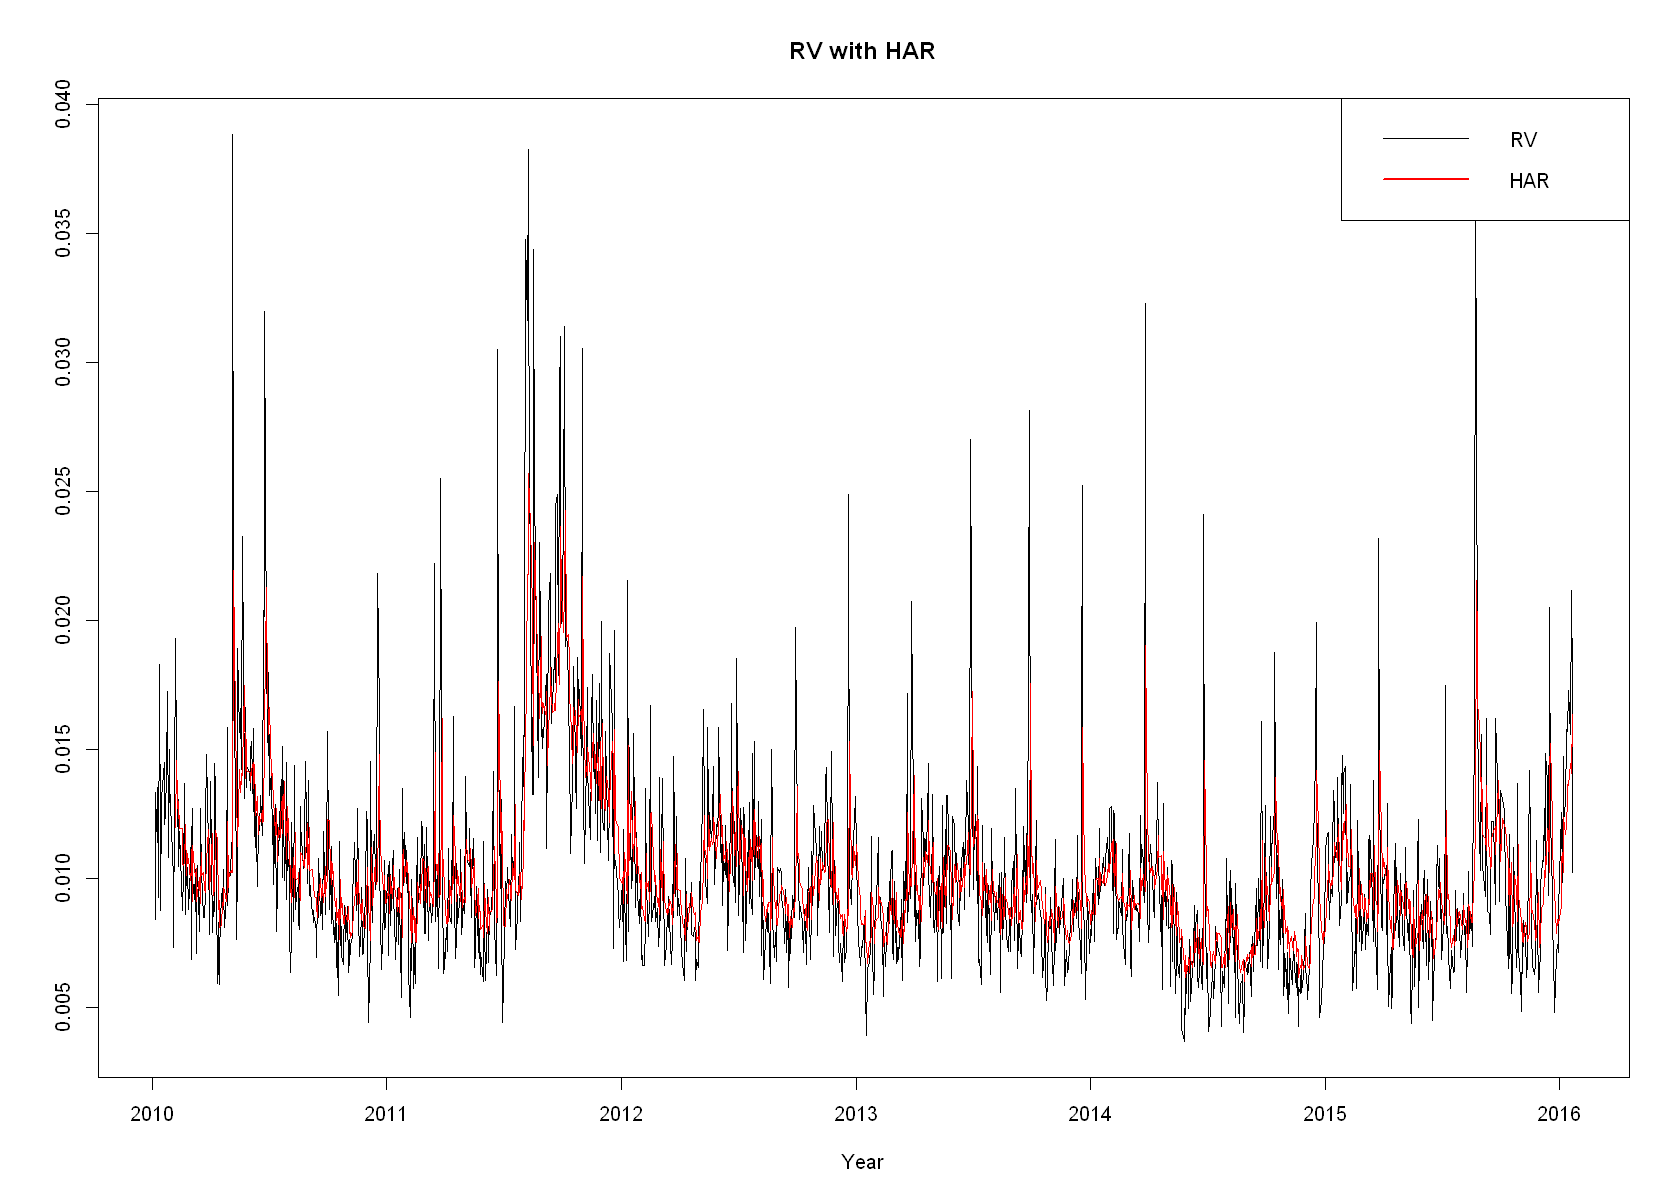

In [41]:
TT <- length(RV_day)
HAR<-xts(HAR_fit$fitted.values,order.by = index(RV_day)[23:TT])
plot.zoo(RV_day, xlab='Year', ylab=NA, main= "RV with HAR")
lines(zoo(HAR), col = 'red')
# Add legend
legend("topright", legend = c("RV", "HAR"), col = c("black", "red"), lwd = c(1, 2))

### HAR-RS

The HAR-RS in general form looks as:


$RV_{t} = \beta_{0} + \beta_{1}^{+}RS_{t-1}^{+}(d) + \beta_{1}^{-}RS_{t-1}^{-}(d)  + \beta_{2}RV_{t-1}(w) + \beta_{3}RV_{t-1}(m) + u_{t}$

Where (except above):
- daily realized volatility ($RV_{t-1}(d)$) is decomposed into positive and negative semivariances.


In case no new information is brought by this decomposition, negative and positive beta should be equal to beta from previous model.

In [42]:
RV5 <- unlist(lapply(lapply(1:(TT - 4), function (t) {
    return(RV_day[t:(t + 4)])}), mean))
RV22 <- unlist(lapply(lapply(1:(TT - 21), function (t) {
    return(RV_day[t:(t + 21)])}), mean))
T5 <- length(RV5)
T22 <- length(RV22)

# included semivariance into HAR model
HAR_RS_fit <- lm(RV_day[23:TT] ~ RV_p[22:(TT - 1)]
    + RV_n[22:(TT - 1)] + RV5[18:(T5 - 1)] + RV22[1:(T22 - 1)])

summary(HAR_RS_fit)


Call:
lm(formula = RV_day[23:TT] ~ RV_p[22:(TT - 1)] + RV_n[22:(TT - 
    1)] + RV5[18:(T5 - 1)] + RV22[1:(T22 - 1)])

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0086419 -0.0017856 -0.0004084  0.0010619  0.0285913 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.0014301  0.0003419   4.183 3.05e-05 ***
RV_p[22:(TT - 1)] 0.2454354  0.0415427   5.908 4.29e-09 ***
RV_n[22:(TT - 1)] 0.2748359  0.0411254   6.683 3.31e-11 ***
RV5[18:(T5 - 1)]  0.2459701  0.0508561   4.837 1.46e-06 ***
RV22[1:(T22 - 1)] 0.2509630  0.0510089   4.920 9.63e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003199 on 1473 degrees of freedom
Multiple R-squared:  0.4032,	Adjusted R-squared:  0.4016 
F-statistic: 248.8 on 4 and 1473 DF,  p-value: < 2.2e-16


- **Intercept**: The estimated intercept (𝛽̂₀) is 0.0014301, with a standard error of 0.0003419.
- **RV_p[22:(TT - 1)]**: The coefficient estimate for the positive Realized Semivariance is 0.2454354, with a standard error of 0.0415427.
- **RV_n[22:(TT - 1)]**: The coefficient estimate for the negative Realized Semivariance is 0.2748359, with a standard error of 0.0411254.
- **RV5[18:(T5 - 1)]**: The coefficient estimate for the realized volatility at lag 5 to (T5 - 1) is 0.2459701, with a standard error of 0.0508561.
- **RV22[1:(T22 - 1)]**: The coefficient estimate for the realized volatility at lag 22 to (T22 - 1) is 0.2509630, with a standard error of 0.0510089.

- The model suggests that the positive and negative Realized Semivariancerealized, as well as the realized volatility at lags 5 and 22, are all significant predictors of the current realized volatility (RV_day).
- All of them positively contribute to the current realized volatility.


**Negative and positive beta differs from beta (0.348) from original HAR model.**

### Model Fit

- **Residual Standard Error**: The residual standard error is 0.003199 on 1473 degrees of freedom, indicating the average magnitude of the residuals around the regression line.
- **R-squared**: The 𝑅² value is 0.4032, indicating that approximately 40.32% of the variability in the dependent variable is explained by the independent variables.
- **Adjusted R-squared**: The adjusted 𝑅² value is 0.4016, which accounts for the number of predictors in the model.
- **F-statistic**: The F-statistic is 248.8 on 4 and 1473 degrees of freedom, with a very low p-value (< 2.2e-16), suggesting that the model is statistically significant.


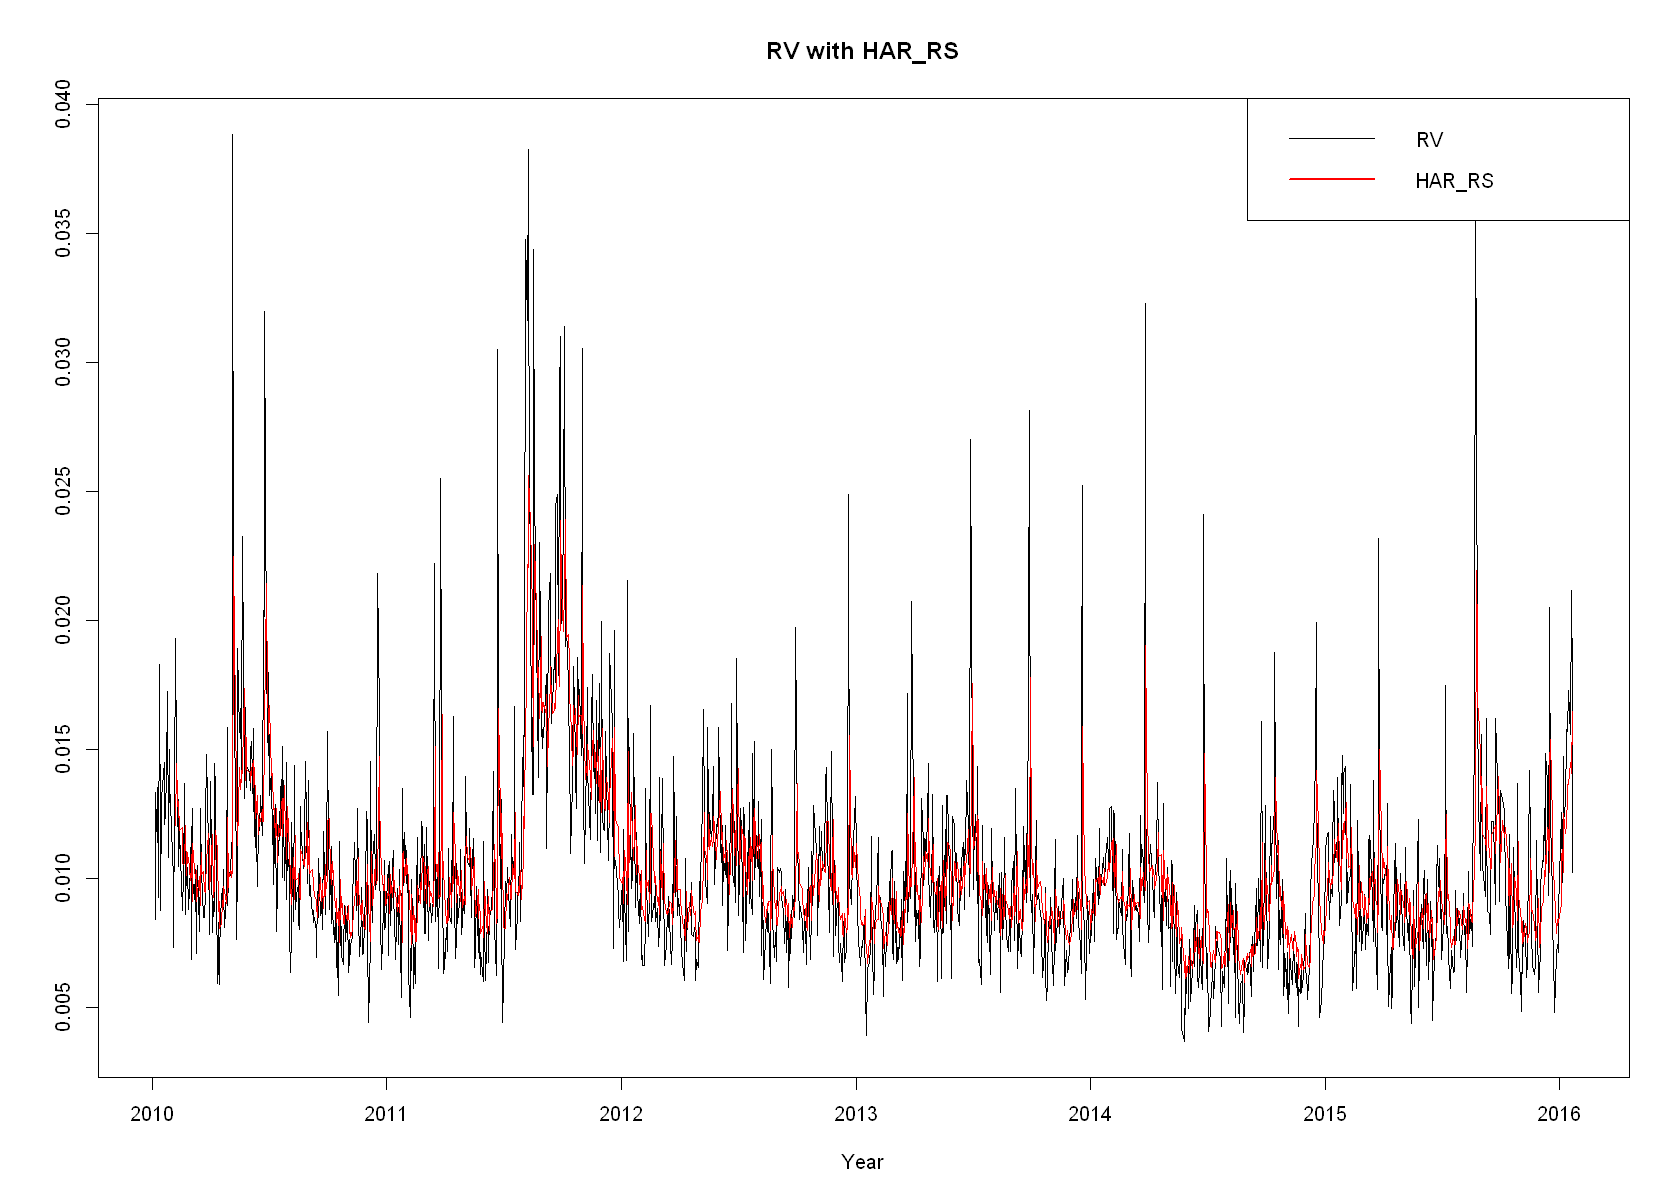

In [43]:
HAR_RS <- HAR_RS_fit$fitted.values
plot.zoo(RV_day, xlab='Year', ylab=NA, main= "RV with HAR_RS")
lines(zoo(HAR_RS), col = 'red')
# Add legend
legend("topright", legend = c("RV", "HAR_RS"), col = c("black", "red"), lwd = c(1, 2))

### HAR-Rskew-RKurt

The HAR-Rskew-RKurt model can be represented by the following equation:

$RV_{t} = \beta_{0} + \beta_{1}RV_{t-1}(d) + \beta_{2}RV_{t-1}(w) + \beta_{3}RV_{t-1}(m) + \beta_{4}RSkew_{t-1}(d) + \beta_{5}RKurt_{t-1}(d) + u_{t}$

where (except above):

- $RSkew_{t-1}$ is daily realized skewness
- $RKurt_{t-1}$ is daily realized kurtosis

In [44]:
HAR_KS_fit<-lm(RV_day[23:TT] ~ RV_day[22:(TT - 1)] + RV5[18:(T5 - 1)]
    + RV22[1:(T22 - 1)] + RV_RK[22:(TT - 1)] + RV_RS[22:(TT - 1)])

summary(HAR_KS_fit)


Call:
lm(formula = RV_day[23:TT] ~ RV_day[22:(TT - 1)] + RV5[18:(T5 - 
    1)] + RV22[1:(T22 - 1)] + RV_RK[22:(TT - 1)] + RV_RS[22:(TT - 
    1)])

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0084816 -0.0017308 -0.0004544  0.0011070  0.0284147 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.434e-03  3.619e-04   6.727 2.47e-11 ***
RV_day[22:(TT - 1)]  4.205e-01  3.108e-02  13.529  < 2e-16 ***
RV5[18:(T5 - 1)]     1.979e-01  5.047e-02   3.921 9.22e-05 ***
RV22[1:(T22 - 1)]    2.299e-01  5.023e-02   4.576 5.13e-06 ***
RV_RK[22:(TT - 1)]  -1.345e-04  1.782e-05  -7.547 7.76e-14 ***
RV_RS[22:(TT - 1)]   8.576e-05  6.941e-05   1.236    0.217    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003148 on 1472 degrees of freedom
Multiple R-squared:  0.4226,	Adjusted R-squared:  0.4206 
F-statistic: 215.4 on 5 and 1472 DF,  p-value: < 2.2e-16


- **Intercept**: The estimated intercept (𝛽̂₀) is 0.002434, with a standard error of 0.0003619.
- **RV_day[22:(TT - 1)]**: The coefficient estimate (𝛽̂₁) for the realized volatility at lag 1 is 0.4205, with a standard error of 0.03108.
- **RV5[18:(T5 - 1)]**: The coefficient estimate (𝛽̂₂) for the realized volatility at lag 5 to (T5 - 1) is 0.1979, with a standard error of 0.05047.
- **RV22[1:(T22 - 1)]**: The coefficient estimate (𝛽̂₃) for the realized volatility at lag 22 to (T22 - 1) is 0.2299, with a standard error of 0.05023.
- **RV_RK[22:(TT - 1)]**: The coefficient estimate (𝛽̂₄) for the realized kurtosis is -0.0001345, with a standard error of 0.00001782.
- **RV_RS[22:(TT - 1)]**: The coefficient estimate (𝛽̂₅) for the realized skewness is 0.00008576, with a standard error of 0.00006941.
- The model suggests that the realized volatility at lags 22 and 5, as well as the realized kurtosis, are significant predictors of the current realized volatility (RV_day).
- Positive coefficients for RV_day at lags 22 and 5 suggest that higher values of past realized volatility are associated with higher current realized volatility.
- The negative coefficient for the realized kurtosi suggests that higher kurtosis in past realized volatility is associated with lower current realized volatility.
- The realized skewness does not appear to be a significant predictor of the current realized volatility.

### Model Fit

- **Residual Standard Error**: The residual standard error is 0.003148 on 1472 degrees of freedom, indicating the average magnitude of the residuals around the regression line.
- **R-squared (𝑅²)**: The R² value is 0.4226, indicating that approximately 42.26% of the variability in the dependent variable is explained by the independent variables.
- **Adjusted R-squared**: The adjusted R² value is 0.4206, which accounts for the number of predictors in the model.
- **F-statistic**: The F-statistic is 215.4 on 5 and 1472 degrees of freedom, with a very low p-value (< 2.2e-16), suggesting that the model is statistically significant.


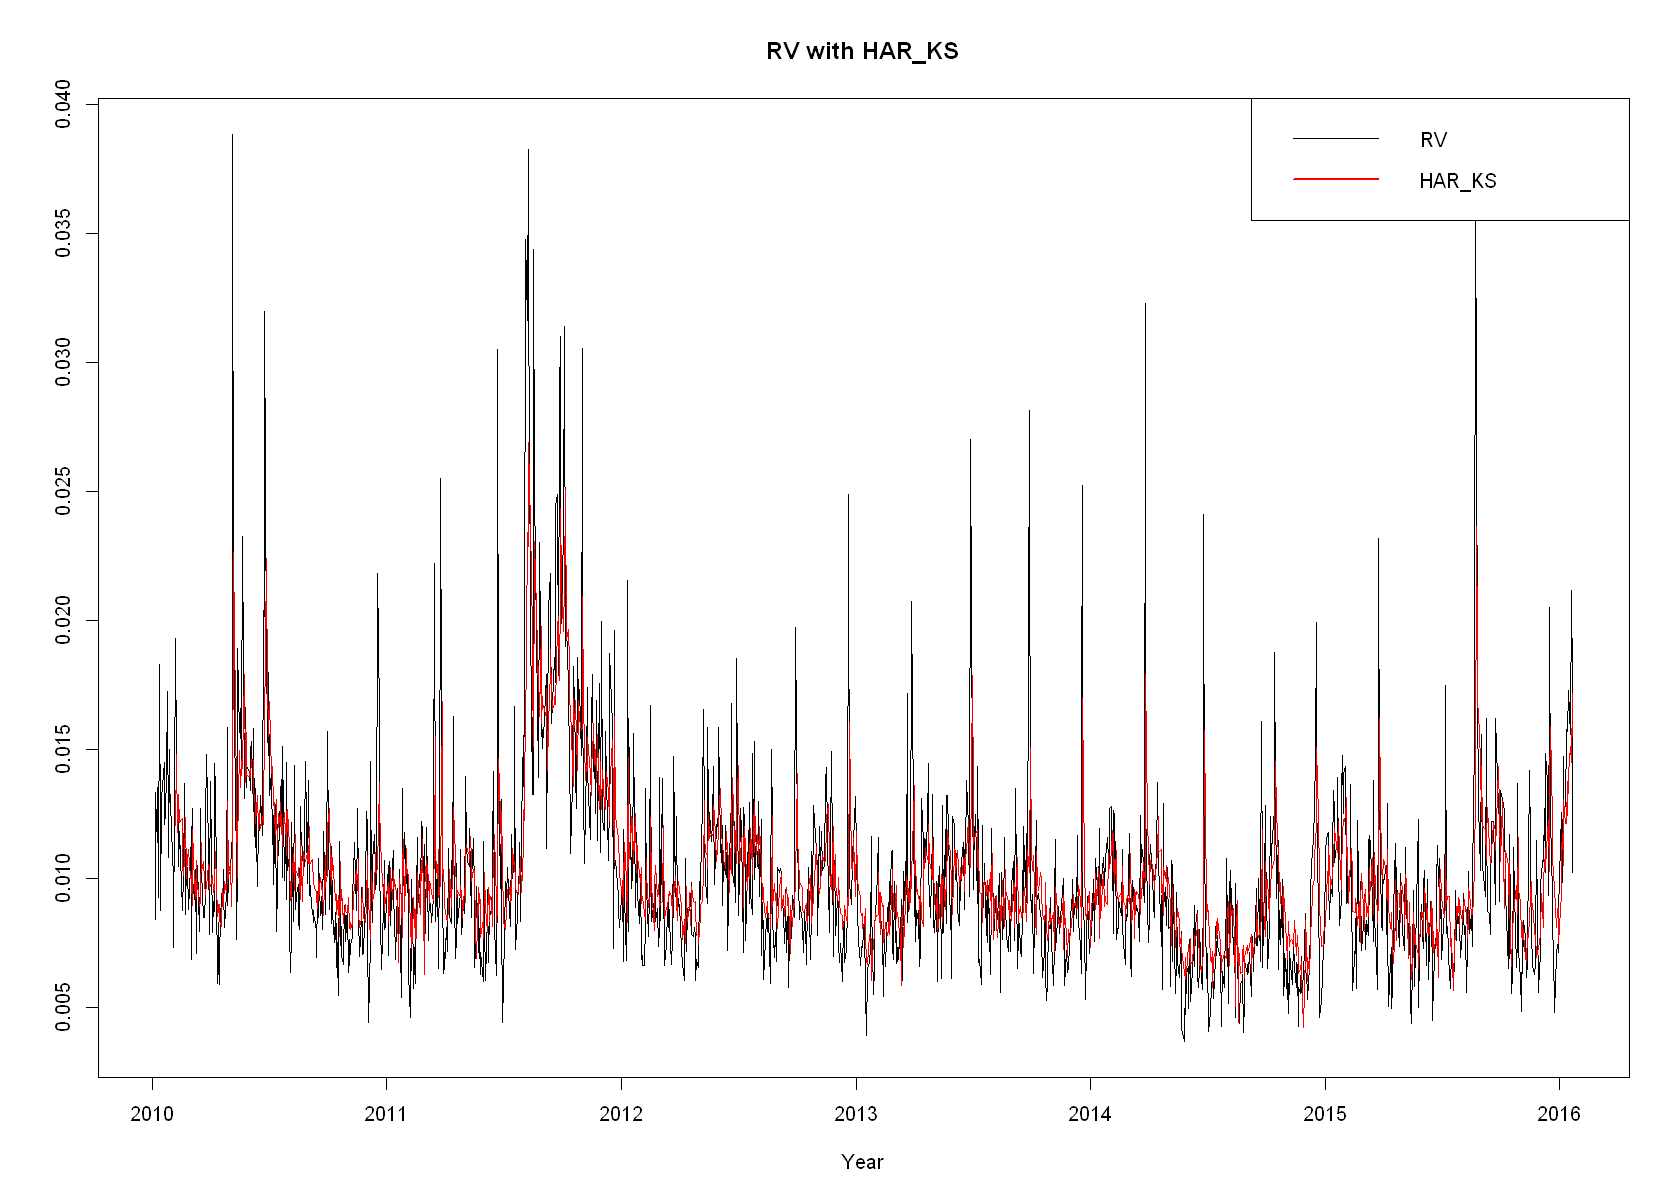

In [45]:
HAR_KS <- HAR_KS_fit$fitted.values
plot.zoo(RV_day, xlab='Year', ylab=NA, main= "RV with HAR_KS")
lines(zoo(HAR_KS), col = 'red')
#Add legend
legend("topright", legend = c("RV", "HAR_KS"), col = c("black", "red"), lwd = c(1, 2))

### Realized GARCH

The RGARCH (Realized GARCH) model can be represented by the following equation:

σₜ² = ω + ∑ᵢ₌₁ᵖ αᵢ εₜ₋ᵢ² + ∑ⱼ₌₁ᵠ βⱼ σₜ₋ⱼ² + γRₜ

where:

- σₜ² is the conditional variance of returns at time t.
- ω is the intercept parameter.
- αᵢ are the coefficients for the lagged squared errors (εₜ₋ᵢ²) up to order p.
- βⱼ are the coefficients for the lagged conditional variances (σₜ₋ⱼ²) up to order q.
- γ is the coefficient for the realized volatility or realized variance term Rₜ.
- Rₜ is the realized volatility or realized variance of returns at time t.
- p and q are the orders of the autoregressive and moving average terms, respectively.


In [46]:
real_garchspec<- ugarchspec(variance.model = list(model = 'realGARCH',
    garchOrder = c(1, 1)), mean.model = list(armaOrder=c(0, 0),
    include.mean=TRUE))

RGarch_fit <- ugarchfit(real_garchspec, rets, solver = 'hybrid',
    realizedVol = RV_day)
RGarch_fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: realGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000717    0.000306   2.3451 0.019024
omega   0.777643    0.330778   2.3510 0.018725
alpha1  1.000000    0.171347   5.8361 0.000000
beta1   0.555954    0.066376   8.3759 0.000000
eta11  -0.032769    0.006494  -5.0463 0.000000
eta21   0.020542    0.002121   9.6855 0.000000
delta   0.348285    0.026607  13.0897 0.000000
lambda  0.247214    0.004540  54.4507 0.000000
xi     -1.610977    0.230051  -7.0027 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000717    0.000283   2.5339 0.011281
omega   0.777643    0.670449   1.1599 0.246096
alpha1  1.000000    0.546007   1.8315 0.067029
beta1

- **alpha1**: The estimated coefficient for the ARCH(1) parameter is 1.000000, indicating the immediate impact of past squared errors on the conditional variance.
- **beta1**: The estimated coefficient for the GARCH(1) parameter is 0.555956, indicating the persistence of past conditional variances on the current conditional variance.
- Overall, the RGARCH model provides a good fit to the data, capturing the immediate impact and persistence of past conditional variances effectively.

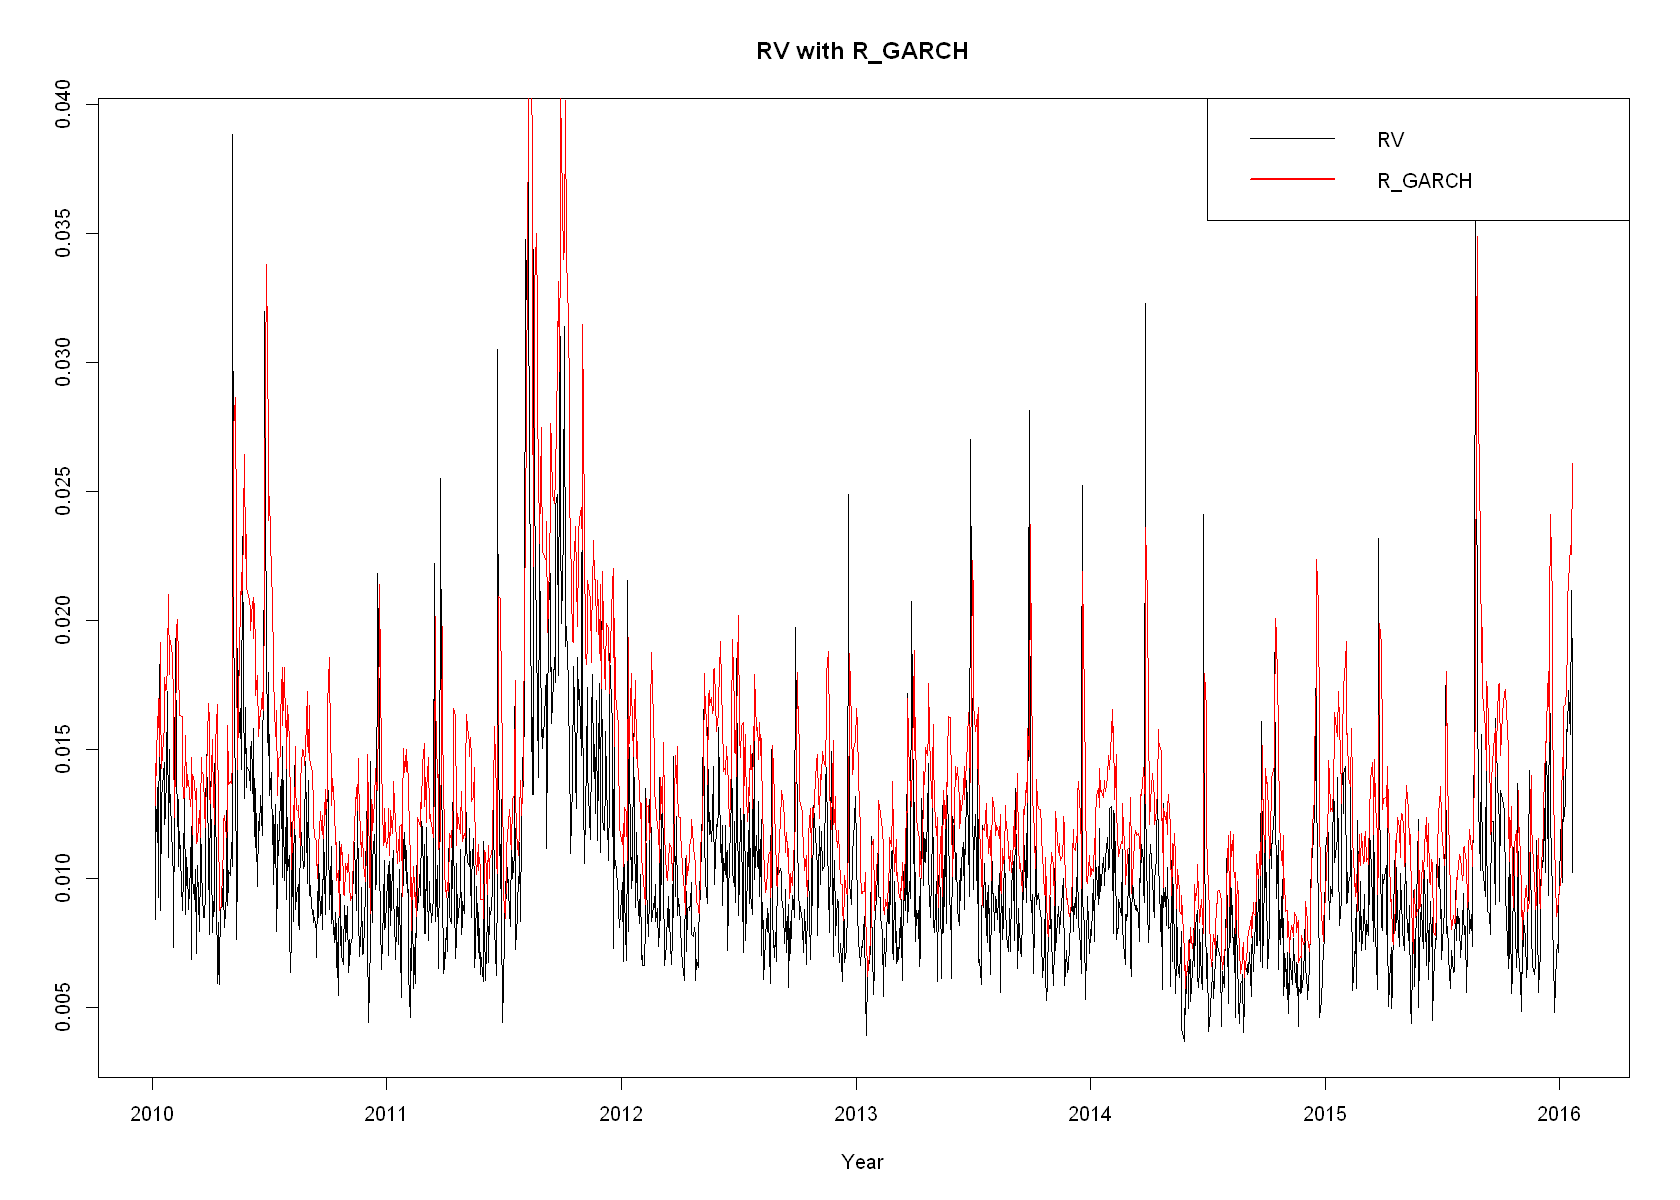

In [47]:
R_GARCH<-xts(RGarch_fit@fit$sigma,order.by = index(RV_day))


plot.zoo(RV_day, xlab='Year', ylab=NA, main= "RV with R_GARCH")
lines(zoo(R_GARCH), col = 'red')
#Add legend
legend("topright", legend = c("RV", "R_GARCH"), col = c("black", "red"), lwd = c(1, 2))

### ARMA-GARCH

### Mean Equation (ARMA):

The mean equation (ARMA) is defined as:

Y_t = c + φ_1 Y_{t-1} + ... + φ_p Y_{t-p} + θ_1 ε_{t-1} + ... + θ_q ε_{t-q} + ε_t

Where:
- Y_t is the observed time series data.
- c is a constant term.
- φ_1, ..., φ_p are the autoregressive parameters.
- θ_1, ..., θ_q are the moving average parameters.
- ε_t is the error term following a white noise process with zero mean and constant variance.

### Volatility Equation (GARCH):

The volatility equation (GARCH) is defined as:

σ_t^2 = ω + α_1 ε_{t-1}^2 + ... + α_p ε_{t-p}^2 + β_1 σ_{t-1}^2 + ... + β_q σ_{t-q}^2

Where:
- σ_t^2 is the conditional variance of the error term at time t.
- ω is the intercept term in the GARCH model.
- α_1, ..., α_p are the coefficients of the ARCH terms.
- β_1, ..., β_q are the coefficients of the GARCH terms.
- p and q are the orders of the AR and MA processes in the mean equation, and the ARCH and GARCH processes in the volatility equation, respectively.


We estimate ARMA(0,0)-GARCH(1,1).

In [48]:
garchspec <- ugarchspec(mean.model = list(armaOrder = c(0, 0)),
        variance.model = list(garchOrder = c(1, 1)))
garch1 <- ugarchfit(garchspec, rets)
garch1


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000864    0.000346   2.5005 0.012401
omega   0.000020    0.000005   3.6688 0.000244
alpha1  0.084604    0.019330   4.3769 0.000012
beta1   0.825762    0.037474  22.0355 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000864    0.000335   2.5775 0.009953
omega   0.000020    0.000011   1.7111 0.087066
alpha1  0.084604    0.036907   2.2923 0.021887
beta1   0.825762    0.075207  10.9798 0.000000

LogLikelihood : 4279.614 

Information Criteria
------------------------------------
                    
Akaike       -5.7008
Bayes        -5.6867
Shibata      -5.7008
Hannan-Quinn -5.6955

Weig

- **alpha1**: The estimated coefficient for the ARCH(1) parameter is 0.0846, indicating the immediate impact of past squared standardized residuals on the conditional variance.
- **beta1**: The estimated coefficient for the GARCH(1) parameter is 0.8257, indicating the persistence of past conditional variances on the current conditional variance.
- Overall, the sGARCH(1,1) model provides a good fit to the data, capturing the immediate impact and persistence of past standardized residuals effectively.


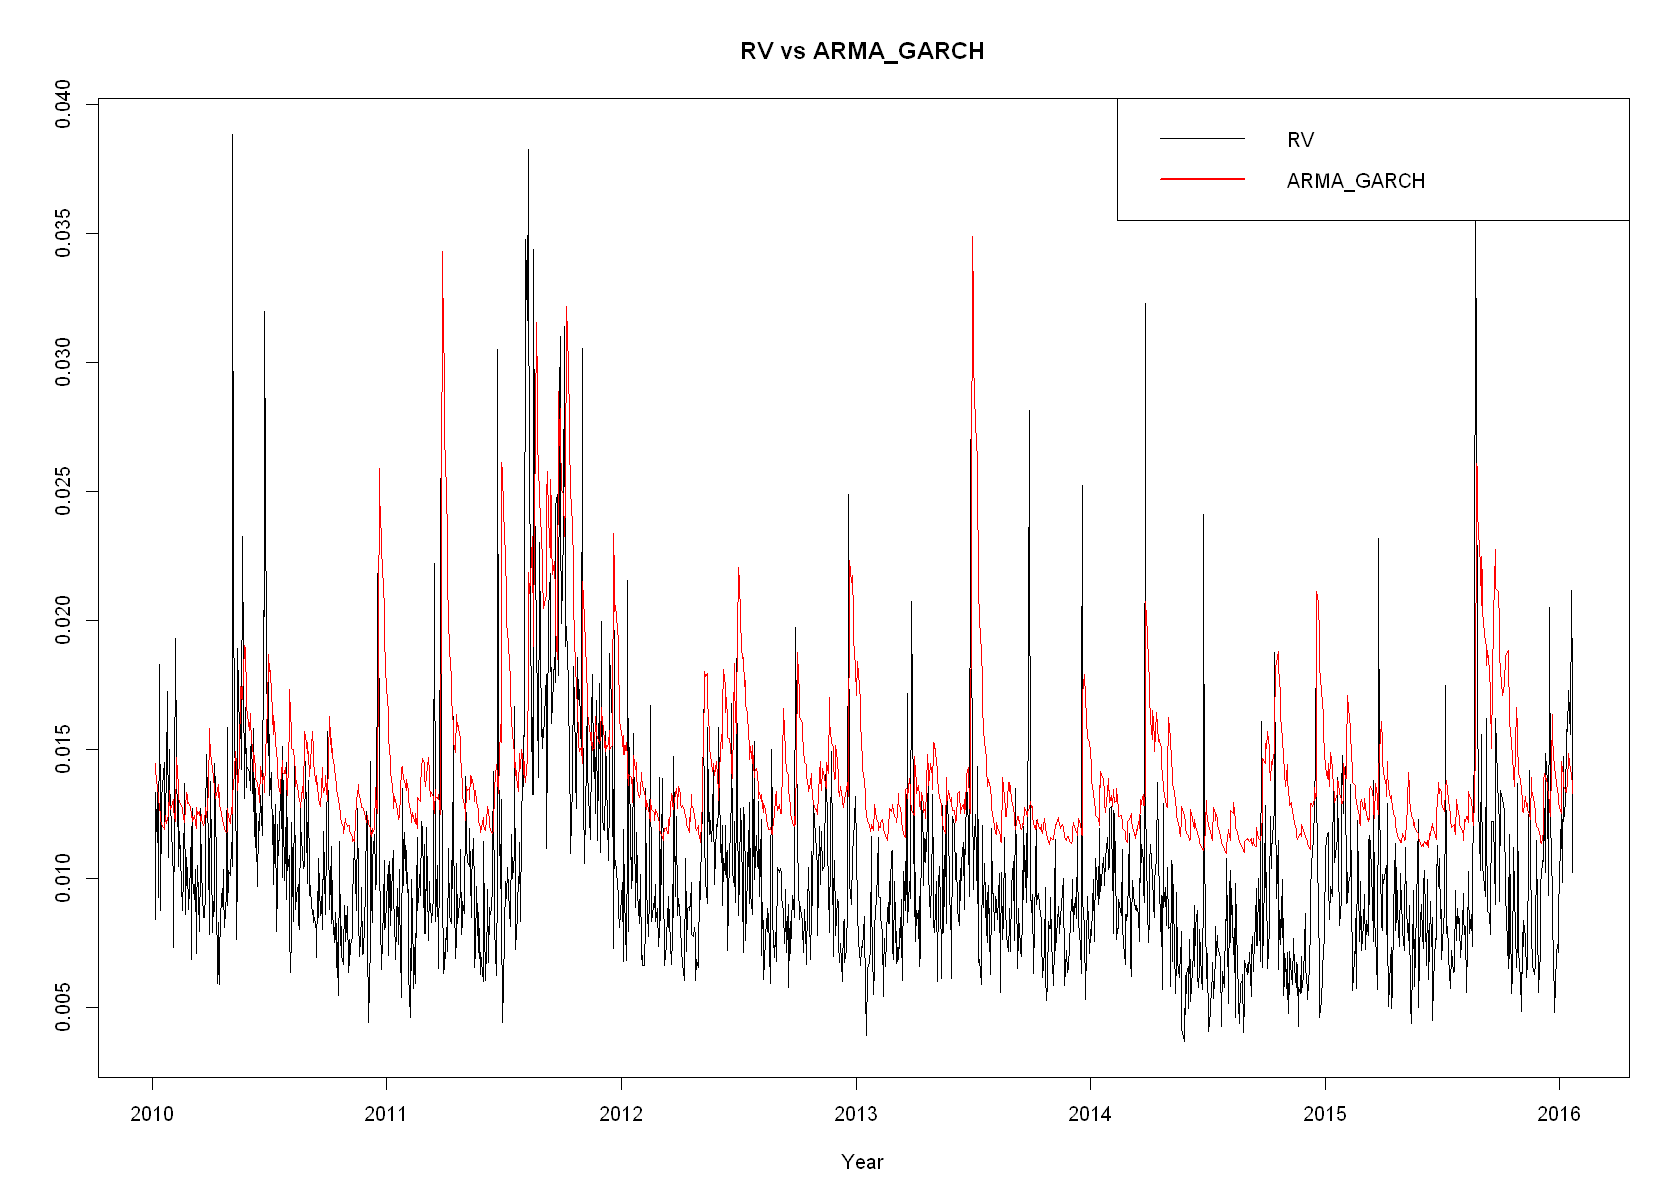

In [49]:
ARMA_GARCH<-xts(garch1@fit$sigma,order.by = index(RV_day))
plot.zoo(RV_day, xlab='Year', ylab=NA,
         main= "RV vs ARMA_GARCH")
lines(zoo(ARMA_GARCH), col = 'red')
# Add legend
legend("topright", legend = c("RV", "ARMA_GARCH"), col = c("black", "red"), lwd = c(1, 2))

### The plot comparing in-sample fits of all models.

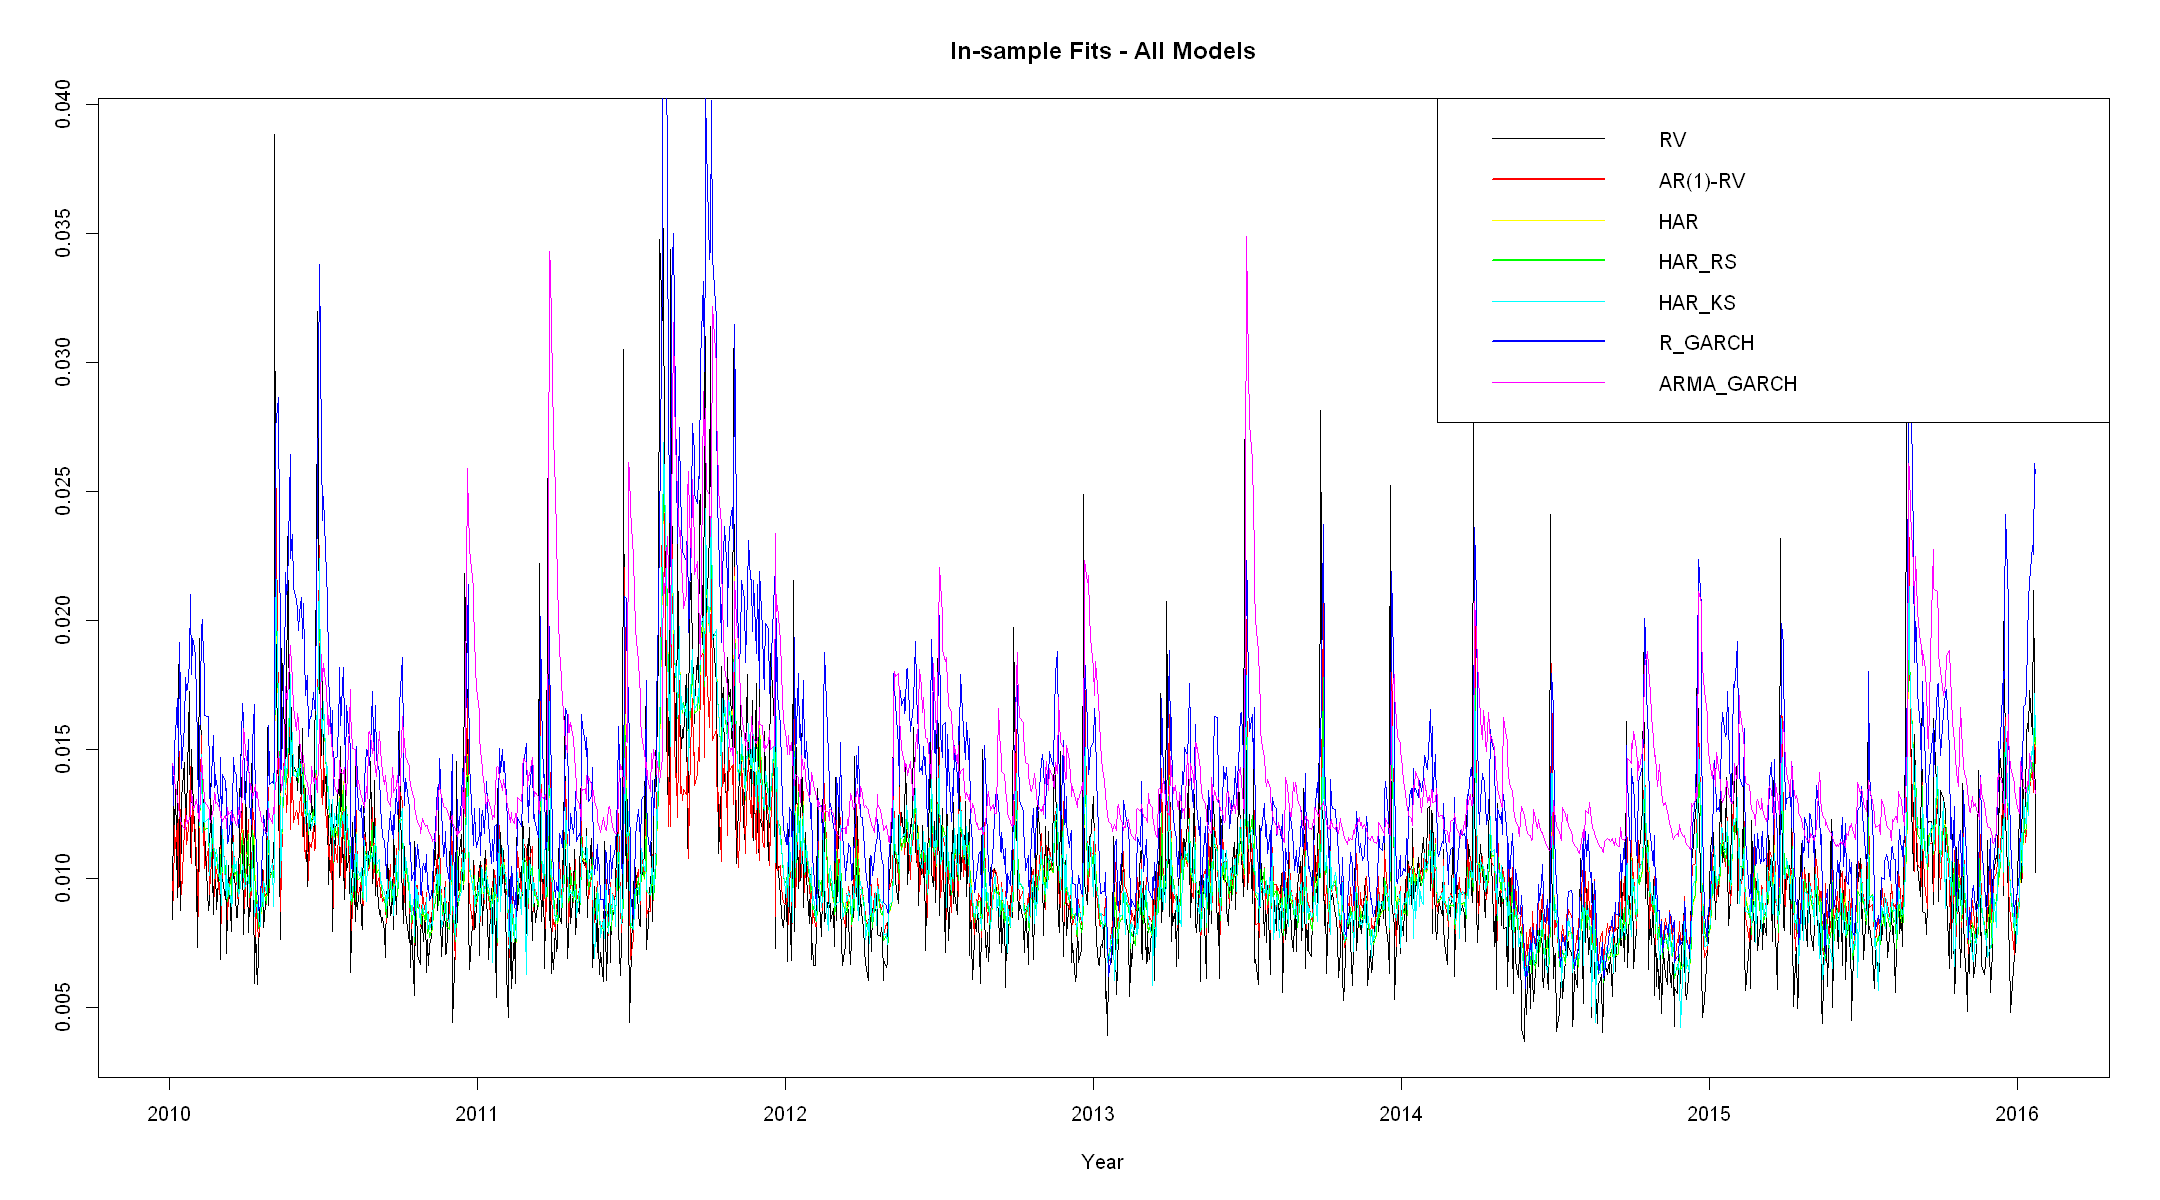

In [50]:
options(repr.plot.width = 18, repr.plot.height = 10)

model_name_list <- c("AR(1)-RV", "HAR", 'HAR_RS', 'HAR_KS','R_GARCH', 'ARMA_GARCH')
fit_list <- list(AR1, HAR, HAR_RS, HAR_KS, R_GARCH, ARMA_GARCH)


plot.zoo(RV_day, xlab='Year', ylab=NA, main= "In-sample Fits - All Models")
for (i in 1:length(fit_list)) {
    lines(zoo(fit_list[[i]]), col = vibrant_colors[i])
}
#Add legend
legend("topright", legend = c("RV", model_name_list), col = c("black", vibrant_colors), lwd = c(1, 2))

options(repr.plot.width = 14, repr.plot.height = 10)

It is difficult to definitively determine the best model based solely on the visual inspection of the plot. All six models appear to capture the general level of volatility in the data. However, there may be some differences in how well each model captures the specific volatility spikes and troughs. But from all the plots above in each sub-section, the worst one is ARMA-GARCH (because it uses returns data and not realized volatility).

# 3. Forecasts
### Compare an out-of-sample forecasting performance of the models from previous part using two forecasting schemes:
### (i) Expanding window, with starting window length of 750.
### (ii) Rolling window, with the window length 750.
### Plot and compare forecast errors from all models, compute loss functions (MSE and MAE), compare model forecasts statistically using the Diebold-Mariano test (use the MSE loss). Evaluate all single model forecasts with the Minzer-Zarnowitz regression.

To perform forecasting with a rolling window length of 750, set the offset parameter w_l to 749.

In [51]:
w_l <- 749
n_for <- nrow(acn) - w_l - 1 # = 750
x <- 1

Use a window length of 750 for in-sample fitting, utilizing the first three years of data from 2010-2012. Then, perform out-of-sample forecasting for the remaining time period and compare the forecasts with the "True" data from the last three years, 2013-2015.

### AR(1)-RV Rolling window

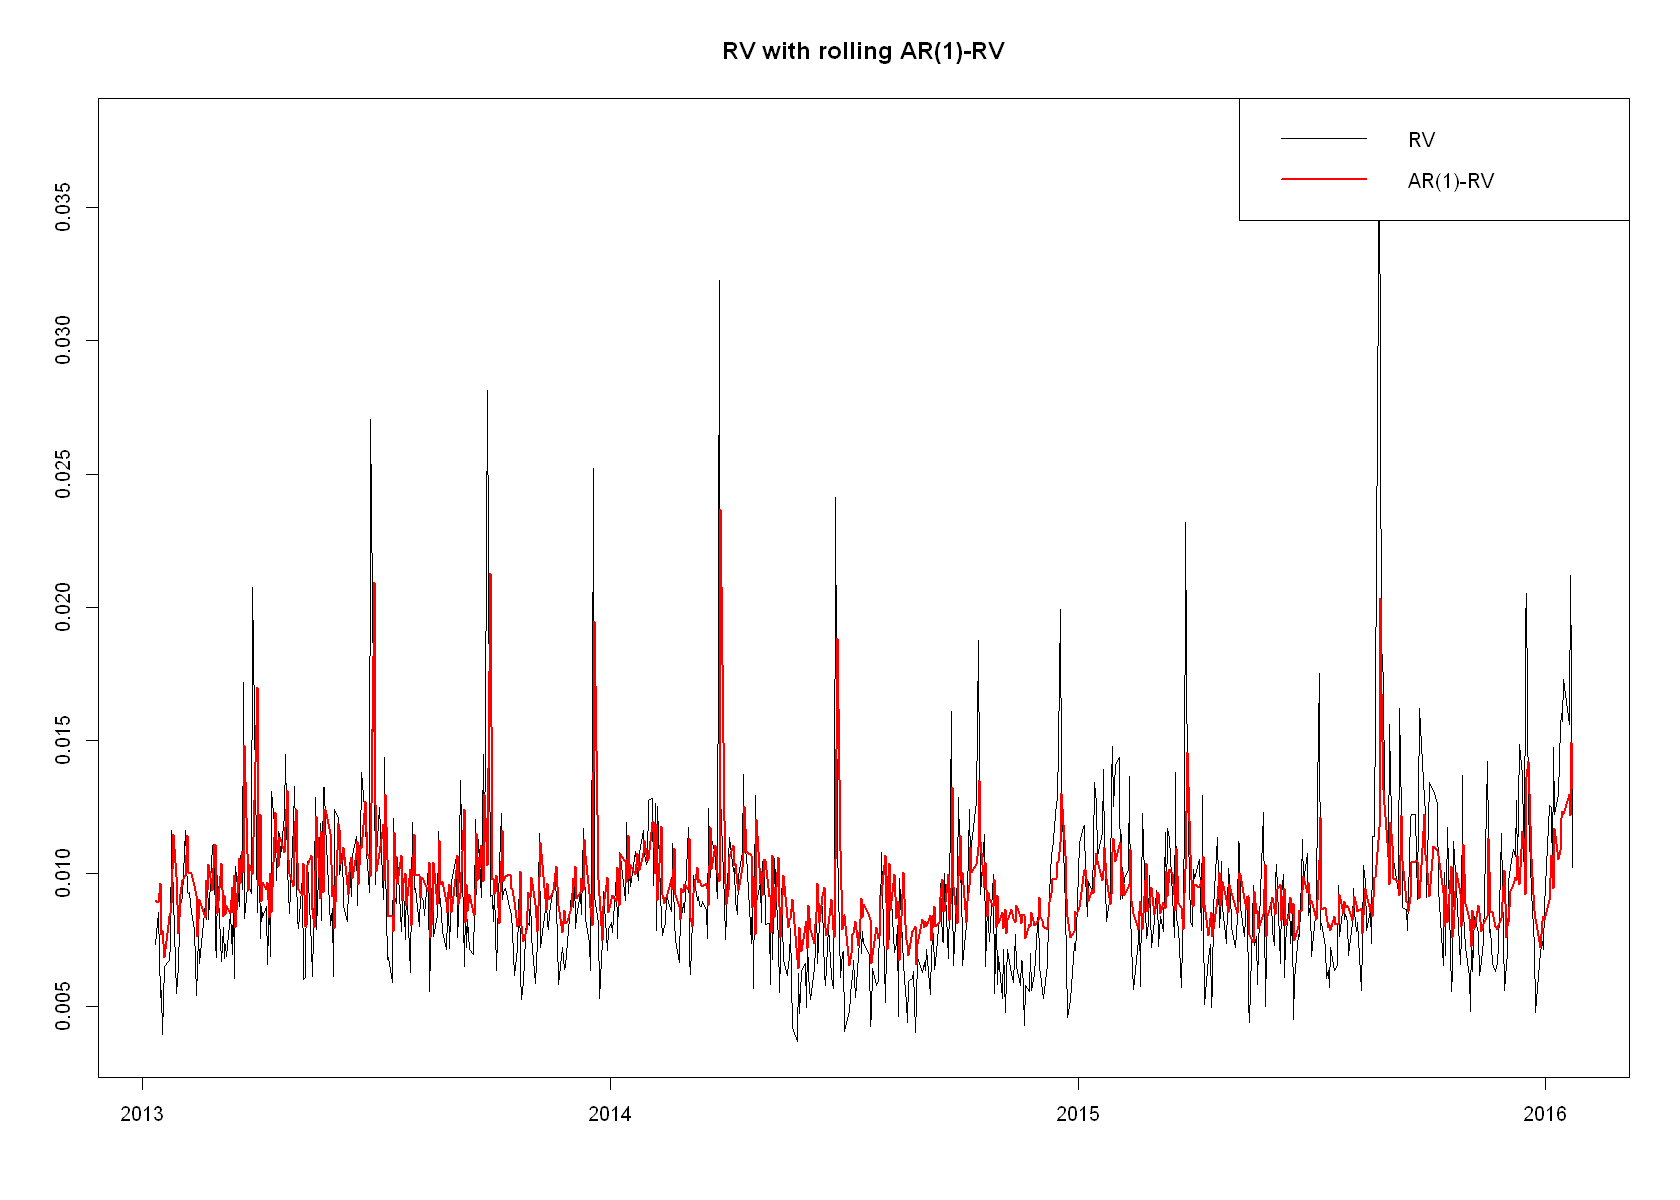

In [52]:
# Rolling AR(1) model
AR1_roll <- lapply(1:n_for, function(x) arima(RV_day[x:(x + w_l)], c(1, 0, 0)))

# Using the arima predict function to forecast
AR1_roll_for <- sapply(1:n_for, function(x) predict(AR1_roll[[x]])$pred)
AR1_roll_for <- xts(AR1_roll_for, order.by = index(RV_day[(w_l + 2):(nrow(acn))]))

# Plotting the results of the rolling AR(1) model
plot.zoo(RV_day[(w_l + 2):(nrow(acn))], xlab=NA, ylab=NA, main="RV with rolling AR(1)-RV")
lines(zoo(AR1_roll_for), col="red", lwd=2)
# Add legend
legend("topright", legend=c("RV", "AR(1)-RV"), col=c("black", "red"), lwd=c(1, 2))

### AR(1)-RV Expanding window

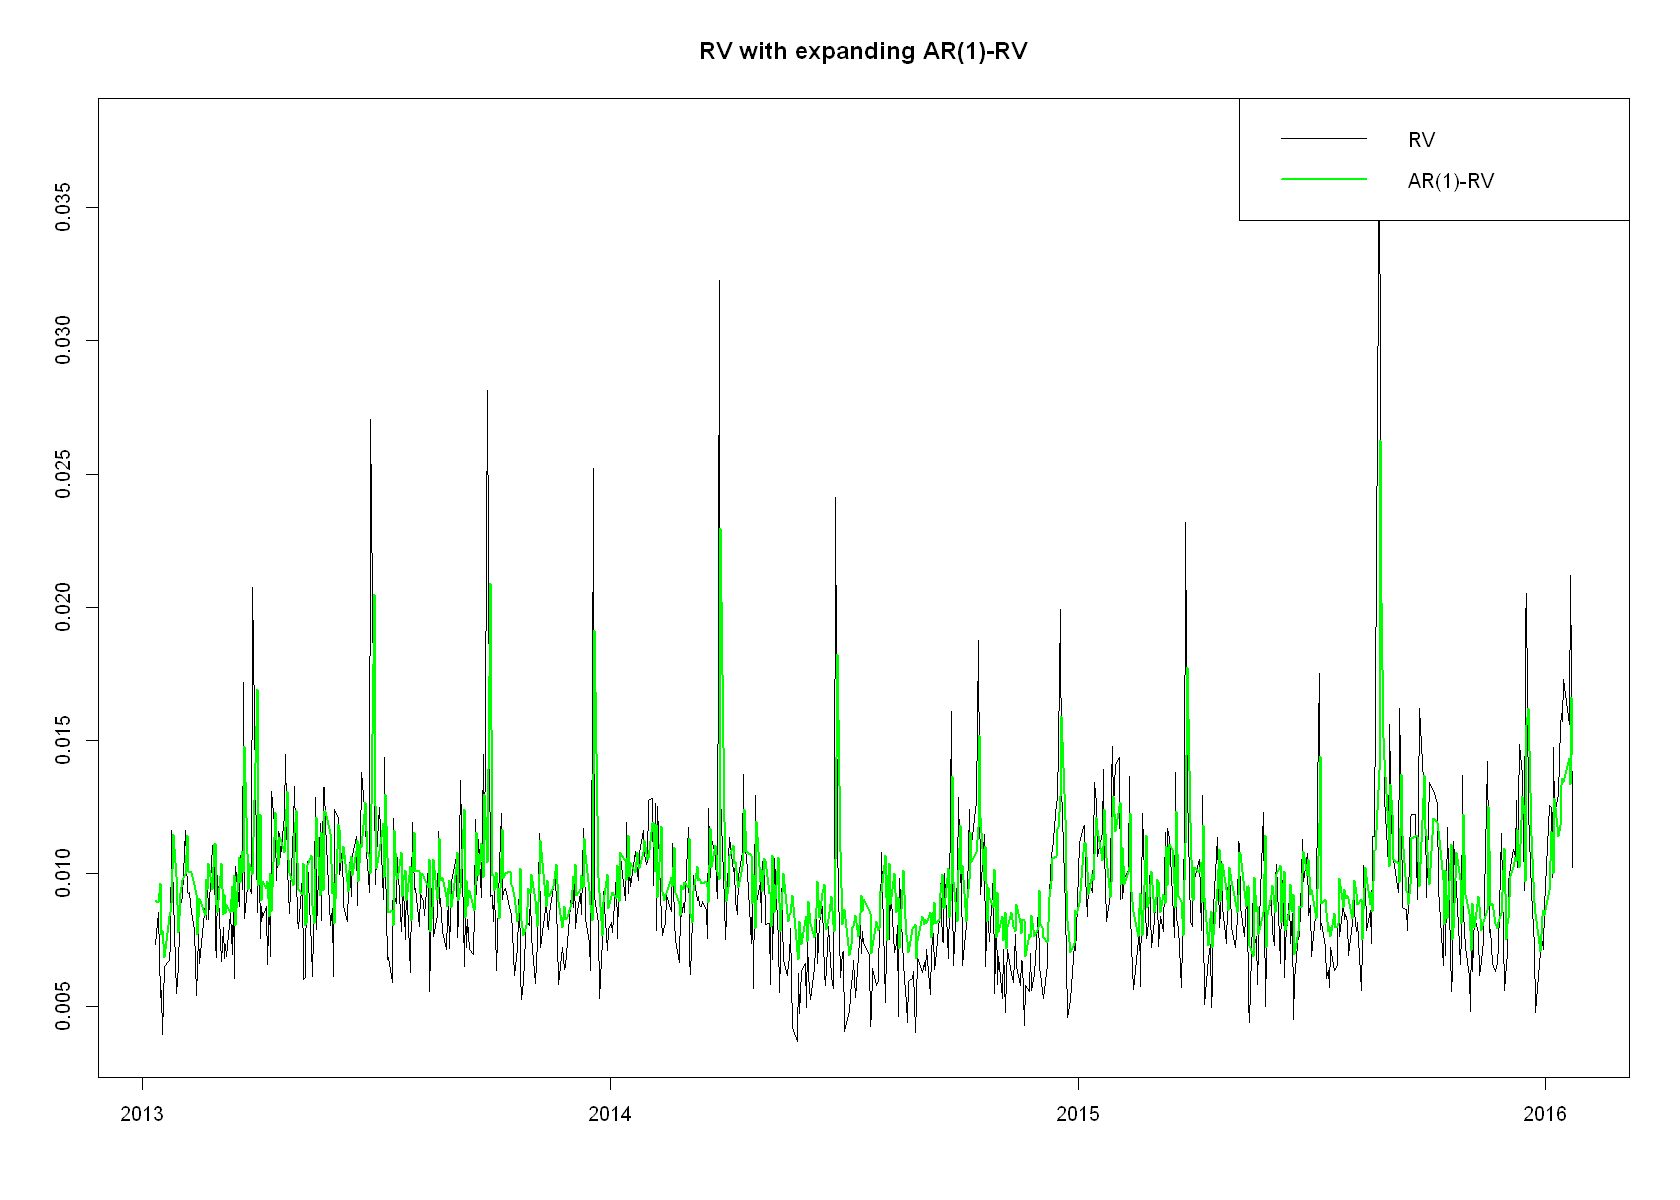

In [53]:
# Expanding AR(1) model
AR1_exp <- lapply(1:n_for, function(x) arima(RV_day[1:(x + w_l)], c(1, 0, 0)))

# Using the ARIMA predict function for forecasting
AR1_exp_for <- sapply(1:n_for, function(x) predict(AR1_exp[[x]])$pred)
AR1_exp_for <- xts(AR1_exp_for, order.by = index(RV_day[(w_l + 2):(nrow(acn))]))

# Plotting the results of the expanding AR(1) model
plot.zoo(RV_day[(w_l + 2):(nrow(acn))], xlab=NA, ylab=NA, main="RV with expanding AR(1)-RV")
lines(zoo(AR1_exp_for), col="green", lwd=2)
# Add legend
legend("topright", legend=c("RV", "AR(1)-RV"), col=c("black", "green"), lwd=c(1, 2))

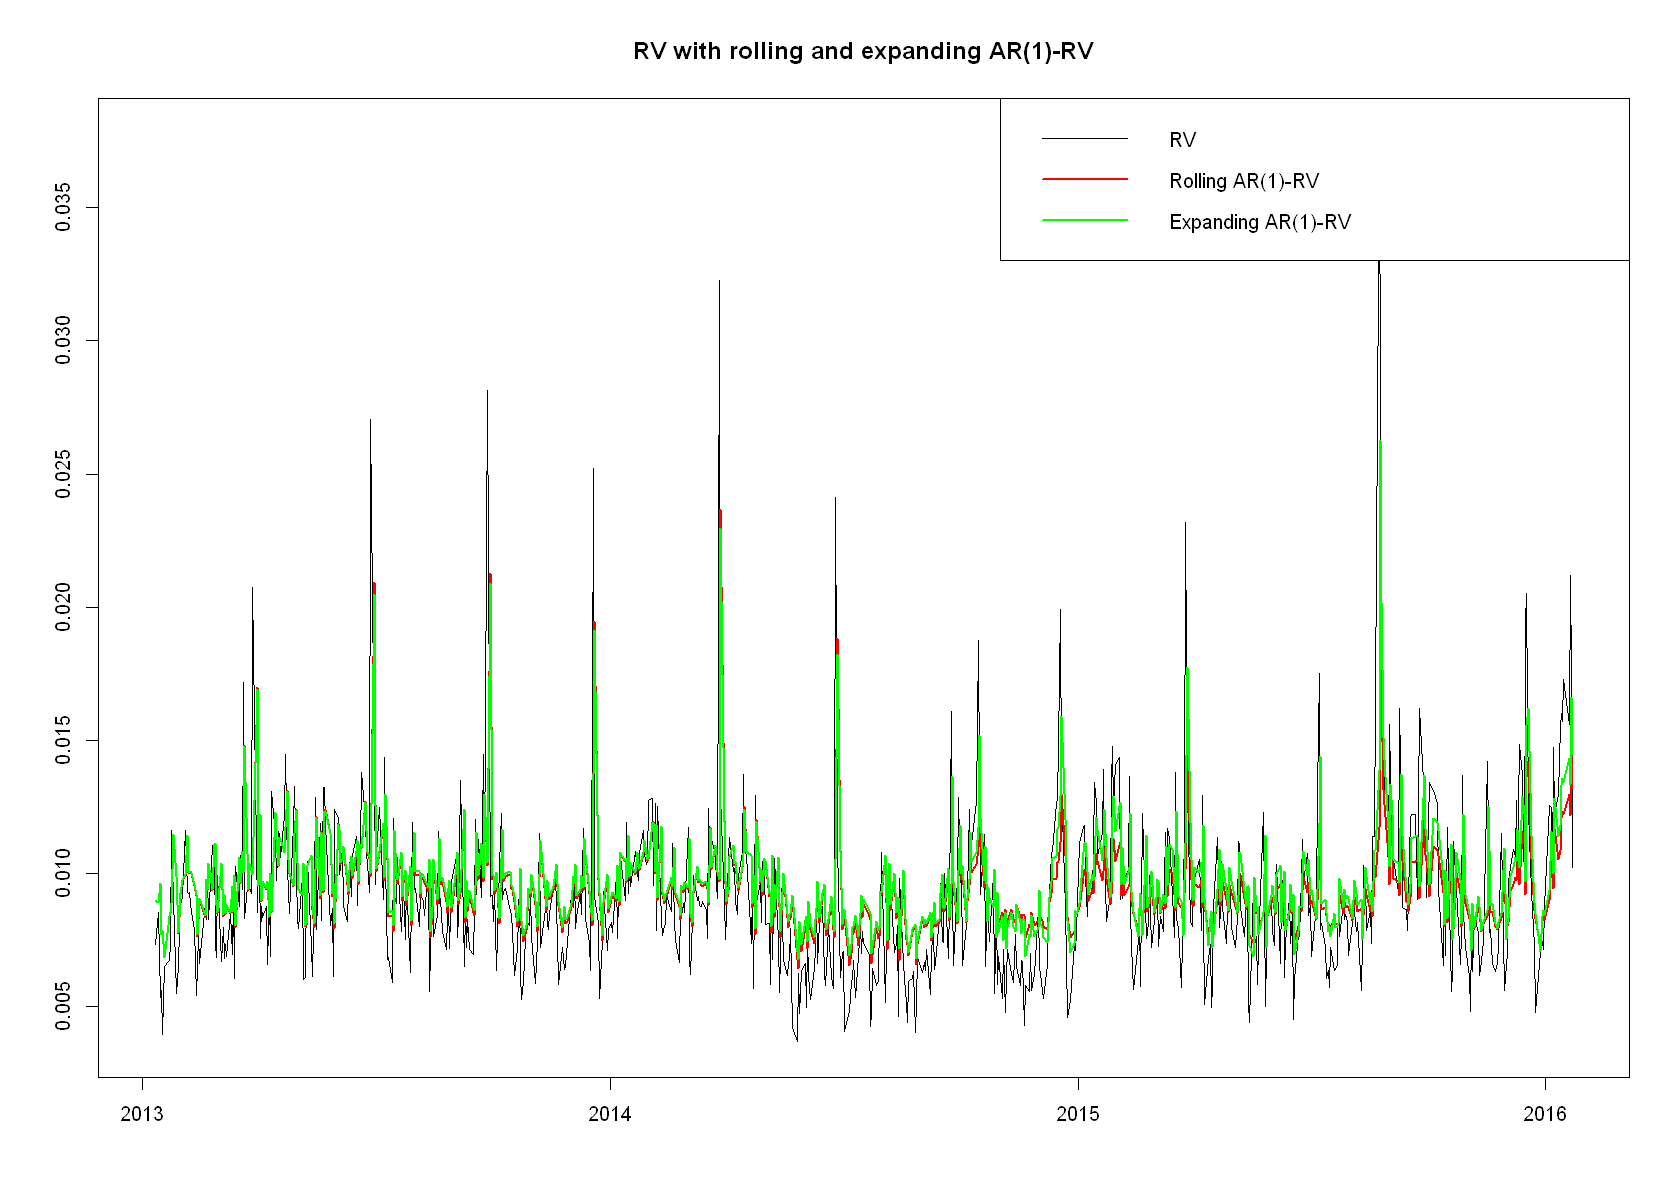

In [54]:
# Plotting the results of both the rolling and expanding AR(1) models
plot.zoo(RV_day[(w_l + 2):(nrow(acn))], xlab=NA, ylab=NA, main="RV with rolling and expanding AR(1)-RV")
lines(zoo(AR1_roll_for), col="red", lwd=2)
lines(zoo(AR1_exp_for), col="green", lwd=2)
# Add legend
legend("topright", legend=c("RV", "Rolling AR(1)-RV", "Expanding AR(1)-RV"), col=c("black", "red", "green"), lwd=c(1, 2, 2))

### HAR Rolling window

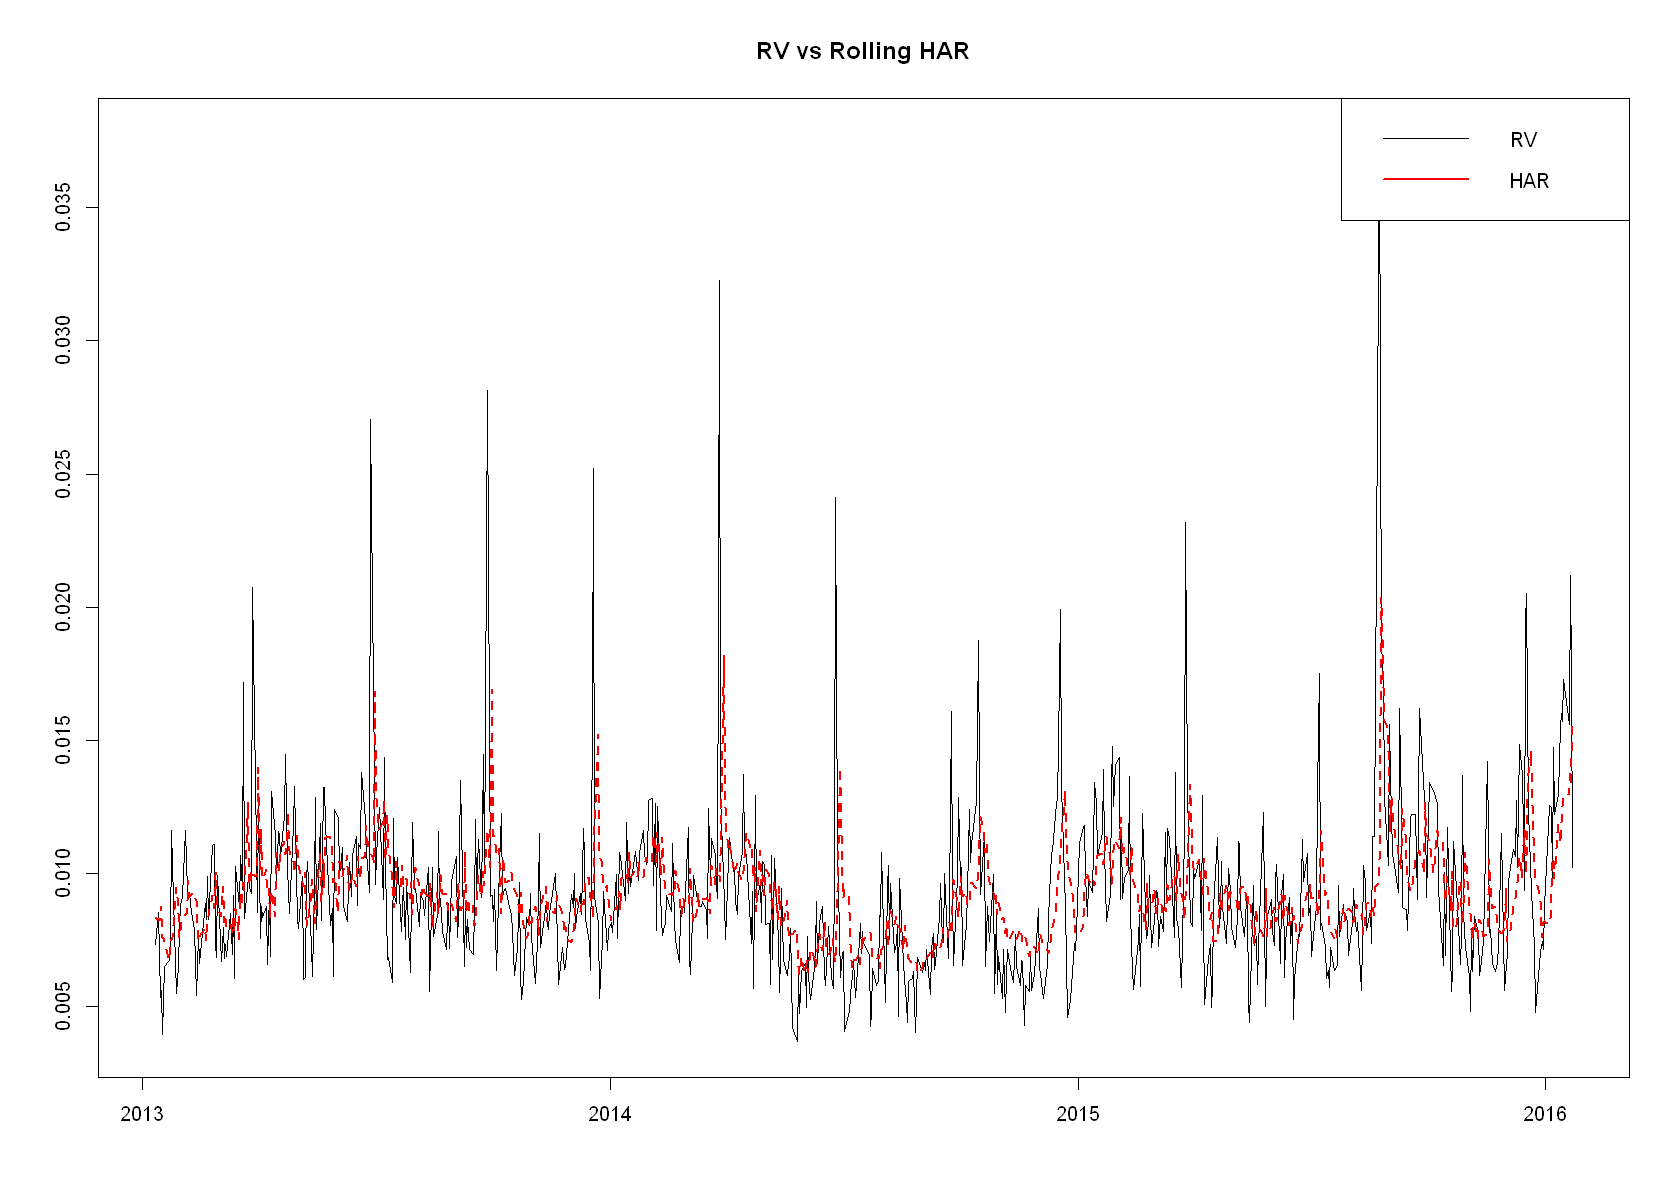

In [55]:
# Rolling HAR model
HAR_roll <- lapply(1:n_for, function(x) HARmodel(data = RV_day[x:(w_l + x)],
    periods = c(1, 5, 22), type = "HAR", h = 1, transform = NULL, inputType = "RM"))

# Forecasting using the rolling HAR model
HAR_roll_for <- sapply(1:n_for, function(x) predict(HAR_roll[[x]]))
HAR_roll_for <- xts(HAR_roll_for, order.by = index(RV_day[(w_l + 2):(nrow(acn))]))

# Plotting the results of the rolling HAR model
plot.zoo(RV_day[(w_l + 2):(nrow(acn))], xlab=NA, ylab=NA, main="RV vs Rolling HAR")
lines(zoo(HAR_roll_for), col="red", lwd=2, lty=2)
# Add legend
legend("topright", legend=c("RV", "HAR"), col=c("black", "red"), lwd=c(1, 2))

### HAR Expanding window

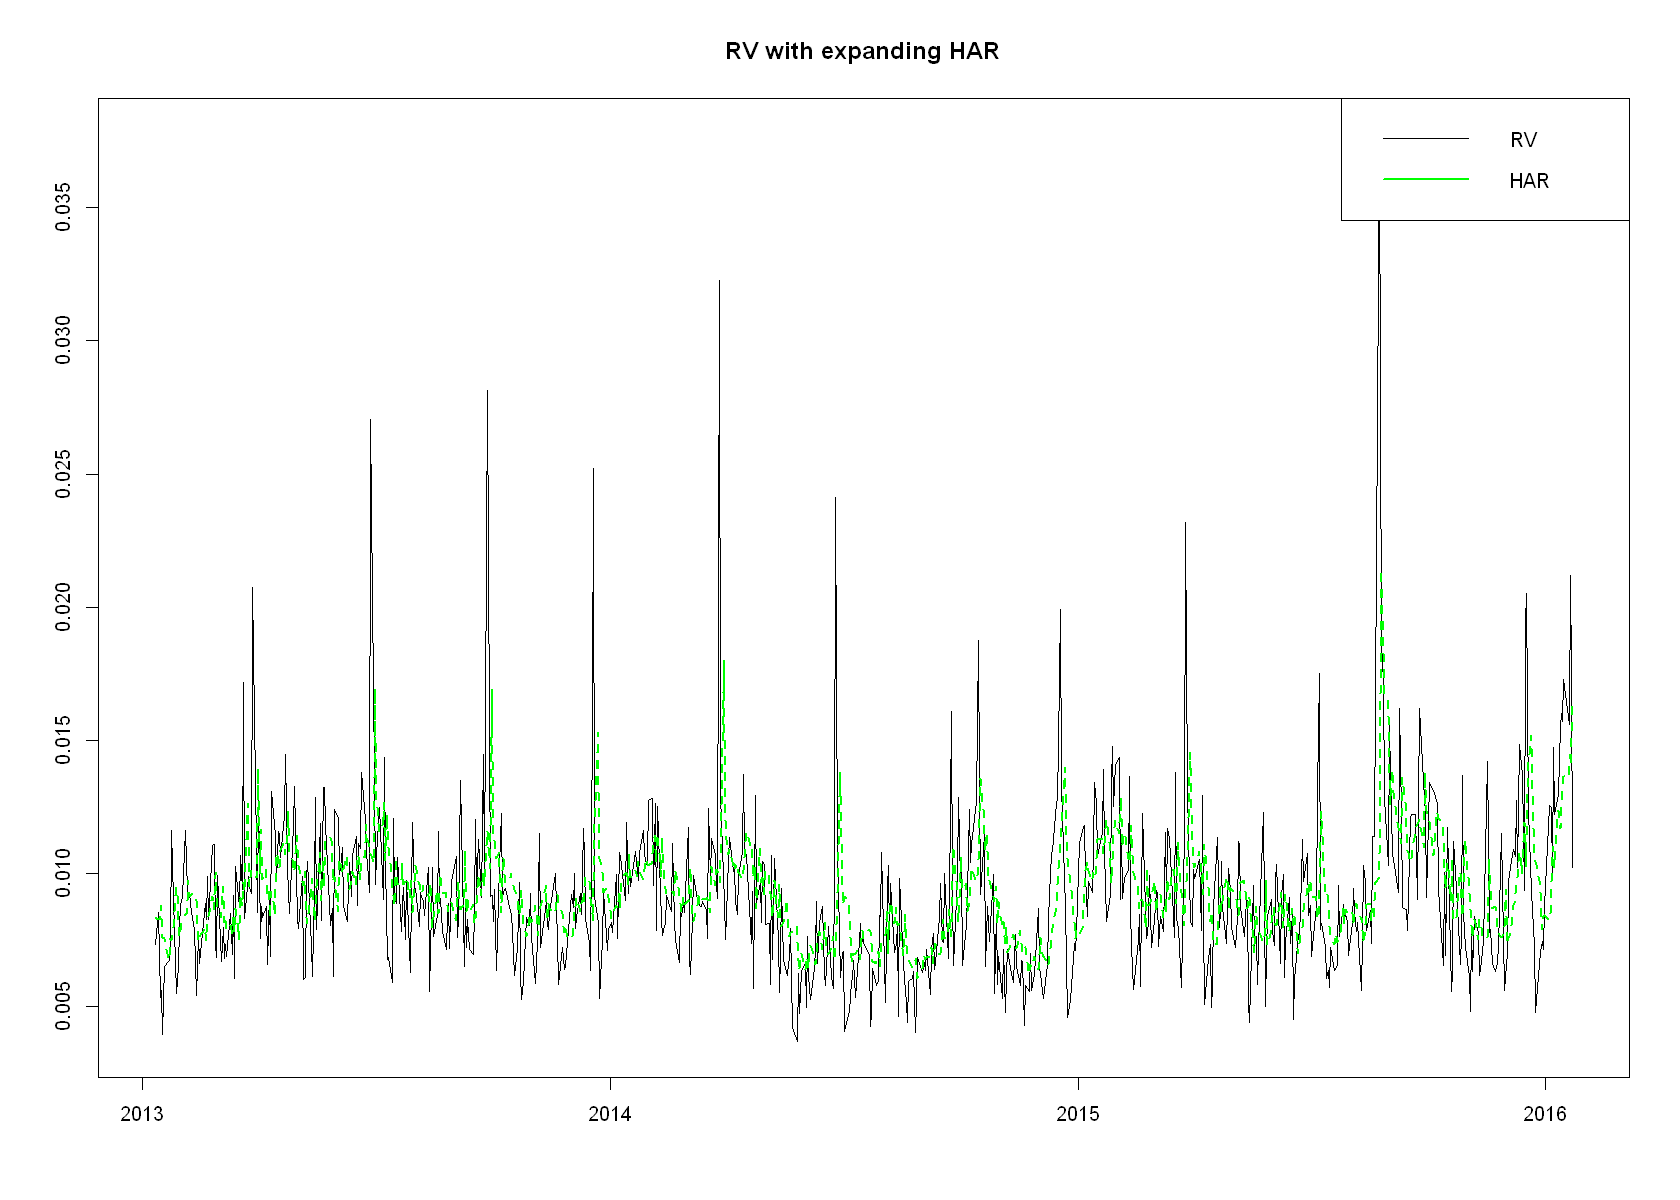

In [56]:
# Expanding HAR model
HAR_exp <- lapply(1:n_for, function(x) HARmodel(data = RV_day[1:(w_l + x)],
    periods = c(1, 5, 22), type = "HAR", h = 1, transform = NULL, inputType = "RM"))

# Forecasting using the expanding HAR model
HAR_exp_for <- sapply(1:n_for, function(x) predict(HAR_exp[[x]]))
HAR_exp_for <- xts(HAR_exp_for, order.by = index(RV_day[(w_l + 2):(nrow(acn))]))

# Plotting the results of the expanding HAR model
plot.zoo(RV_day[(w_l + 2):(nrow(acn))], xlab=NA, ylab=NA, main="RV with expanding HAR")
lines(zoo(HAR_exp_for), col="green", lwd=2, lty=2)
# Add legend
legend("topright", legend=c("RV", "HAR"), col=c("black", "green"), lwd=c(1, 2))

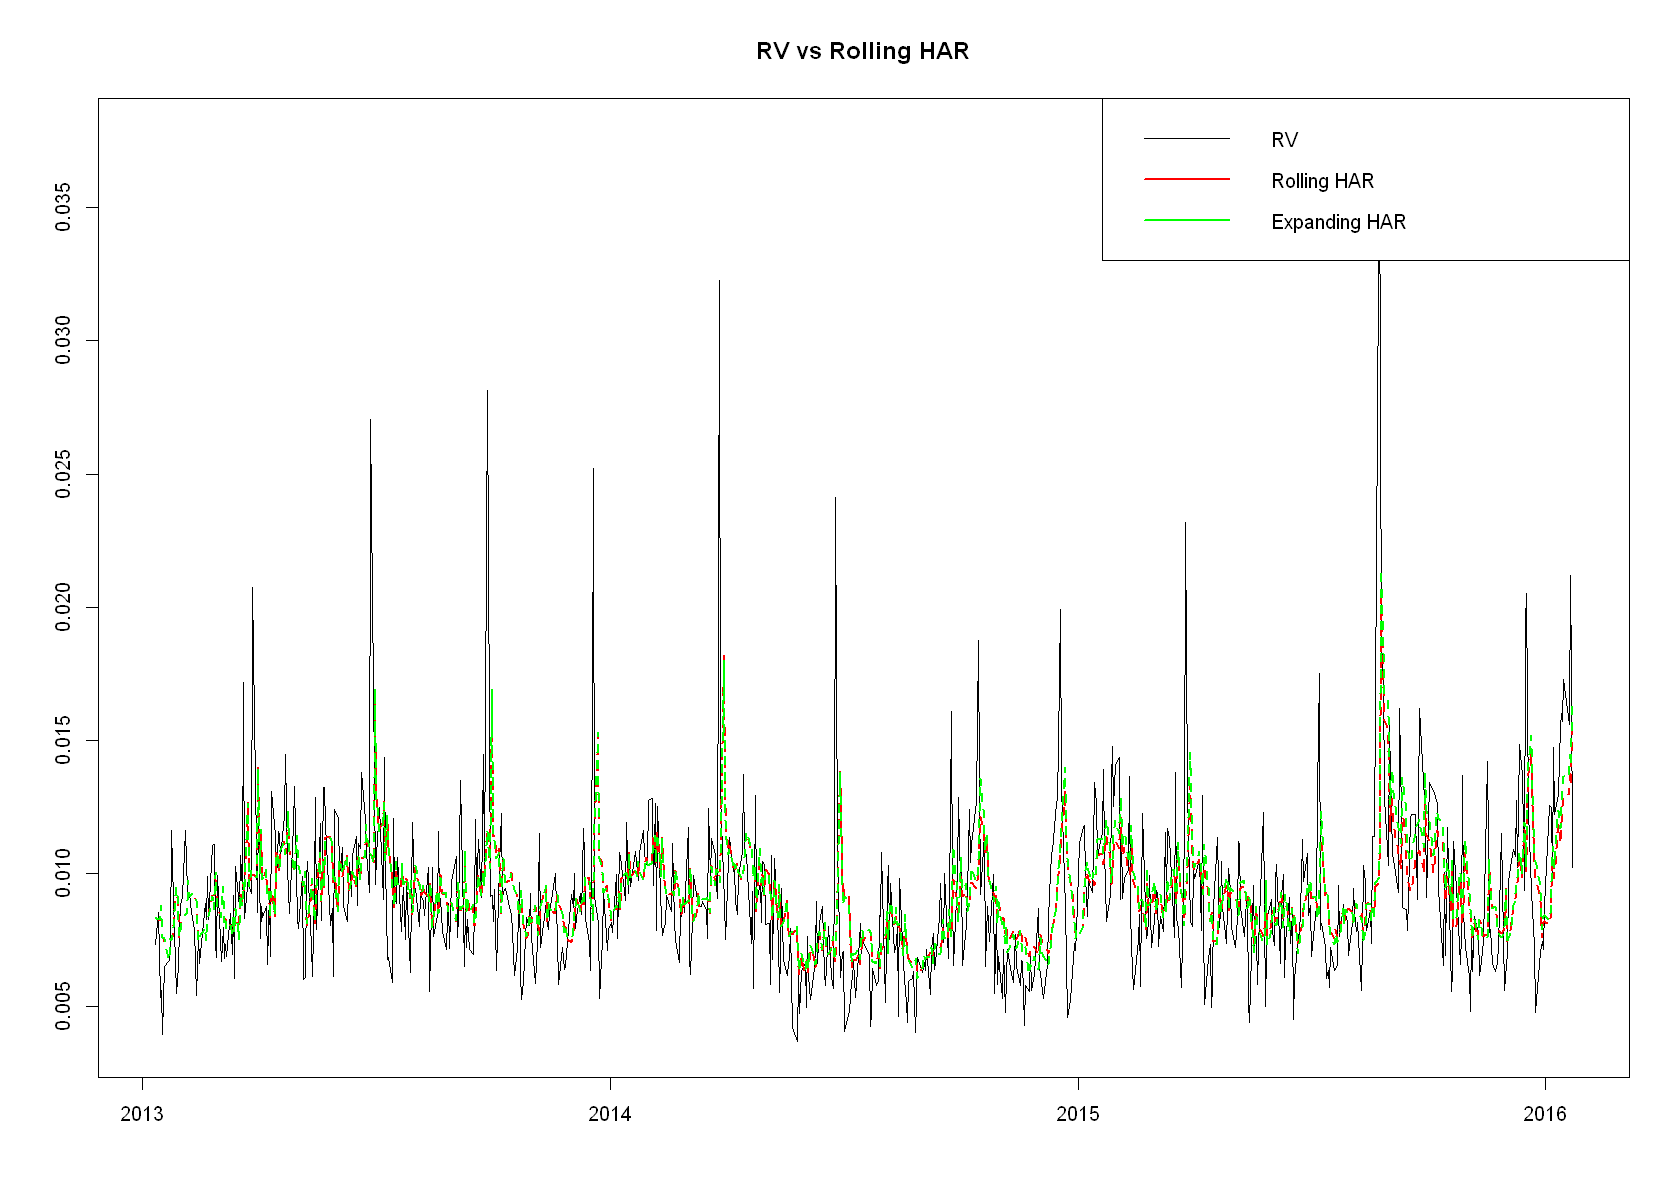

In [57]:
# Plotting the results of both the rolling and expanding HAR models
plot.zoo(RV_day[(w_l + 2):(nrow(acn))], xlab=NA, ylab=NA, main="RV vs Rolling HAR")
lines(zoo(HAR_roll_for), col="red", lwd=2, lty=2)
lines(zoo(HAR_exp_for), col="green", lwd=2, lty=2)
# Add legend
legend("topright", legend=c("RV", "Rolling HAR", "Expanding HAR"), col=c("black", "red", "green"), lwd=c(1, 2, 2))

### HAR-RS Rolling window

In [58]:
# Function that calculates the one-step ahead forecast for the HAR_RS model

# Input parameters:
# x: the rolling window position
# exp: flag indicating whether the window is rolling or expanding, default is expanding
# Returns a one-step ahead forecast of RV

forecast_HAR_RS <- function(x, exp = 1) {
    # Ensure that indices are within the valid range
    start_dep <- max(exp + 22, 1)
    end_dep <- min(x + w_l, length(RV_day))

    if (start_dep > end_dep) {
        stop("Invalid index range for dependent variable.")
    }

    # Define dependent and independent variables for the regression
    dep <- as.numeric(RV_day[start_dep:end_dep])
    ind_p <- as.numeric(RV_p[(start_dep - 1):(end_dep - 1)])
    ind_n <- as.numeric(RV_n[(start_dep - 1):(end_dep - 1)])
    ind_5 <- as.numeric(RV5[(start_dep - 5):(end_dep - 5)])
    ind_22 <- as.numeric(RV22[(start_dep - 22):(end_dep - 22)])

    # Perform linear regression for HAR_RS model fitting
    HAR_RS_fit <- lm(dep ~ ind_p + ind_n + ind_5 + ind_22)

    # Use the last day sample data for out-of-sample forecasting
    ind_p <- as.numeric(RV_p[min(end_dep, length(RV_p))])
    ind_n <- as.numeric(RV_n[min(end_dep, length(RV_n))])
    ind_5 <- as.numeric(RV5[max(min(end_dep, length(RV5)) - 4, 1)])
    ind_22 <- as.numeric(RV22[max(min(end_dep, length(RV22)) - 21, 1)])

    new <- data.frame(ind_p, ind_n, ind_5, ind_22)
    return(predict(HAR_RS_fit, new))
}

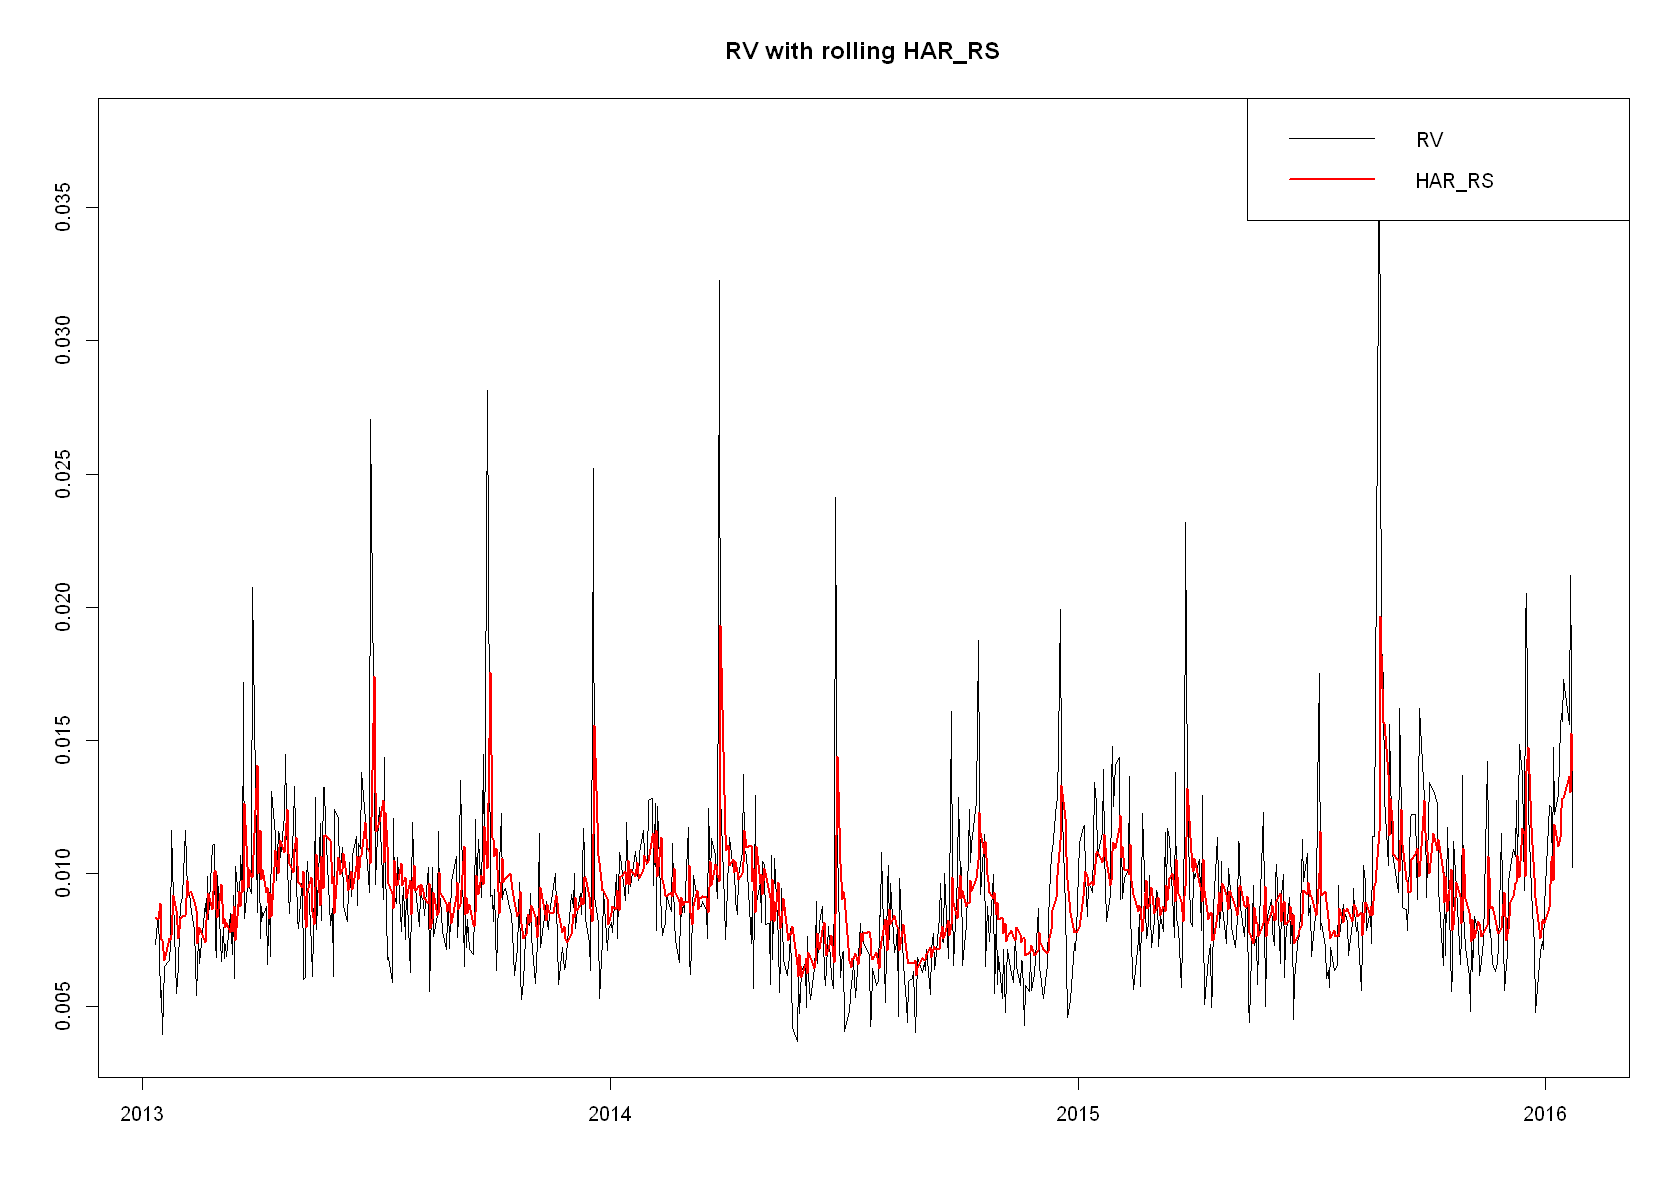

In [59]:
# Perform out-of-sample forecasting for HAR_RS model with rolling window
HAR_RS_roll_for <- sapply(1:n_for, function(x) forecast_HAR_RS(x, x))

# Create an xts object for the rolling HAR_RS forecast
HAR_RS_roll_for <- xts(HAR_RS_roll_for, order.by = index(RV_day[(w_l + 2):(nrow(acn))]))


# Plot RV vs rolling HAR_RS
plot.zoo(RV_day[(w_l + 2):(nrow(acn))], xlab = NA, ylab = NA,  main = "RV with rolling HAR_RS")
lines(zoo(HAR_RS_roll_for), col = "red", lwd = 2)
# Add legend
legend("topright", legend = c("RV", "HAR_RS"), col = c("black", "red"), lwd = c(1, 2))

### HAR-RS Expanding window

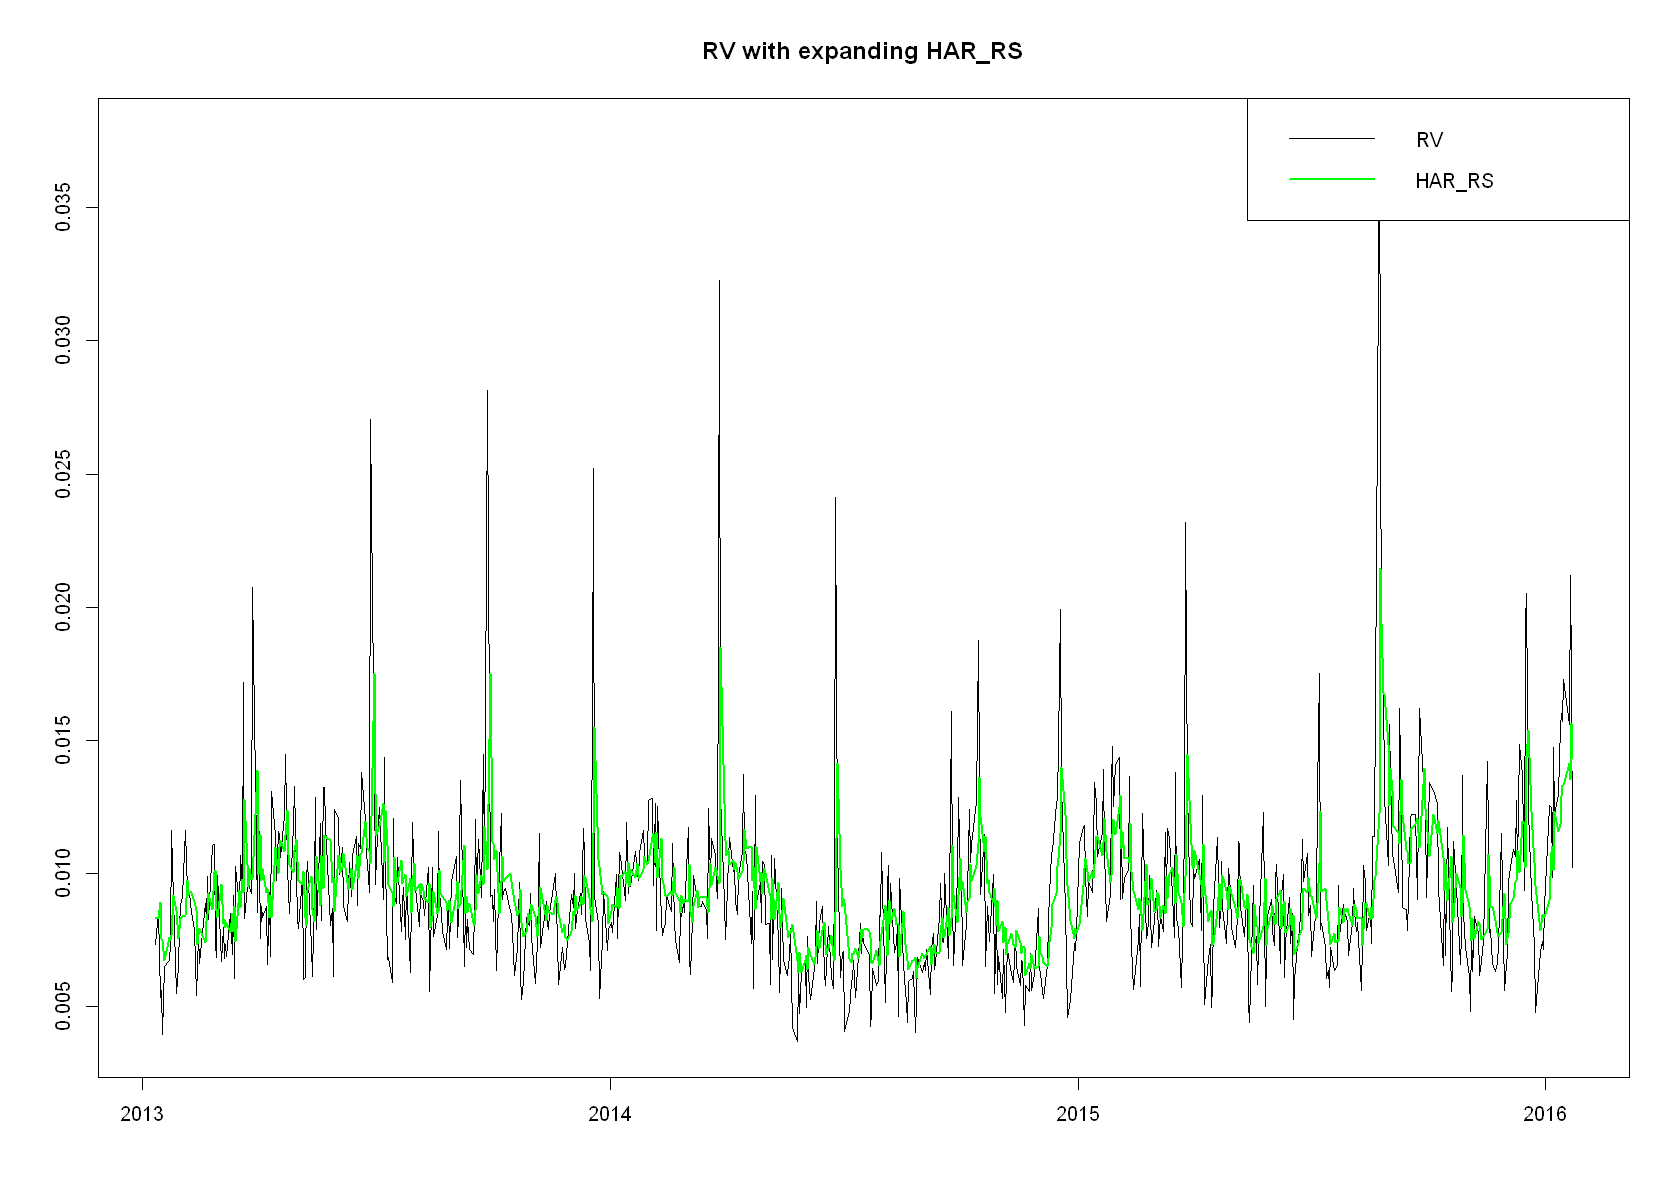

In [60]:
# Perform out-of-sample forecasting for HAR_RS model with expanding window
HAR_RS_exp_for <- sapply(1:n_for, function(x) forecast_HAR_RS(x))

# Create an xts object for the expanding HAR_RS forecast
HAR_RS_exp_for <- xts(HAR_RS_exp_for, order.by = index(RV_day[(w_l + 2):(nrow(acn))]))

# Plot RV vs expanding HAR_RS
plot.zoo(RV_day[(w_l + 2):(nrow(acn))], xlab = NA, ylab = NA, main = "RV with expanding HAR_RS")
lines(zoo(HAR_RS_exp_for), col = "green", lwd = 2)
# Add legend
legend("topright", legend = c("RV", "HAR_RS"), col = c("black", "green"), lwd = c(1, 2))

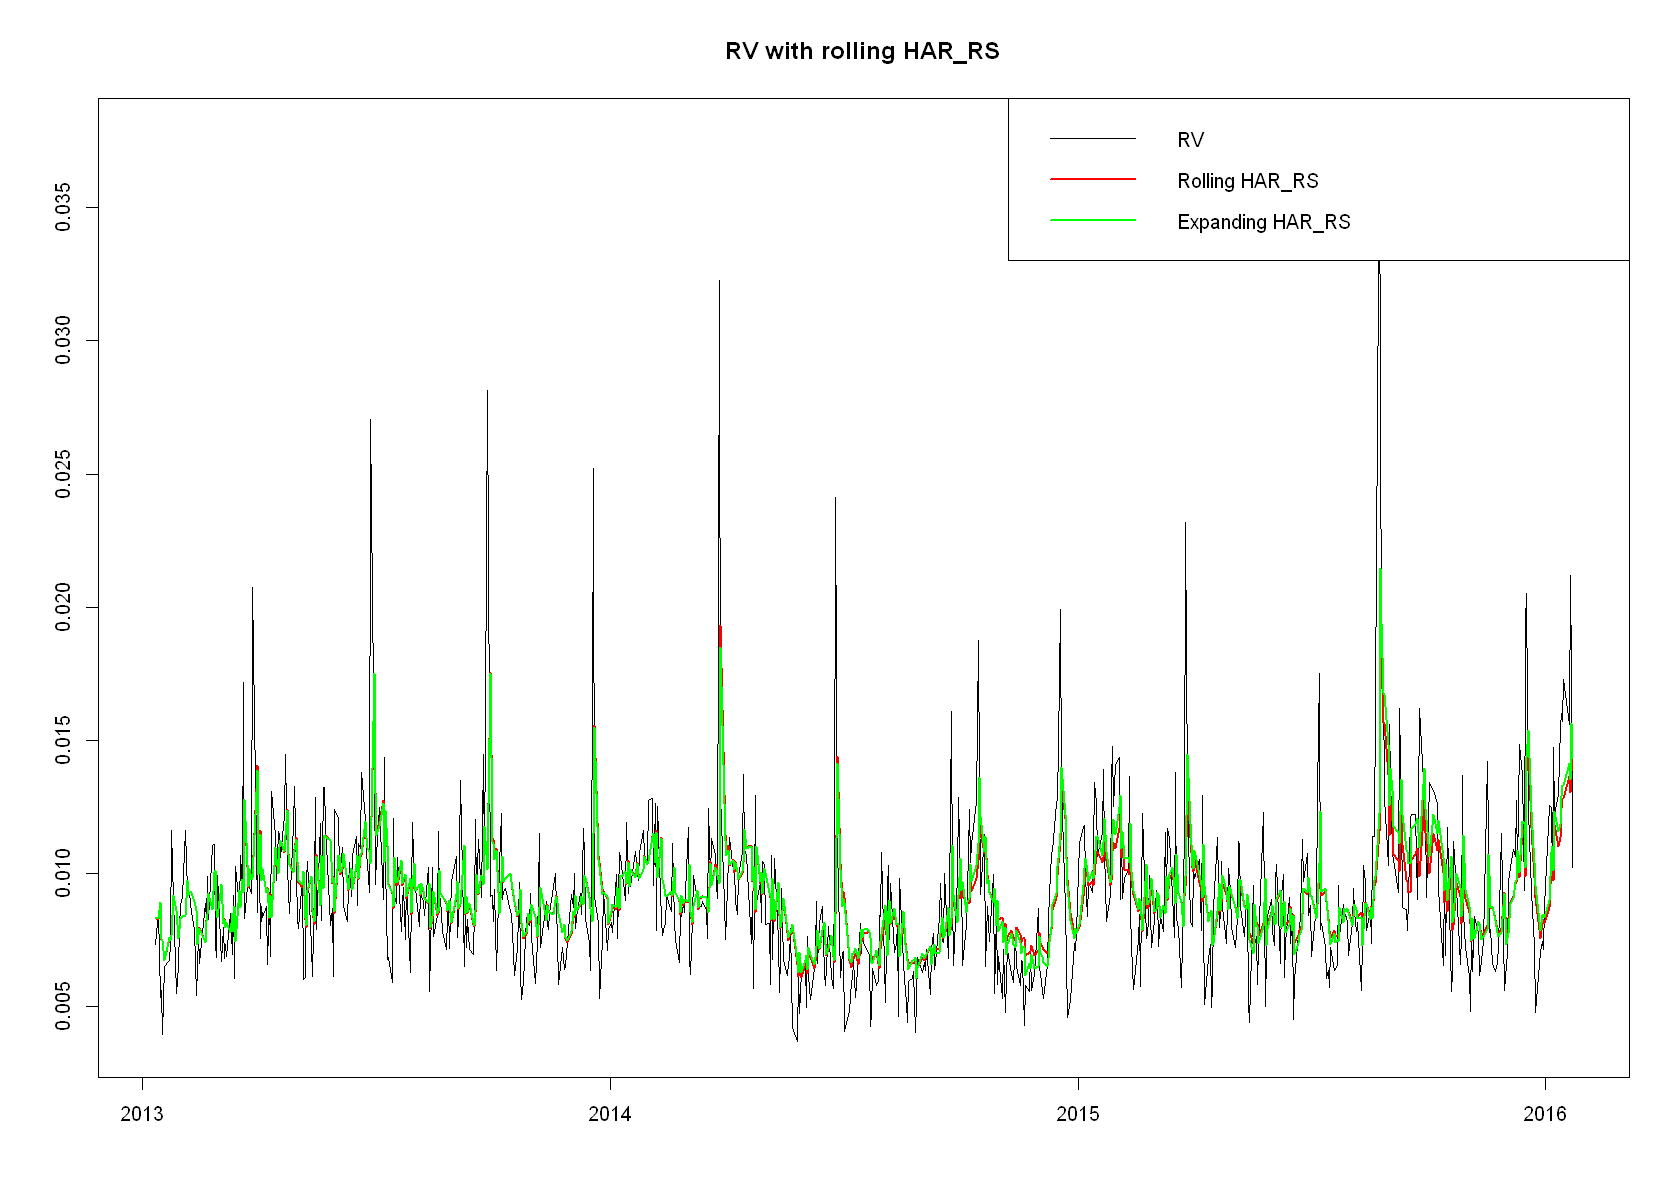

In [61]:
# Plot RV vs rolling and expanding HAR_RS
plot.zoo(RV_day[(w_l + 2):(nrow(acn))], xlab = NA, ylab = NA,  main = "RV with rolling HAR_RS")
lines(zoo(HAR_RS_roll_for), col = "red", lwd = 2)
lines(zoo(HAR_RS_exp_for), col = "green", lwd = 2)
# Add legend
legend("topright", legend = c("RV", "Rolling HAR_RS", "Expanding HAR_RS"), col = c("black", "red", "green"), lwd = c(1, 2, 2))

### HAR-Rskew-RKurt Rolling window

In [62]:
# Function that calculates the one-step ahead forecast for the HAR-Rskew-RKurt model

# Input parameters: x is rolling window postion
# exp is the flag of rolling or expanding window, default is expanding
# return n.ahead=1 forecast RV
forecast_HAR_KS <- function (x, exp = 1) {

    dep <- as.numeric(RV_day[(exp+22):(x+w_l)])
    ind_1 <- as.numeric(RV_day[(exp+22-1):(x+w_l-1)])
    ind_5 <- as.numeric(RV5[(exp+22-5):(x+w_l-5)])
    ind_22 <- as.numeric(RV22[exp:(x+w_l-22)])
    ind_rk <- as.numeric(RV_RK[(exp+22-1):(x+w_l-1)])
    ind_rs <- as.numeric(RV_RS[(exp+22-1):(x+w_l-1)])

    # use lm() regression for HAR_KS fit

    HAR_RS_fit <- lm(dep ~ ind_1 + ind_5 + ind_22 + ind_rk + ind_rs)

    # use the last day sample data for out-of-sample forecasting
    ind_1 <- as.numeric(RV_p[x+w_l])
    ind_5 <- as.numeric(RV5[x+w_l-4])
    ind_22 <- as.numeric(RV22[x+w_l-21])
    ind_rk <- as.numeric(RV_n[x+w_l])
    ind_rs <- as.numeric(RV_n[x+w_l])
    new <- data.frame(ind_1, ind_5, ind_22,
            ind_rk, ind_rs)

    return(predict(HAR_RS_fit, new))
}

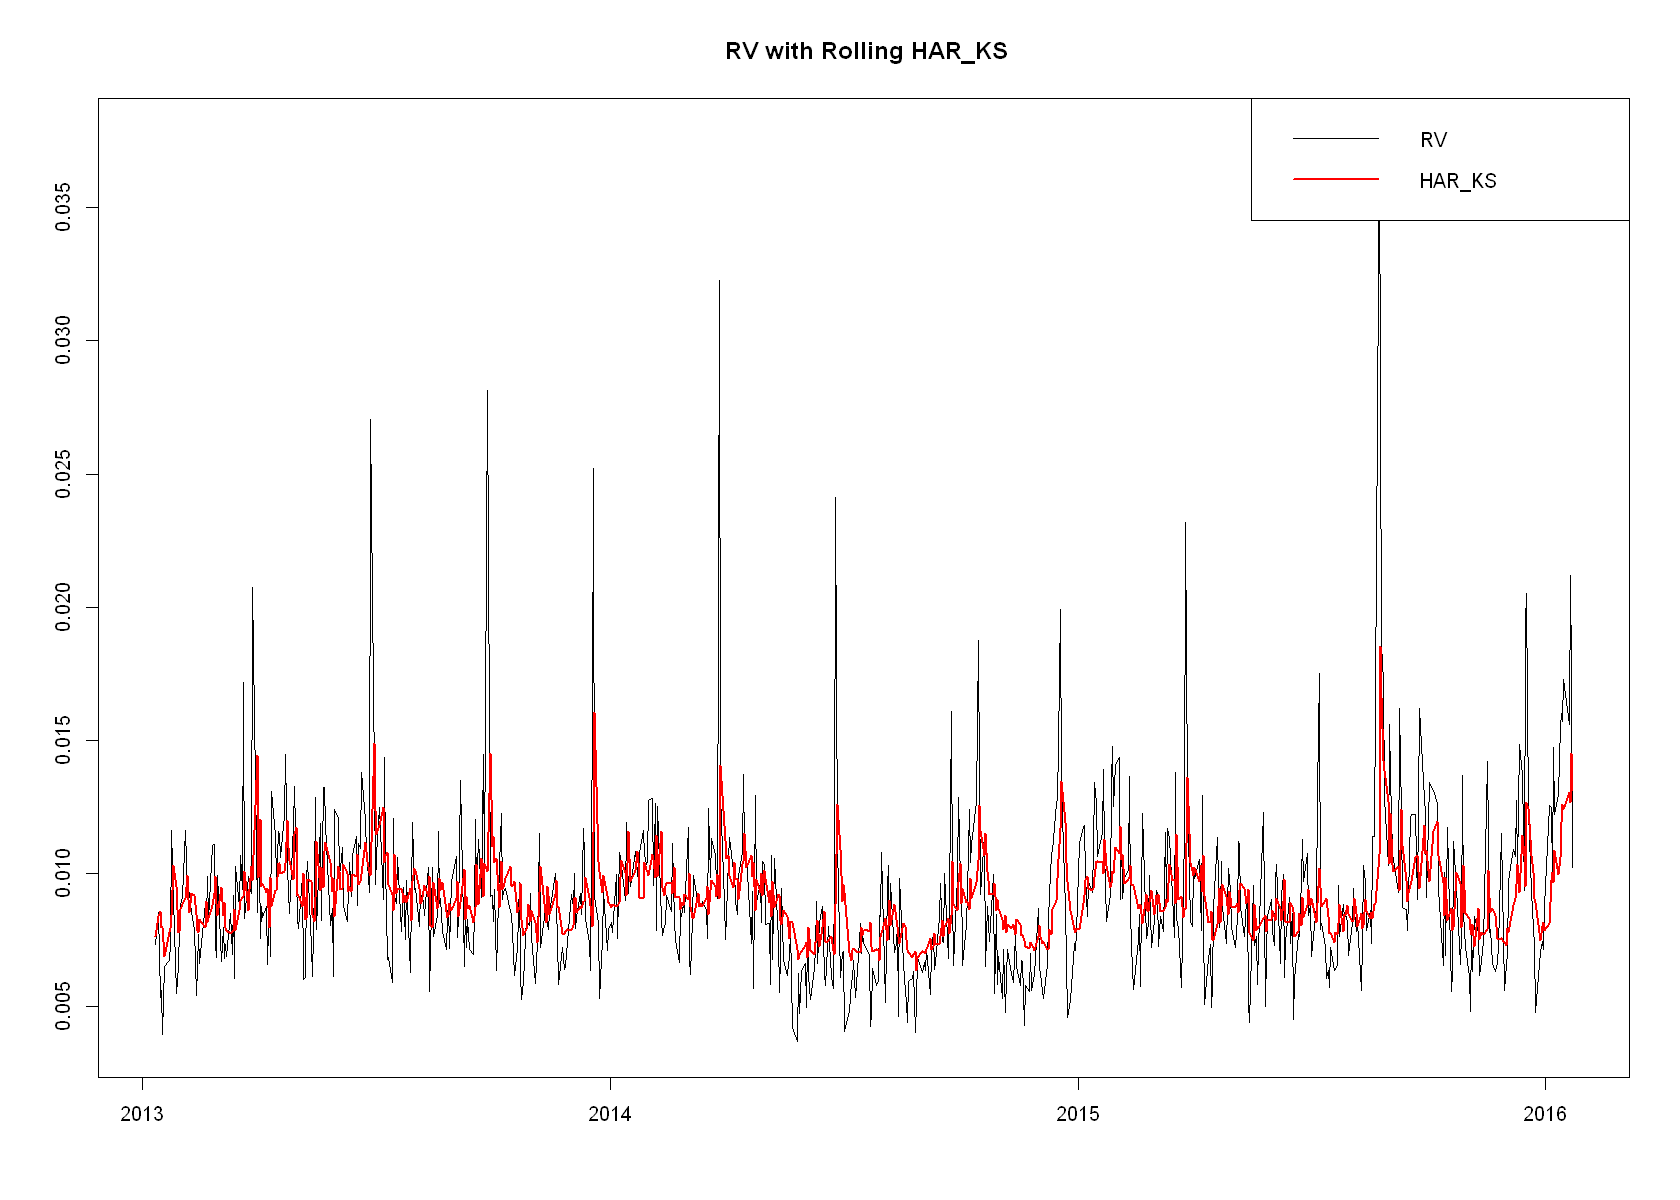

In [63]:
# Forecasting using rolling window for HAR_KS model
HAR_KS_roll_for <- sapply(1:n_for, function(x) forecast_HAR_KS(x, x))

# Convert forecast results to xts object
HAR_KS_roll_for <- xts(HAR_KS_roll_for, order.by = index(RV_day[(w_l+2):(nrow(acn))]))

# Plotting RV vs rolling HAR_KS
plot.zoo(RV_day[(w_l+2):(nrow(acn))], xlab = NA, ylab = NA, main = " RV with Rolling HAR_KS")
lines(zoo(HAR_KS_roll_for), col = "red", lwd = 2)
# Add legend
legend("topright", legend = c("RV", "HAR_KS"), col = c("black", "red"), lwd = c(1, 2))

### HAR-Rskew-RKurt Expanding window

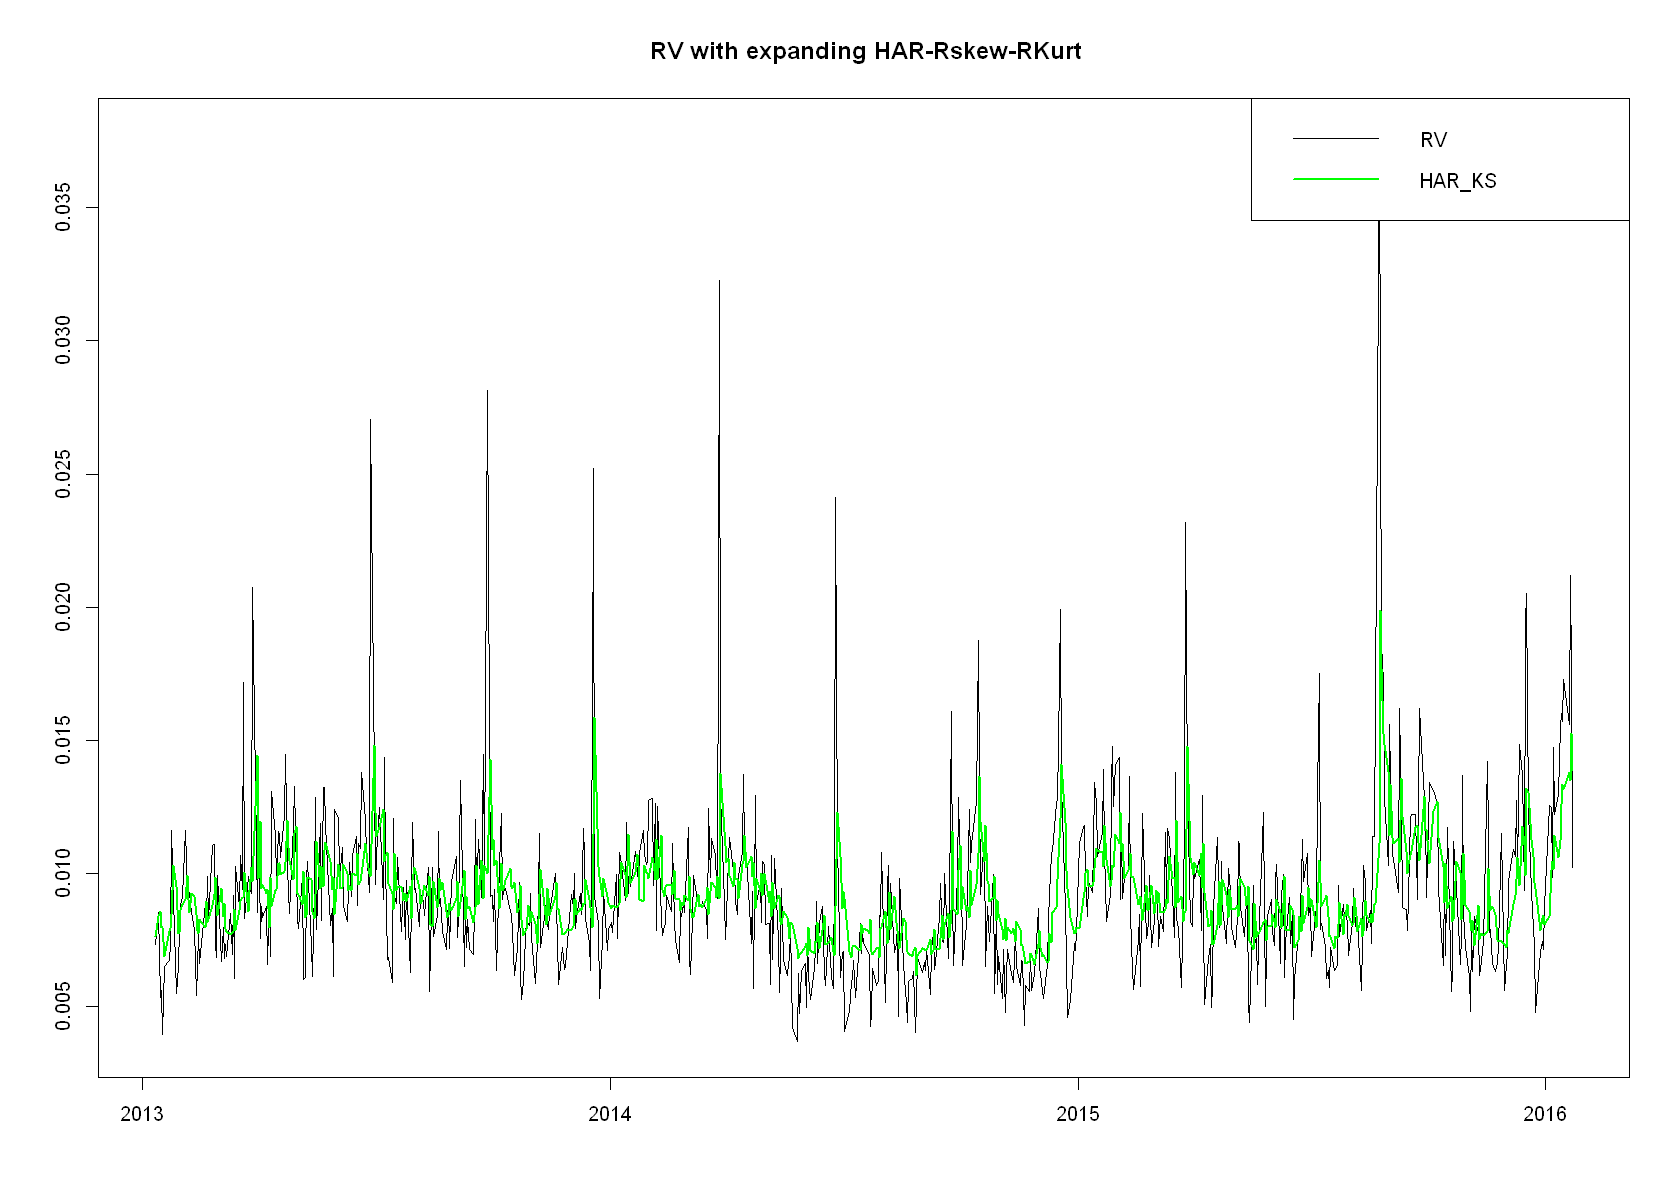

In [64]:
# Forecasting using expanding window for HAR_KS model
HAR_KS_exp_for <- sapply(1:n_for, function(x) forecast_HAR_KS(x))

# Convert forecast results to xts object
HAR_KS_exp_for <- xts(HAR_KS_exp_for, order.by = index(RV_day[(w_l+2):(nrow(acn))]))

# Plotting RV vs expanding HAR_KS
plot.zoo(RV_day[(w_l+2):(nrow(acn))], xlab=NA,
         ylab=NA, main=" RV with expanding HAR-Rskew-RKurt")
lines(zoo(HAR_KS_exp_for), col="green", lwd=2)
# Add legend
legend("topright", legend=c("RV", "HAR_KS"), col=c("black", "green"), lwd=c(1, 2))

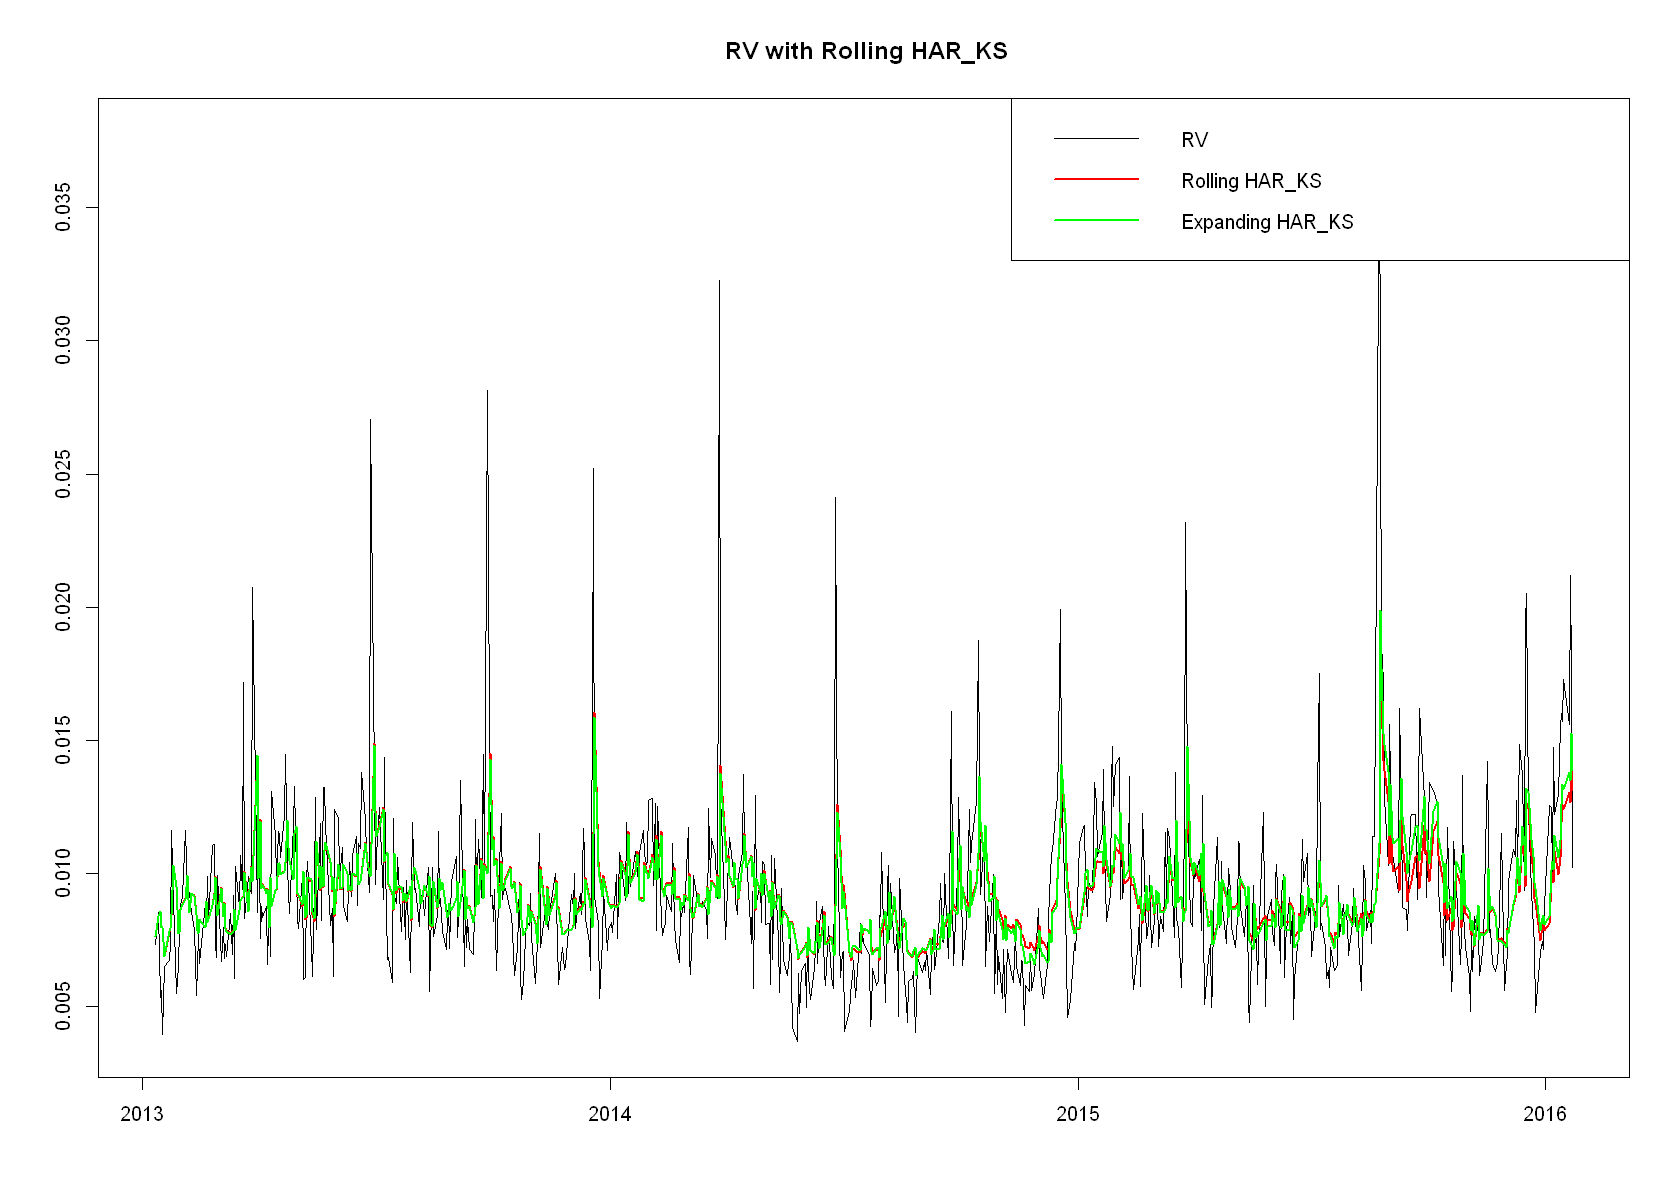

In [65]:
# Plotting RV vs rolling and expanding HAR_KS
plot.zoo(RV_day[(w_l+2):(nrow(acn))], xlab = NA, ylab = NA, main = " RV with Rolling HAR_KS")
lines(zoo(HAR_KS_roll_for), col = "red", lwd = 2)
lines(zoo(HAR_KS_exp_for), col="green", lwd=2)
# Add legend
legend("topright", legend=c("RV", "Rolling HAR_KS", "Expanding HAR_KS"), col=c("black", "red", "green"), lwd=c(1, 2, 2))

### Realized GARCH Rolling window

These computations take few minutes.

Due to the considerable noise in the rolling window forecast results, it's necessary to implement a Winsorization filter to obtain cleaner data. In cases where the forecast produces extreme values, we will simply use the most recent recorded forecast result as the forecast for that window.

In [66]:
# set up a global variable for Winsorization or Truncation for extreme values.
flag_last <- 0

# Function that calculates the one-step ahead forecast for the Realized GARCH model

# Input parameters: x is rolling window postion
# exp is the flag of rolling or expanding window, default is expanding
# return forecast volatility
forecast_RGARCH <- function (x,exp = 1) {

    RGarch_fit <- ugarchfit(real_garchspec, rets[exp:(x+w_l)],
        solver = 'hybrid', realizedVol =  RV_day[exp:(x+w_l)])

    RGARCH_for<- ugarchforecast(RGarch_fit, data = NULL,
        n.ahead = 1,  n.roll = 0, out.sample = 0)
    for_res <- RGARCH_for@forecast[["sigmaFor"]]

    # Winsorization out of range values
    if (for_res > 0.05) {
#        print(for_res)
        for_res <- flag_last
    } else {
        flag_last <<- for_res
    }
    return(for_res)
}

Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARC

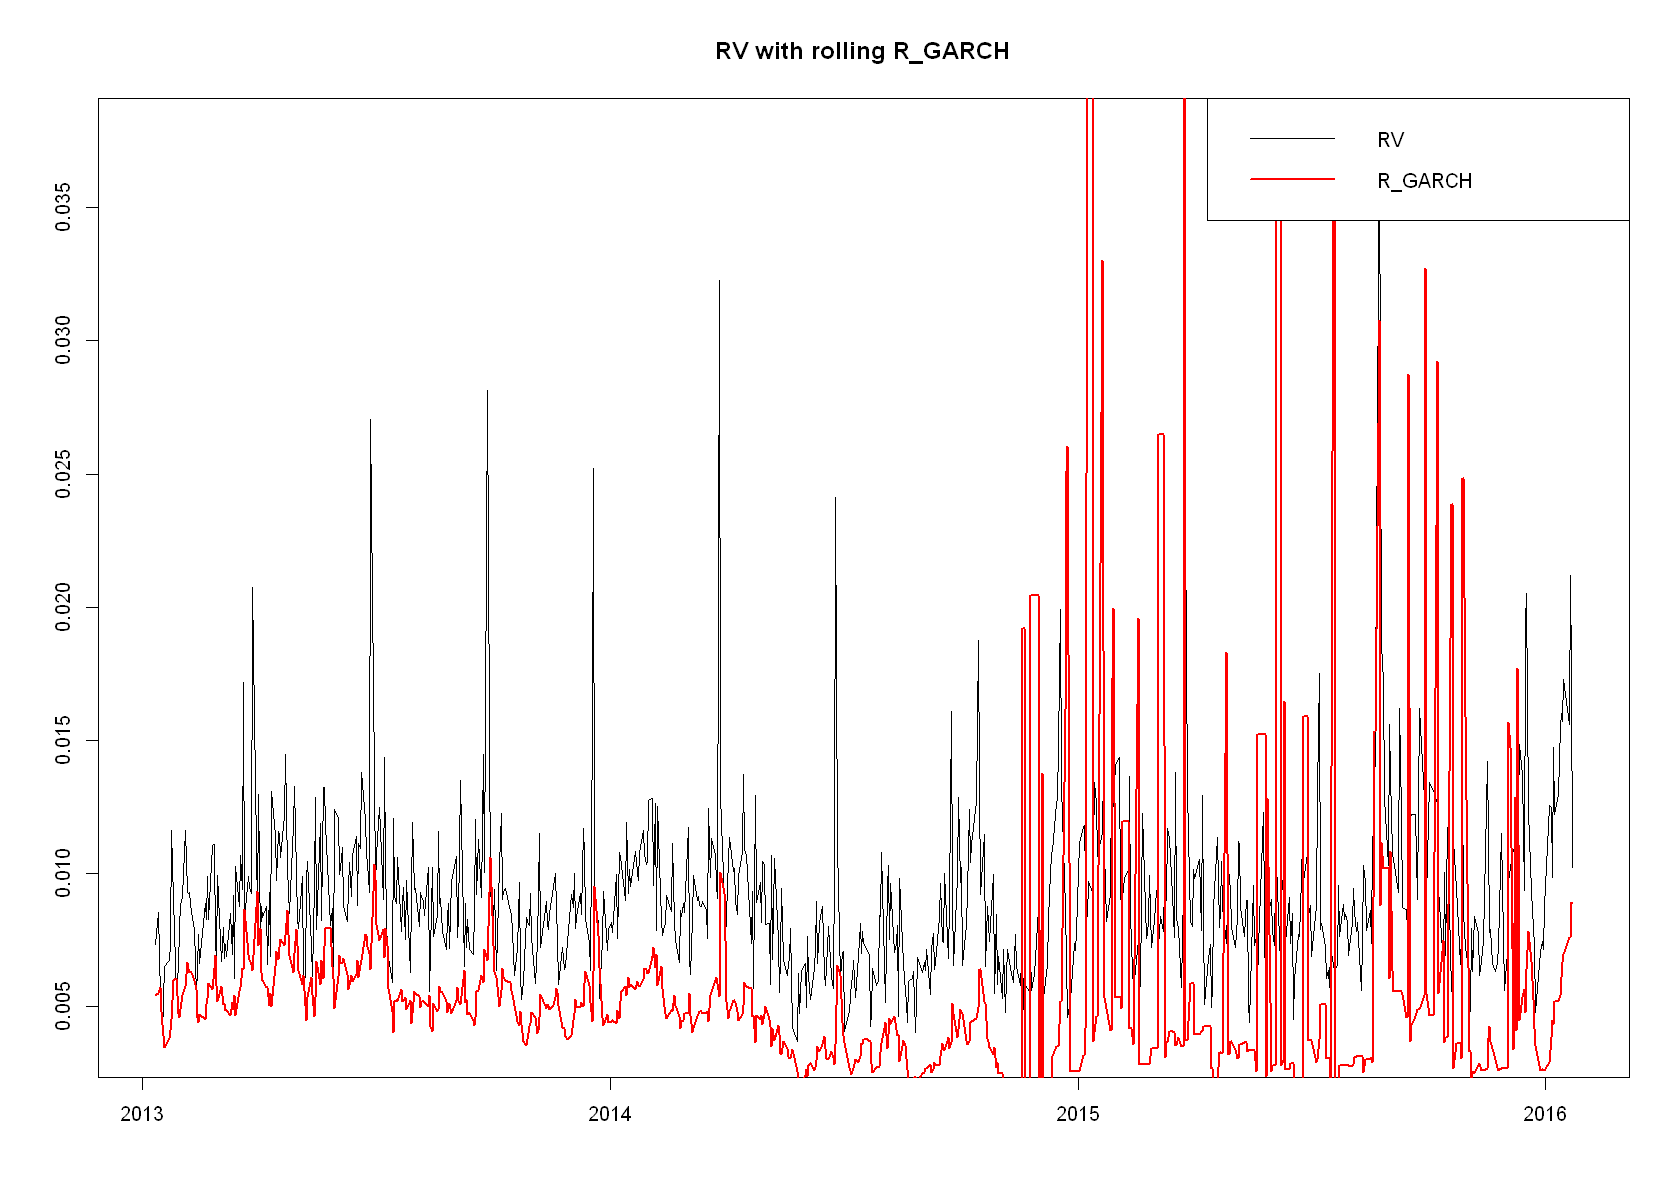

In [67]:
# Rolling window forecast for R_GARCH
R_GARCH_roll_for <- sapply(1:n_for, function (x) forecast_RGARCH(x, x))

# Convert forecast data to xts
R_GARCH_roll_for <- xts(R_GARCH_roll_for, order.by = index(RV_day[(w_l+2):(nrow(acn))]))

# Plot comparison between true RV and rolling R_GARCH forecast
plot.zoo(RV_day[(w_l+2):(nrow(acn))], xlab = NA, ylab = NA, main = "RV with rolling R_GARCH")
lines(zoo(R_GARCH_roll_for), col = "red", lwd = 2)
# Add legend
legend("topright", legend = c("RV", "R_GARCH"), col = c("black", "red"), lwd = c(1, 2))

### Realized GARCH Expanding window

Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARCH", f = .realgarchLLH, T = T, :
"
rugarch-->warning: failed to invert hessian
"
Warning message in .makefitmodel(garchmodel = "realGARC

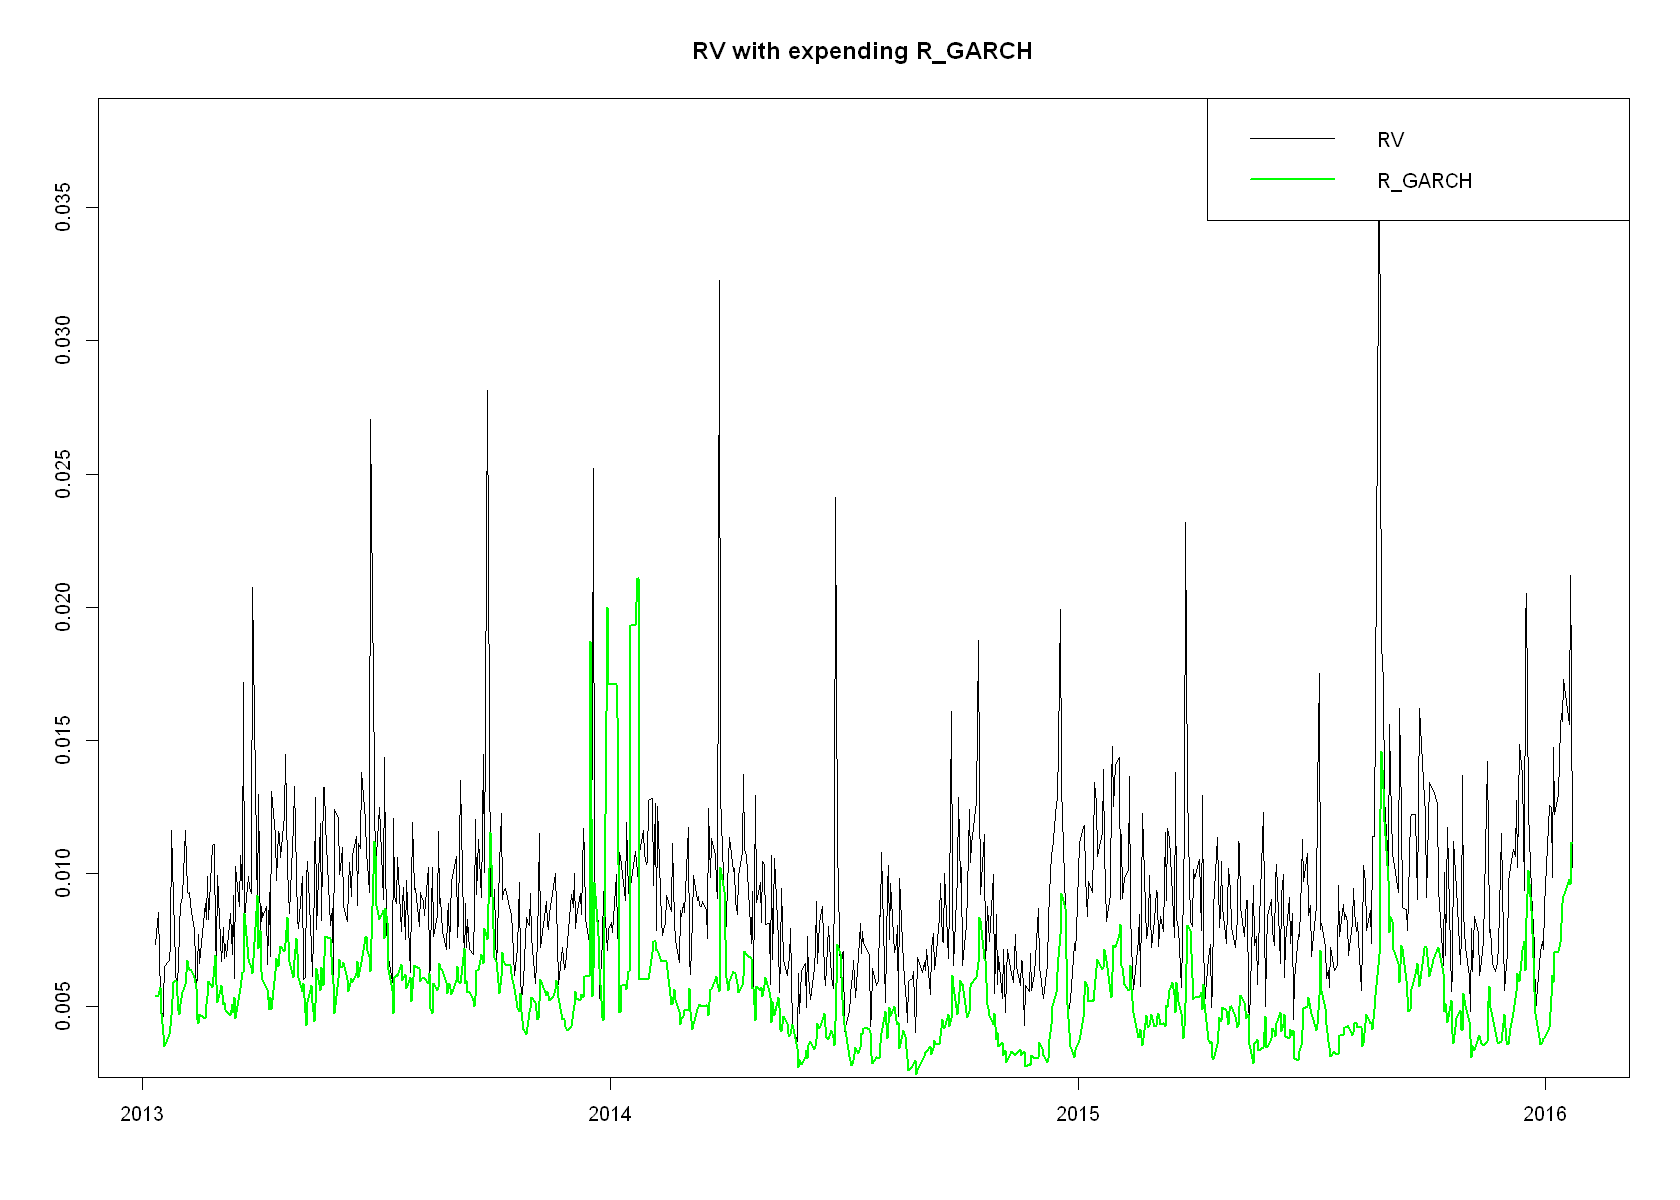

In [68]:
# Forecast R_GARCH using expanding window
R_GARCH_exp_for <- sapply(1:n_for, function (x) forecast_RGARCH(x))

# Convert the forecast data to an xts object
R_GARCH_exp_for <- xts(R_GARCH_exp_for, order.by = index(RV_day[(w_l + 2):(nrow(acn))]))

# Plot the comparison between true RV and rolling R_GARCH forecast
plot.zoo(RV_day[(w_l + 2):(nrow(acn))], xlab = NA,
         ylab = NA, main = "RV with expending R_GARCH")
lines(zoo(R_GARCH_exp_for), col = "green", lwd = 2)  # Add the rolling R_GARCH forecast
# Add legend
legend("topright", legend = c("RV", "R_GARCH"), col = c("black", "green"), lwd = c(1, 2))

### ARMA-GARCH Rolling window

We decided to utilize ugarchroll functions.

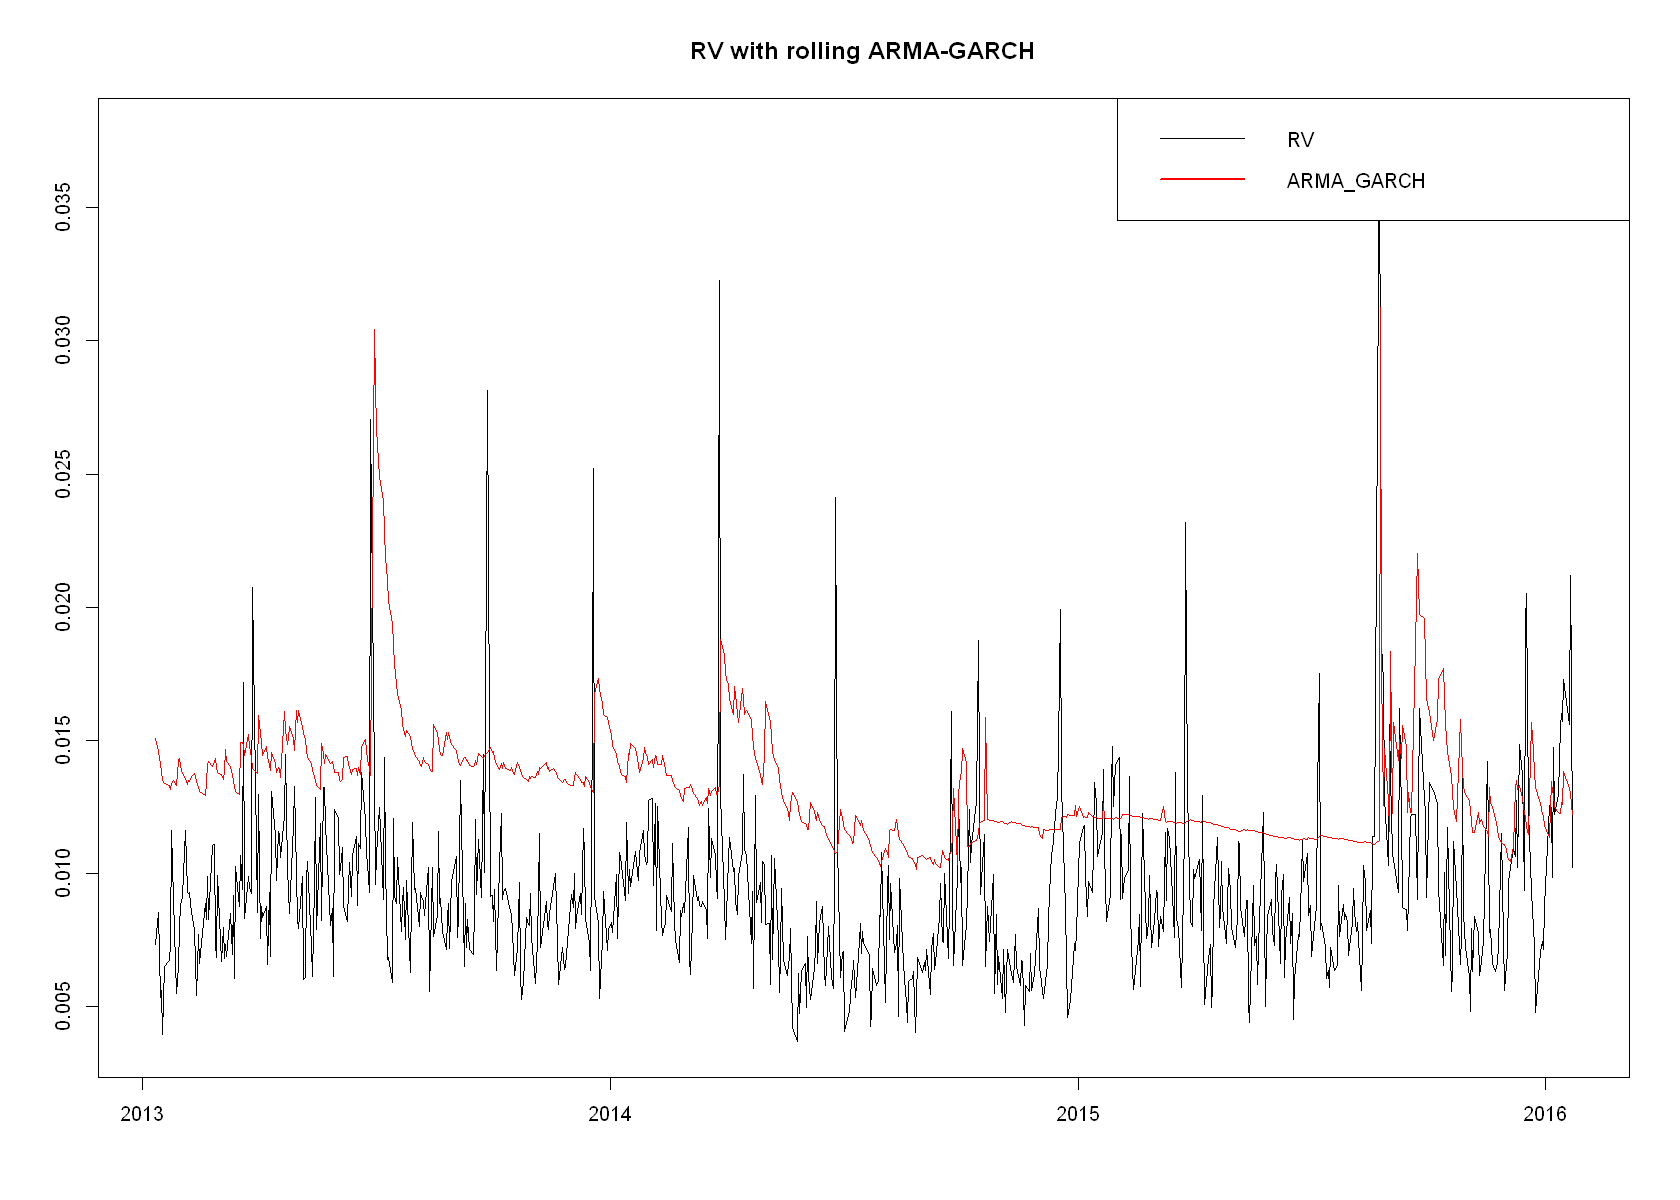

In [69]:
# Rolling ARMA-GARCH model
GARCH_roll <- ugarchroll(garchspec, 100 * rets[1:(nrow(acn)),],
                            n.ahead = 1, forecast.length = n_for, n.start = NULL,
                            refit.every = 1, refit.window = c("moving"), window.size = w_l,
                            solver = "solnp", fit.control = list(), solver.control = list(),
                            calculate.VaR = FALSE, cluster = NULL, keep.coef = TRUE)


# Convert to xts format
ARMA_GARCH_roll <- xts(GARCH_roll@forecast$density$Sigma, order.by = index(RV_day[(w_l + 2):(nrow(acn))])) / 100


# Plot the comparison between true RV and rolling ARMA-GARCH forecast
plot.zoo(RV_day[(w_l+2):(nrow(acn))],xlab=NA, ylab=NA, main="RV with rolling ARMA-GARCH")
lines(zoo(ARMA_GARCH_roll),col="red")
# Add legend
legend("topright", legend=c("RV", "ARMA_GARCH"), col=c("black", "red"), lwd=c(1, 2))

### ARMA-GARCH Expanding window

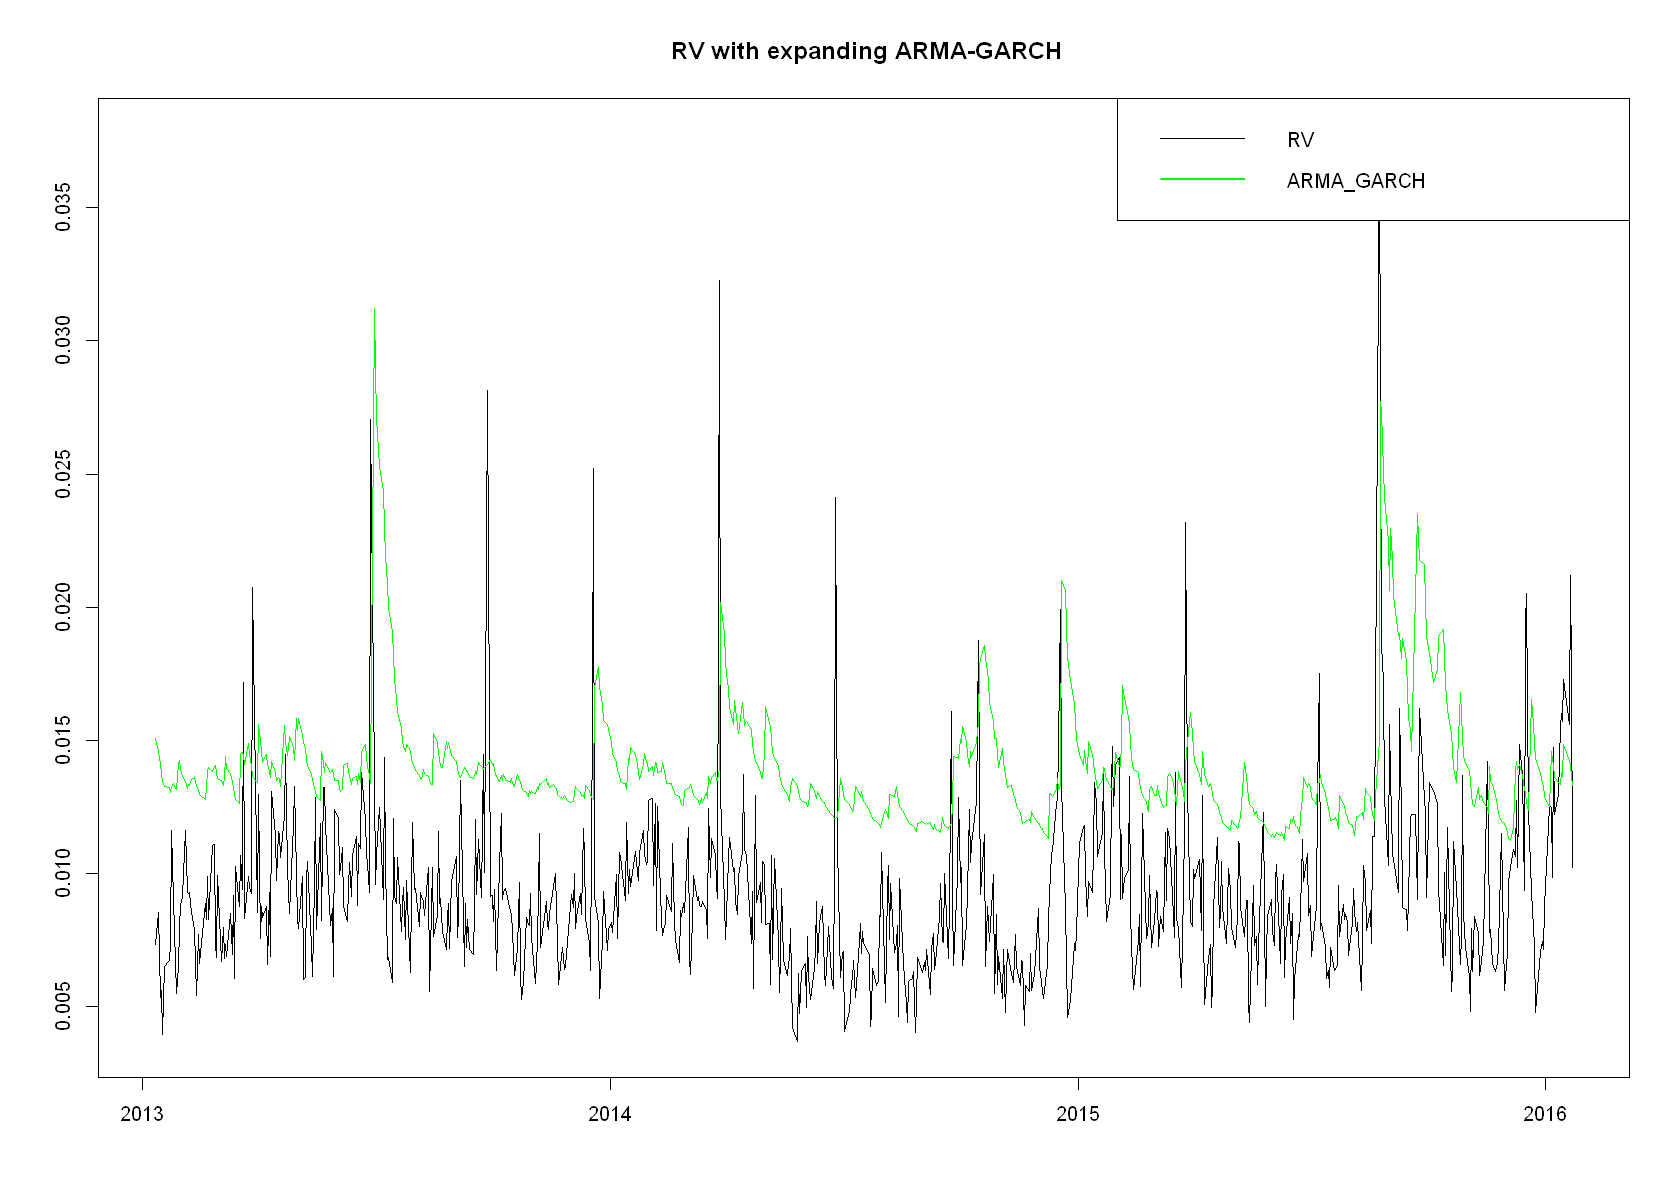

In [70]:
# Expanding ARMA-GARCH model
GARCH_exp <- ugarchroll(garchspec, 100 * rets[1:(nrow(acn)),],
                          n.ahead = 1, forecast.length = n_for, n.start = NULL,
                          refit.every = 1, refit.window = c("recursive"), window.size = w_l,
                          solver = "solnp", fit.control = list(), solver.control = list(),
                          calculate.VaR = FALSE, cluster = NULL, keep.coef = TRUE)

# Convert to xts format
ARMA_GARCH_exp <- xts(GARCH_exp@forecast$density$Sigma, order.by = index(RV_day[(w_l + 2):(nrow(acn))])) / 100


# Plot the comparison between true RV and expanding ARMA-GARCH forecast
plot.zoo(RV_day[(w_l+2):(nrow(acn))],xlab=NA, ylab=NA, main=" RV with expanding ARMA-GARCH")
lines(zoo(ARMA_GARCH_exp),col="green")
# Add legend
legend("topright", legend=c("RV", "ARMA_GARCH"), col=c("black", "green"), lwd=c(1, 2))

### Compare forecast errors from all models

- We believe that including more data in the regression model enhances its ability to predict returns and volatilities more accurately. Therefore, in our model comparison analysis, we primarily emphasize the forecast results obtained using the expanding window approach for data analysis.
- The forecast error represents the variance between the realized (true) value and the forecasted value. We employ the absolute error value for evaluation purposes.

### Visual comparison

### Expanding window comparison:

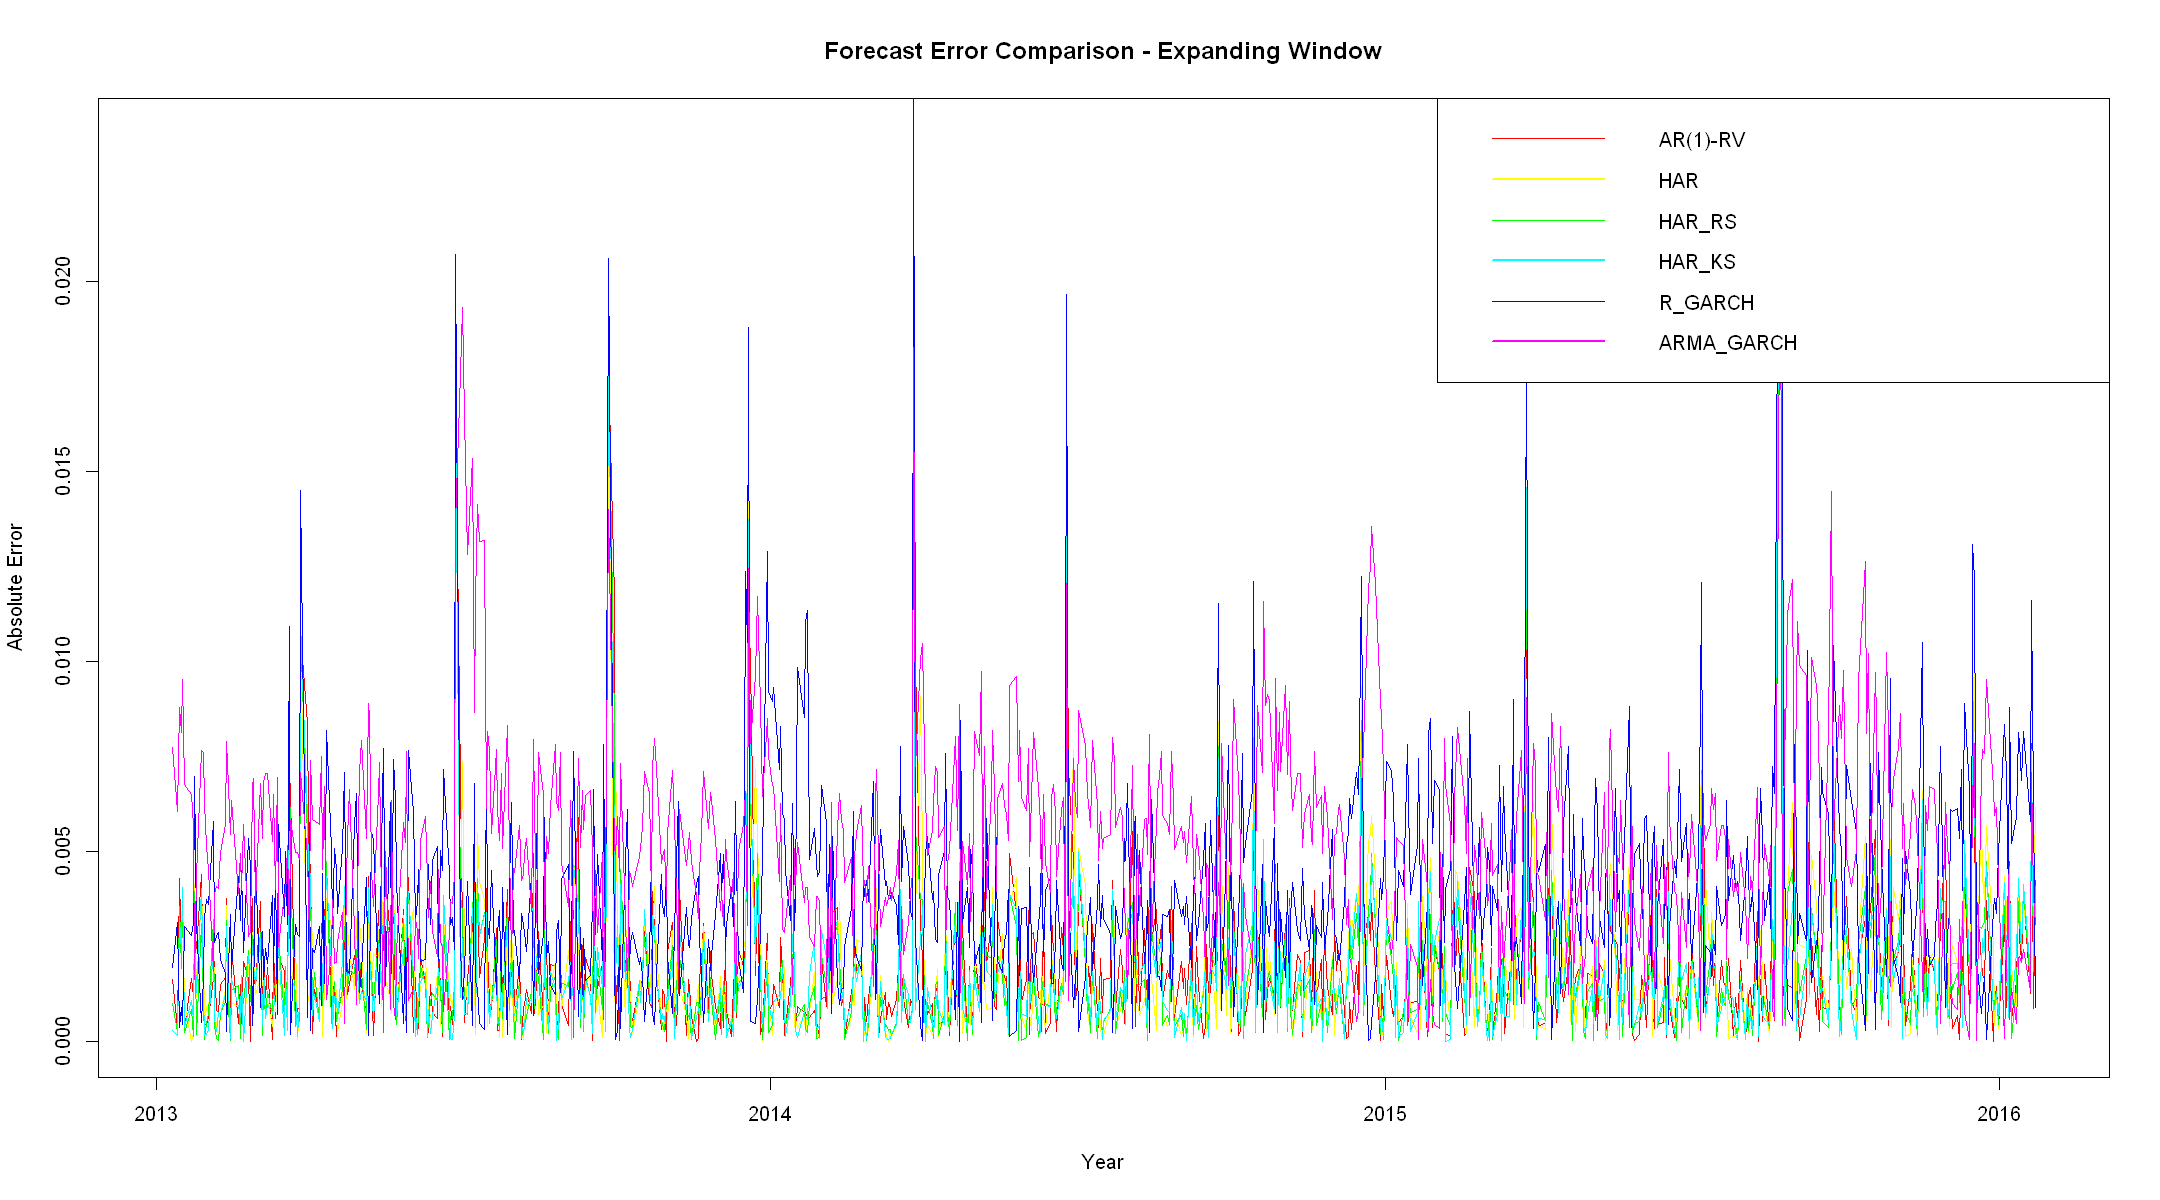

In [71]:
options(repr.plot.width = 18, repr.plot.height = 10)

# Create forecast result list for comparison
model_name_list <- c("AR(1)-RV", "HAR", 'HAR_RS', 'HAR_KS','R_GARCH', 'ARMA_GARCH')
forecast_list_exp <- list(AR1_exp_for, HAR_exp_for, HAR_RS_exp_for, HAR_KS_exp_for, R_GARCH_exp_for, ARMA_GARCH_exp)
model_n <- length(forecast_list_exp)

# Calculate the absolute error for each forecast model
error_list <- list()
for (i in 1:length(forecast_list_exp)) {
    error_list[[i]] <- abs(RV_day - forecast_list_exp[[i]])
}

rainbow_colors <- rainbow(6)

plot.zoo(error_list[[1]], xlab='Year', ylab="Absolute Error", col = rainbow_colors[1],
         main= "Forecast Error Comparison - Expanding Window")
for (i in 2:length(error_list)) {
    lines(zoo(error_list[[i]]), col = rainbow_colors[i])
}
# Add legend
legend("topright", legend = model_name_list, col = rainbow_colors, lwd = c(1, 2))

options(repr.plot.width = 14, repr.plot.height = 10)

### Rolling window comparison:

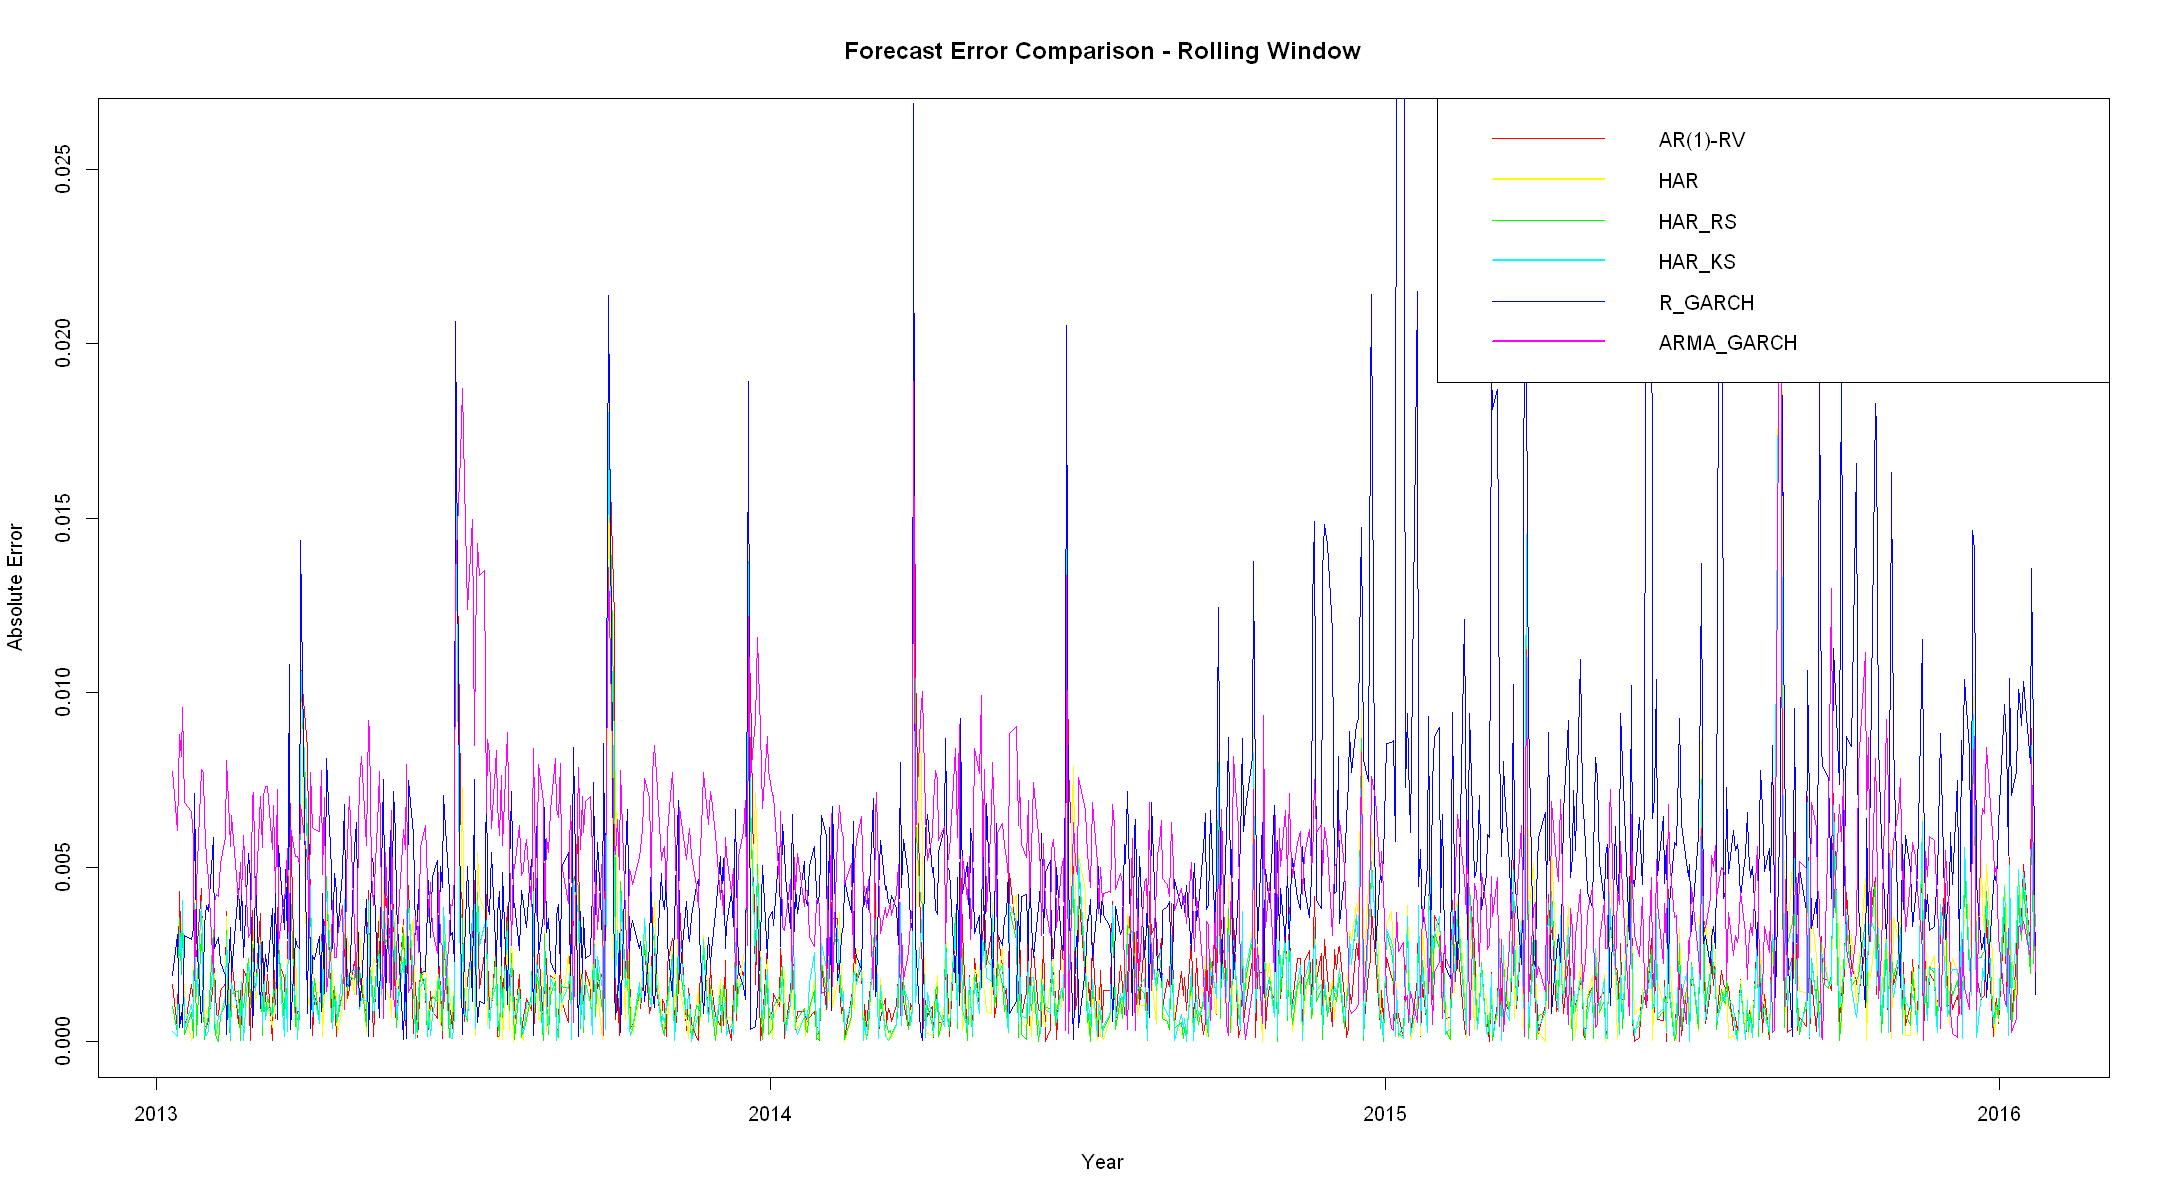

In [72]:
options(repr.plot.width = 18, repr.plot.height = 10)

# Create forecast result list for comparison
model_name_list <- c("AR(1)-RV", "HAR", 'HAR_RS', 'HAR_KS','R_GARCH', 'ARMA_GARCH')
forecast_list_roll <- list(AR1_roll_for, HAR_roll_for, HAR_RS_roll_for, HAR_KS_roll_for, R_GARCH_roll_for, ARMA_GARCH_roll)

# Calculate the absolute error for each forecast model
error_list <- list()
for (i in 1:length(forecast_list_roll)) {
    error_list[[i]] <- abs(RV_day - forecast_list_roll[[i]])
}

rainbow_colors <- rainbow(6)

plot.zoo(error_list[[1]], xlab='Year', ylab="Absolute Error", col = rainbow_colors[1],
         main= "Forecast Error Comparison - Rolling Window")
for (i in 2:length(error_list)) {
    lines(zoo(error_list[[i]]), col = rainbow_colors[i])
}
# Add legend
legend("topright", legend = model_name_list, col = rainbow_colors, lwd = c(1, 2))

options(repr.plot.width = 14, repr.plot.height = 10)

 #### Upon observing the visual forecast errors comparisons in expanding and rolling windows, it might be said that HAR models and the AR(1) model exhibits the lowest error values. On the other hand, the ARMA_GARCH and the Realized GARCH model displays the highest error values. However, it is difficult to see the details, thus more qualitative comparison will be performed.

### Loss functions:

- The choice of loss function is crucial.

### **MSE**

The Mean Squared Error (MSE) is a common measure of the average squared difference between the estimated values and the true values in a dataset. It is often used to assess the accuracy of a prediction model.

### Expanding Window:

In [73]:
MSE_loss<-function(proxy,forecast){
  return((proxy-forecast)^2)
}

mse_list_exp <- list()
mse_v <- c()
for (i in 1:model_n) {
    mse_list_exp[[i]] <- MSE_loss(RV_day, forecast_list_exp[[i]])
    mse_v[i] <- 10000 * mean(mse_list_exp[[i]])
}

df_mse_exp <- data.frame(mse_v)
row_n <- model_name_list
rownames(df_mse_exp) <- row_n
colnames(df_mse_exp) <- 'MSE'
df_mse_exp

,MSE
,<dbl>
AR(1)-RV,0.09130067
HAR,0.10049233
HAR_RS,0.08483223
HAR_KS,0.08624548
R_GARCH,0.25145353
ARMA_GARCH,0.35289475


### Rolling Window:

In [74]:
MSE_loss<-function(proxy,forecast){
  return((proxy-forecast)^2)
}

mse_list_roll <- list()
mse_v <- c()
for (i in 1:model_n) {
    mse_list_roll[[i]] <- MSE_loss(RV_day, forecast_list_roll[[i]])
    mse_v[i] <- 10000 * mean(mse_list_roll[[i]] )
}

df_mse_roll <- data.frame(mse_v)
row_n <- model_name_list
rownames(df_mse_roll) <- row_n
colnames(df_mse_roll) <- 'MSE'
df_mse_roll

,MSE
,<dbl>
AR(1)-RV,0.09436442
HAR,0.09983889
HAR_RS,0.08635393
HAR_KS,0.08809614
R_GARCH,0.48552141
ARMA_GARCH,0.29458374


Lower MSE values indicate better predictive accuracy, so AR(1)-RV, HAR_RS and HAR_KS have relatively lower errors compared to other models, while ARMA-GARCH and realized GARCH have the highest errors.

### **MAE**

MAE stands for Mean Absolute Error. It measures the average absolute difference between the predicted values and the true values in a dataset. Unlike MSE, which squares the errors, MAE calculates the absolute differences, making it less sensitive to outliers.

### Expanding Window:

In [75]:
MAE_loss<-function(proxy,forecast){
  return(abs(proxy-forecast))
}

mae_v <- c()
for (i in 1:model_n) {
    mae_v[i] <- 100 * mean(MAE_loss(RV_day, forecast_list_exp[[i]]))
}

df_mae_exp <- data.frame(mae_v)
row_n <- model_name_list
rownames(df_mae_exp) <- row_n
colnames(df_mae_exp) <- 'MAE'
df_mae_exp

,MAE
,<dbl>
AR(1)-RV,0.2076782
HAR,0.2093593
HAR_RS,0.1920044
HAR_KS,0.1923358
R_GARCH,0.4011215
ARMA_GARCH,0.5245736


### Rolling Window:

In [76]:
MAE_loss<-function(proxy,forecast){
  return(abs(proxy-forecast))
}

mae_v <- c()
for (i in 1:model_n) {
    mae_v[i] <- 100 * mean(MAE_loss(RV_day, forecast_list_roll[[i]]))
}

df_mae_roll <- data.frame(mae_v)
row_n <- model_name_list
rownames(df_mae_roll) <- row_n
colnames(df_mae_roll) <- 'MAE'
df_mae_roll

,MAE
,<dbl>
AR(1)-RV,0.2062894
HAR,0.2073268
HAR_RS,0.1921505
HAR_KS,0.1938527
R_GARCH,0.5249682
ARMA_GARCH,0.4685115


Models with lower MAE values are considered to have better predictive accuracy. Therefore, HAR_RS AND HAR_KS are the best choices for us, the worst performing are ARMA_GARCH and realized GARCH.

## *We decided to use only expanding window for DM test and Minzer-Zarnowitz regression.*

### Diebold-Mariano test (use the MSE loss)

The primary purpose of the Diebold-Mariano test is to determine whether one forecasting model significantly outperforms another in terms of forecast accuracy.

When specifying the parameter as "greater," the alternative hypothesis implies that method 2 exhibits greater accuracy compared to method 1.

In [77]:
min_p <- 1
k <- 1

for (i in 1:(model_n-1)) {
    for (j in (i+1):model_n) {
        dm_res <- dm.test(mse_list_exp[[i]], mse_list_exp[[j]], alternative = c("greater"))
        p_v <- round(dm_res$p.value, 3)
        if (p_v < min_p) { min_p <- p_v }
        print(paste(k, model_name_list[i], "vs", model_name_list[j],":",
            p_v ))
        k <- k + 1
    }
}
print(paste("Minimum p-value:", min_p))

[1] "1 AR(1)-RV vs HAR : 0.918"
[1] "2 AR(1)-RV vs HAR_RS : 0.853"
[1] "3 AR(1)-RV vs HAR_KS : 0.906"
[1] "4 AR(1)-RV vs R_GARCH : 0.999"
[1] "5 AR(1)-RV vs ARMA_GARCH : 1"
[1] "6 HAR vs HAR_RS : 0.064"
[1] "7 HAR vs HAR_KS : 0.108"
[1] "8 HAR vs R_GARCH : 1"
[1] "9 HAR vs ARMA_GARCH : 0.974"
[1] "10 HAR_RS vs HAR_KS : 0.939"
[1] "11 HAR_RS vs R_GARCH : 1"
[1] "12 HAR_RS vs ARMA_GARCH : 1"
[1] "13 HAR_KS vs R_GARCH : 1"
[1] "14 HAR_KS vs ARMA_GARCH : 0.996"
[1] "15 R_GARCH vs ARMA_GARCH : 0.187"
[1] "Minimum p-value: 0.064"


The results of the Diebold-Mariano (DM) test for the given models indicate the following p-values, assessing the predictive accuracy differences between each pair using the Mean Squared Error (MSE) as the loss function. The comparison between AR(1)-RV, HAR, HAR_RS and HAR_KS shows no significant difference in predictive accuracy between each other. Moreover, all of AR(1)-RV, HAR, HAR_RS and HAR_KS permorm better than R_GARCH, and ARMA_GARCH as the difference is statistically significant.


Notably, the comparison between R_GARCH and ARMA_GARCH has a p-value of 0.187, indicating no significant difference between their predictive accuracies. The minimum p-value across all comparisons is 0.064 from the comparison between HAR and HAR_RS, suggesting a marginal indication of HAR_RS having better predictive accuracy than HAR, but not enough to be statistically significant at the conventional 0.05 level.

In [92]:
dm.test(mse_list_exp[[6]], mse_list_exp[[1]], alternative = c("greater"))


	Diebold-Mariano Test

data:  mse_list_exp[[6]]mse_list_exp[[1]]
DM = 4.5189, Forecast horizon = 1, Loss function power = 2, p-value =
3.611e-06
alternative hypothesis: greater


### AR(1)-RV Minzer-Zarnowitz regression

- The primary purpose of the Mincer-Zarnowitz regression is to evaluate the performance of a forecasting model by comparing its predictions against actual observed outcomes.
* Ideally, the intercept should be zero. A significant intercept may indicate a systematic bias in the forecasts.
* Ideally, the slope should be one. A slope different from one suggests that the forecasts are systematically overestimating or underestimating the actual values.

In [78]:
print(paste("MZ regression for:", model_name_list[1]))
MZ_roll<-lm((RV_day[(w_l+2):(w_l+1+n_for)])~ (forecast_list_exp[[1]]))
summary(MZ_roll)
MZ_coef<-summary(MZ_roll)$coefficients
(MZ_coef[2,"Estimate"]-1)/MZ_coef[2,"Std. Error"]

[1] "MZ regression for: AR(1)-RV"



Call:
lm(formula = (RV_day[(w_l + 2):(w_l + 1 + n_for)]) ~ (forecast_list_exp[[1]]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009168 -0.001601 -0.000432  0.001025  0.025181 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.0011577  0.0005569   2.079    0.038 *  
forecast_list_exp[[1]] 0.8215194  0.0557501  14.736   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.002947 on 748 degrees of freedom
Multiple R-squared:  0.225,	Adjusted R-squared:  0.2239 
F-statistic: 217.1 on 1 and 748 DF,  p-value: < 2.2e-16


[1] -3.201438

For AR(1)-RV, the intercept is 0.0011, beta is 0.8215 (both are significantly different from 0) and adj. R-squared is 22 %.

### HAR Minzer-Zarnowitz regression

In [79]:
print(paste("MZ regression for:", model_name_list[2] ))
MZ_roll<-lm((RV_day[(w_l+2):(w_l+1+n_for)])~ (forecast_list_exp[[2]]))
summary(MZ_roll)
MZ_coef<-summary(MZ_roll)$coefficients
(MZ_coef[2,"Estimate"]-1)/MZ_coef[2,"Std. Error"]

[1] "MZ regression for: HAR"



Call:
lm(formula = (RV_day[(w_l + 2):(w_l + 1 + n_for)]) ~ (forecast_list_exp[[2]]))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0061432 -0.0017116 -0.0004482  0.0012004  0.0281738 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.0028935  0.0006015   4.811 1.82e-06 ***
forecast_list_exp[[2]] 0.6764627  0.0632645  10.693  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003118 on 748 degrees of freedom
Multiple R-squared:  0.1326,	Adjusted R-squared:  0.1314 
F-statistic: 114.3 on 1 and 748 DF,  p-value: < 2.2e-16


[1] -5.114042

The performance of this model is worse in comparison to previous one with intercept 0.0028, beta 0.6764 and adj.R-squared is 13 %.

### HAR-RS Minzer-Zarnowitz regression

In [80]:
print(paste("MZ regression for:", model_name_list[3] ))
MZ_roll<-lm((RV_day[(w_l+2):(w_l+1+n_for)])~ (forecast_list_exp[[3]]))
summary(MZ_roll)
MZ_coef<-summary(MZ_roll)$coefficients
(MZ_coef[2,"Estimate"]-1)/MZ_coef[2,"Std. Error"]

[1] "MZ regression for: HAR_RS"



Call:
lm(formula = (RV_day[(w_l + 2):(w_l + 1 + n_for)]) ~ (forecast_list_exp[[3]]))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0074944 -0.0016298 -0.0003543  0.0011203  0.0258635 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.0007036  0.0005561   1.265    0.206    
forecast_list_exp[[3]] 0.9099860  0.0584030  15.581   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.002909 on 748 degrees of freedom
Multiple R-squared:  0.245,	Adjusted R-squared:  0.244 
F-statistic: 242.8 on 1 and 748 DF,  p-value: < 2.2e-16


[1] -1.541257

Better performance is for HAR-RS model with 0.007 intercept (not significant), beta is 0.9099, and adj.R-squared is 24 %.

### HAR-Rskew-RKurt Minzer-Zarnowitz regression


In [81]:
print(paste("MZ regression for:", model_name_list[4]))
MZ_roll<-lm((RV_day[(w_l+2):(w_l+1+n_for)])~ (forecast_list_exp[[4]]))
summary(MZ_roll)
MZ_coef<-summary(MZ_roll)$coefficients
(MZ_coef[2,"Estimate"]-1)/MZ_coef[2,"Std. Error"]

[1] "MZ regression for: HAR_KS"



Call:
lm(formula = (RV_day[(w_l + 2):(w_l + 1 + n_for)]) ~ (forecast_list_exp[[4]]))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.006846 -0.001673 -0.000457  0.001150  0.026553 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.0002206  0.0006427  -0.343    0.732    
forecast_list_exp[[4]]  1.0231939  0.0687604  14.881   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.00294 on 748 degrees of freedom
Multiple R-squared:  0.2284,	Adjusted R-squared:  0.2274 
F-statistic: 221.4 on 1 and 748 DF,  p-value: < 2.2e-16


[1] 0.3373155

Intercept is not siginificant with a value -0.0002 and beta is 1.0232 and adj.R-squred is 22 %.

### Realized GARCH Minzer-Zarnowitz regression

In [82]:
print(paste("MZ regression for:", model_name_list[5]))
MZ_roll<-lm((RV_day[(w_l+2):(w_l+1+n_for)])~ (forecast_list_exp[[5]]))
summary(MZ_roll)
MZ_coef<-summary(MZ_roll)$coefficients
(MZ_coef[2,"Estimate"]-1)/MZ_coef[2,"Std. Error"]

[1] "MZ regression for: R_GARCH"



Call:
lm(formula = (RV_day[(w_l + 2):(w_l + 1 + n_for)]) ~ (forecast_list_exp[[5]]))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0089207 -0.0017681 -0.0005206  0.0012468  0.0278571 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.0066675  0.0003081  21.643   <2e-16 ***
forecast_list_exp[[5]] 0.4598719  0.0516283   8.907   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003183 on 748 degrees of freedom
Multiple R-squared:  0.0959,	Adjusted R-squared:  0.09469 
F-statistic: 79.34 on 1 and 748 DF,  p-value: < 2.2e-16


[1] -10.46186

Till now the worst performance is for the realized GARCH model, intercept is 0.006, beta is 0.459 and adj.R-squared is 10 %.

### ARMA-GARCH Minzer-Zarnowitz regression

In [83]:
print(paste("MZ regression for:", model_name_list[6] ))
MZ_roll<-lm((RV_day[(w_l+2):(w_l+1+n_for)])~ (forecast_list_exp[[6]]))
summary(MZ_roll)
MZ_coef<-summary(MZ_roll)$coefficients
(MZ_coef[2,"Estimate"]-1)/MZ_coef[2,"Std. Error"]

[1] "MZ regression for: ARMA_GARCH"



Call:
lm(formula = (RV_day[(w_l + 2):(w_l + 1 + n_for)]) ~ (forecast_list_exp[[6]]))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0061400 -0.0019574 -0.0004949  0.0011744  0.0281368 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.0040515  0.0007162   5.657 2.19e-08 ***
forecast_list_exp[[6]] 0.3691242  0.0505587   7.301 7.32e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003234 on 748 degrees of freedom
Multiple R-squared:  0.06652,	Adjusted R-squared:  0.06527 
F-statistic:  53.3 on 1 and 748 DF,  p-value: 7.324e-13


[1] -12.47808

The worst results from all the models is for ARMA-GARCH model with the intercept of 0.0040,beta is 0.3691 and adj.R-squared is 6 %. 

The GARCH models rely solely on return data for its forecasts. When compared to Realized Volatility data, the close-price to close-price volatility differs significantly from the open-price to close-price volatility. Consequently, the gap between predictions and actual values increases.

# 4. Summary
## Write a short summary (up to 1/2 page) focused on comparison of model performance.

1. Sample Data Analysis:
The data set consists of 1,500 daily samples spanning from 2010 to 2016 - with each year comprising 250 trading days, this equates to approximately six years of data. From the ACF and PACF tests, it is evident that there are numerous dependencies in the Realized Volatility (RV) samples, indicating that volatility has a long memory. This is expected as volatility tends to exhibit persistence. However, we observed that the Return and RV datasets do not perfectly align. The RV in this project is calculated from intraday Open-Price to Close-Price data and excludes overnight returns. This discrepancy should be considered when using models like GARCH, which rely on return data for forecasting.

2. In-Sample Fit:
The HAR-family models as well as the AR(1)-RV model demonstrated the best in-sample fits, indicating a simple autoregressive model of RV is quite effective. In contrast, the ARMA-GARCH model showed the poorest in-sample fit. This model forecasts based only on return data rather than RV directly, which, as noted, do not perfectly match. The mismatch between the datasets likely contributes to the ARMA-GARCH model’s poor performance.

3. Forecast Schemes:
The choice between rolling and expanding windows for forecasting depends on the nature of the assets and the dataset. A rolling window can better adapt to recent changes or trends, making it suitable for time-sensitive data. An expanding window uses more historical data, which can enhance the prediction of returns and volatilities. The effectiveness of each forecasting scheme hinges on the dataset's characteristics, such as heterogeneity or parameter drifts that are not explicitly modeled.

4. Out-of-Sample Forecast:
In out-of-sample forecasting, the HAR-RS and HAR-KS models provided the best match to the RV data. This model incorporates semi-variance information. The ARMA-GARCH and RGARCH models again performed the worst.

Further Research:
Future research should explore sub-sampling analysis, particularly focusing on periods following high volatility spikes or parameter shifts. This could provide deeper insights into the models' performance and improve their forecasting accuracy under different market conditions.

## These are the summary plots that can help to answer following questions:
- Which model approximates data the best?
- which model forecasts the best? + (comparison of model performance)

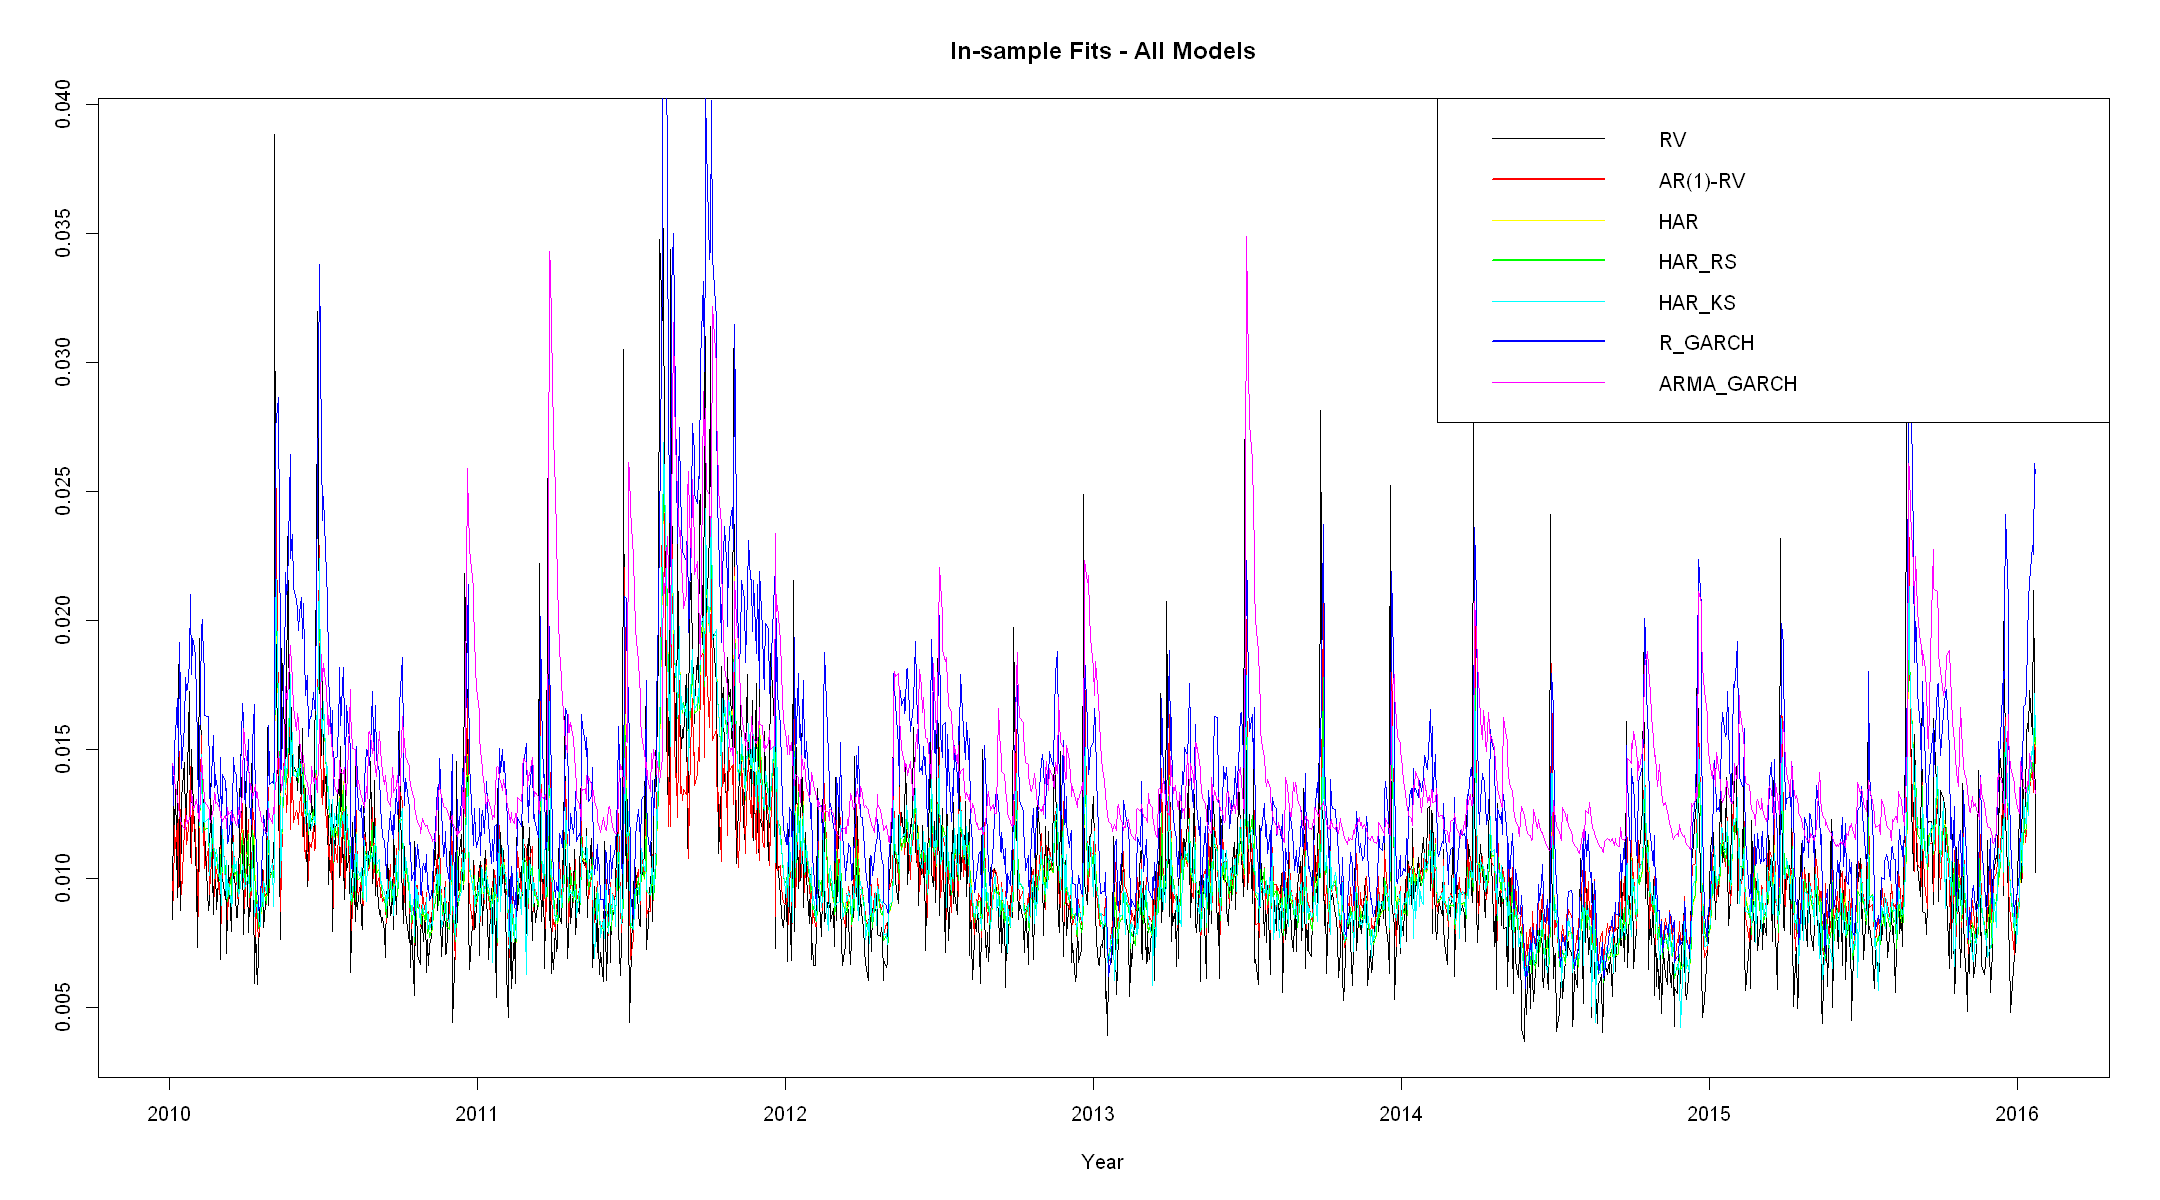

In [84]:
options(repr.plot.width = 18, repr.plot.height = 10)

model_name_list <- c("AR(1)-RV", "HAR", 'HAR_RS', 'HAR_KS','R_GARCH', 'ARMA_GARCH')
fit_list <- list(AR1, HAR, HAR_RS, HAR_KS, R_GARCH, ARMA_GARCH)


plot.zoo(RV_day, xlab='Year', ylab=NA, main= "In-sample Fits - All Models")
for (i in 1:length(fit_list)) {
    lines(zoo(fit_list[[i]]), col = vibrant_colors[i])
}
#Add legend
legend("topright", legend = c("RV", model_name_list), col = c("black", vibrant_colors), lwd = c(1, 2))

options(repr.plot.width = 14, repr.plot.height = 10)

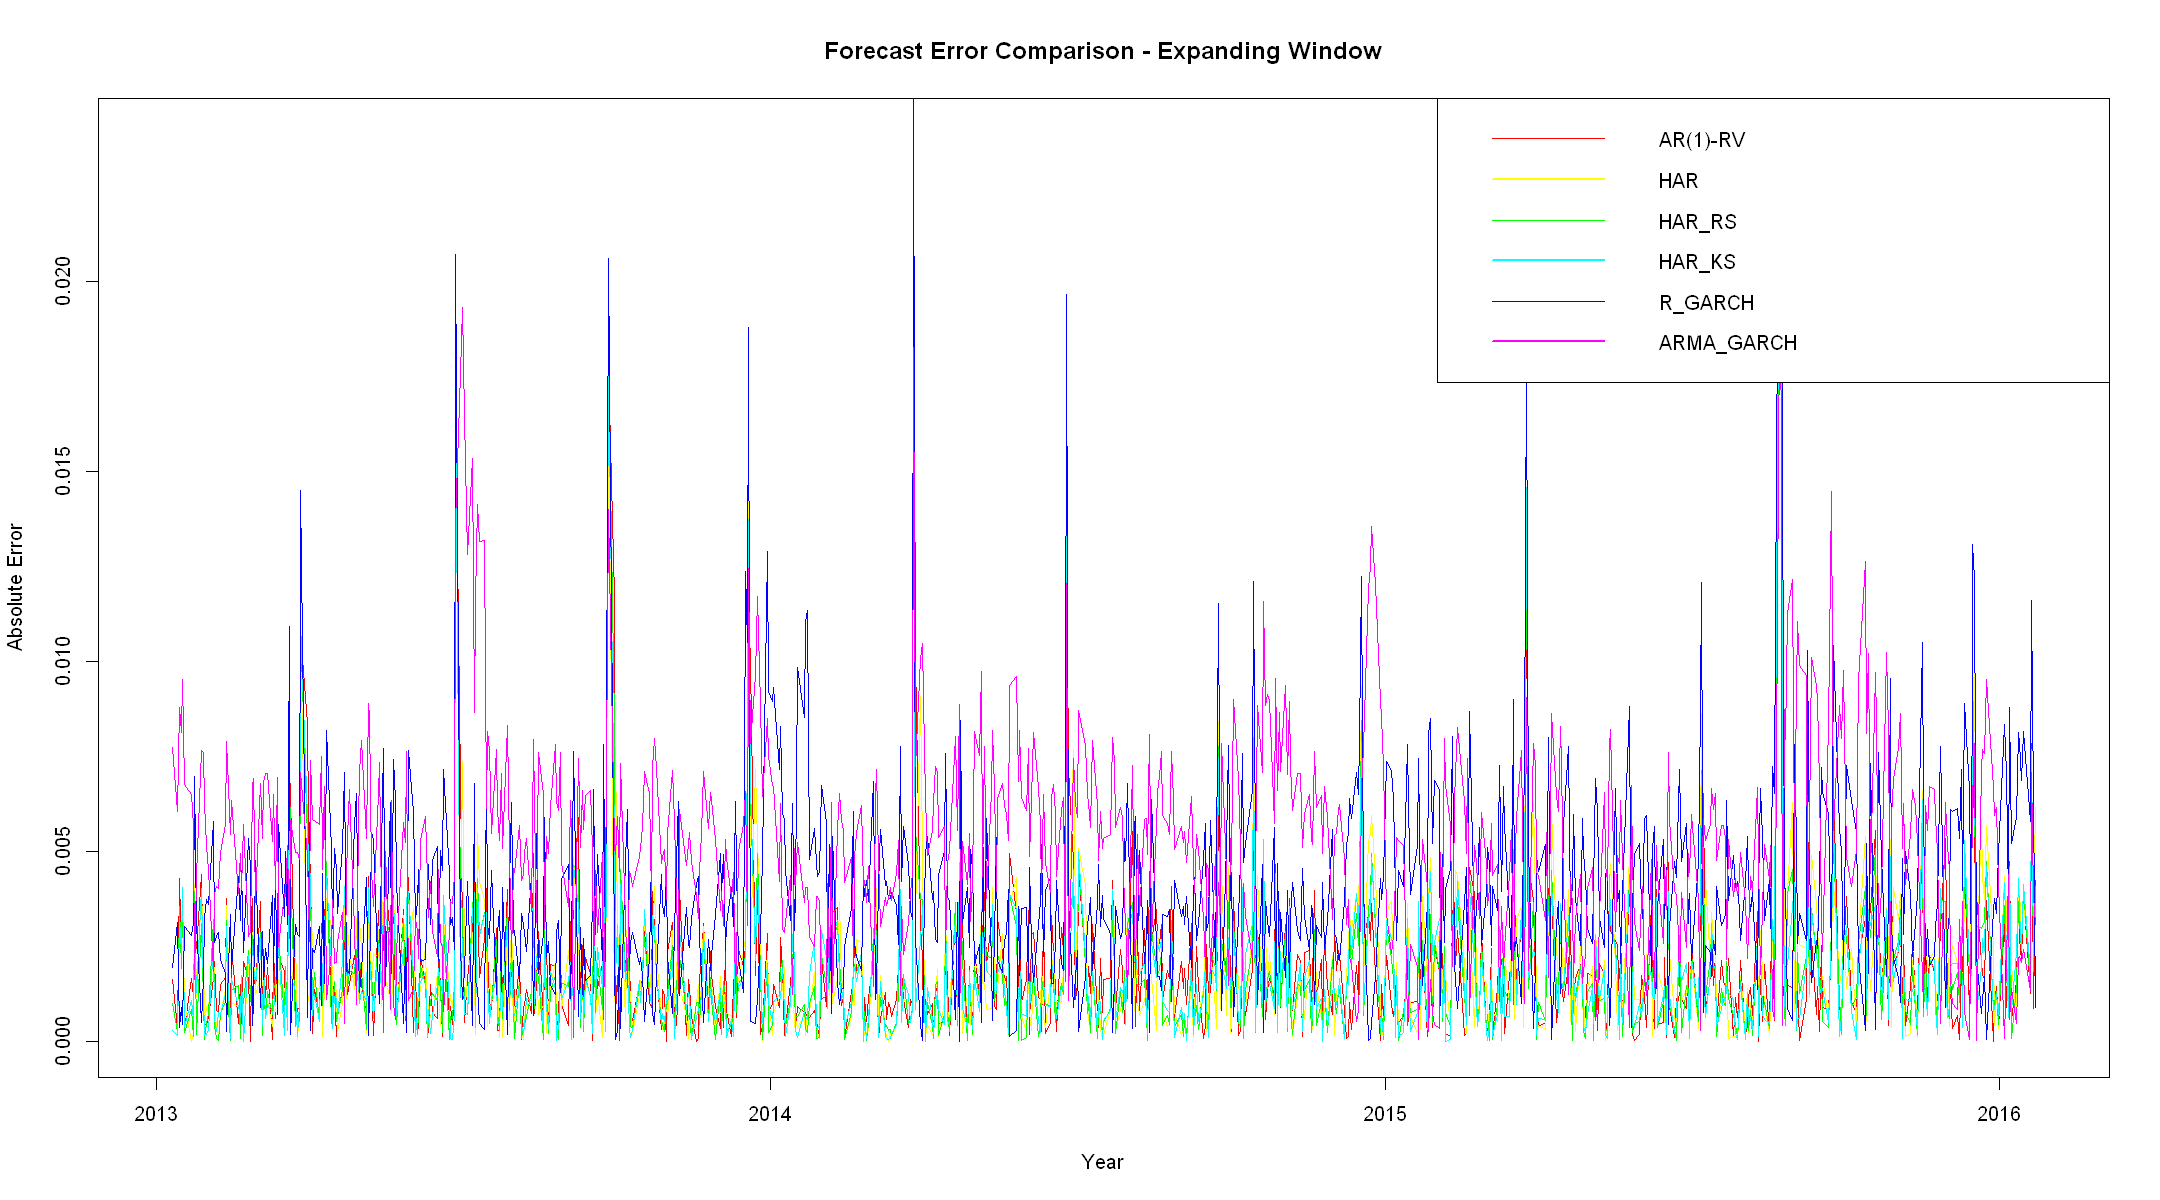

In [85]:
options(repr.plot.width = 18, repr.plot.height = 10)

# Create forecast result list for comparison
model_name_list <- c("AR(1)-RV", "HAR", 'HAR_RS', 'HAR_KS','R_GARCH', 'ARMA_GARCH')
forecast_list_exp <- list(AR1_exp_for, HAR_exp_for, HAR_RS_exp_for, HAR_KS_exp_for, R_GARCH_exp_for, ARMA_GARCH_exp)

# Calculate the absolute error for each forecast model
error_list <- list()
for (i in 1:length(forecast_list_exp)) {
    error_list[[i]] <- abs(RV_day - forecast_list_exp[[i]])
}

rainbow_colors <- rainbow(6)

plot.zoo(error_list[[1]], xlab='Year', ylab="Absolute Error", col = rainbow_colors[1],
         main= "Forecast Error Comparison - Expanding Window")
for (i in 2:length(error_list)) {
    lines(zoo(error_list[[i]]), col = rainbow_colors[i])
}
# Add legend
legend("topright", legend = model_name_list, col = rainbow_colors, lwd = c(1, 2))

options(repr.plot.width = 14, repr.plot.height = 10)

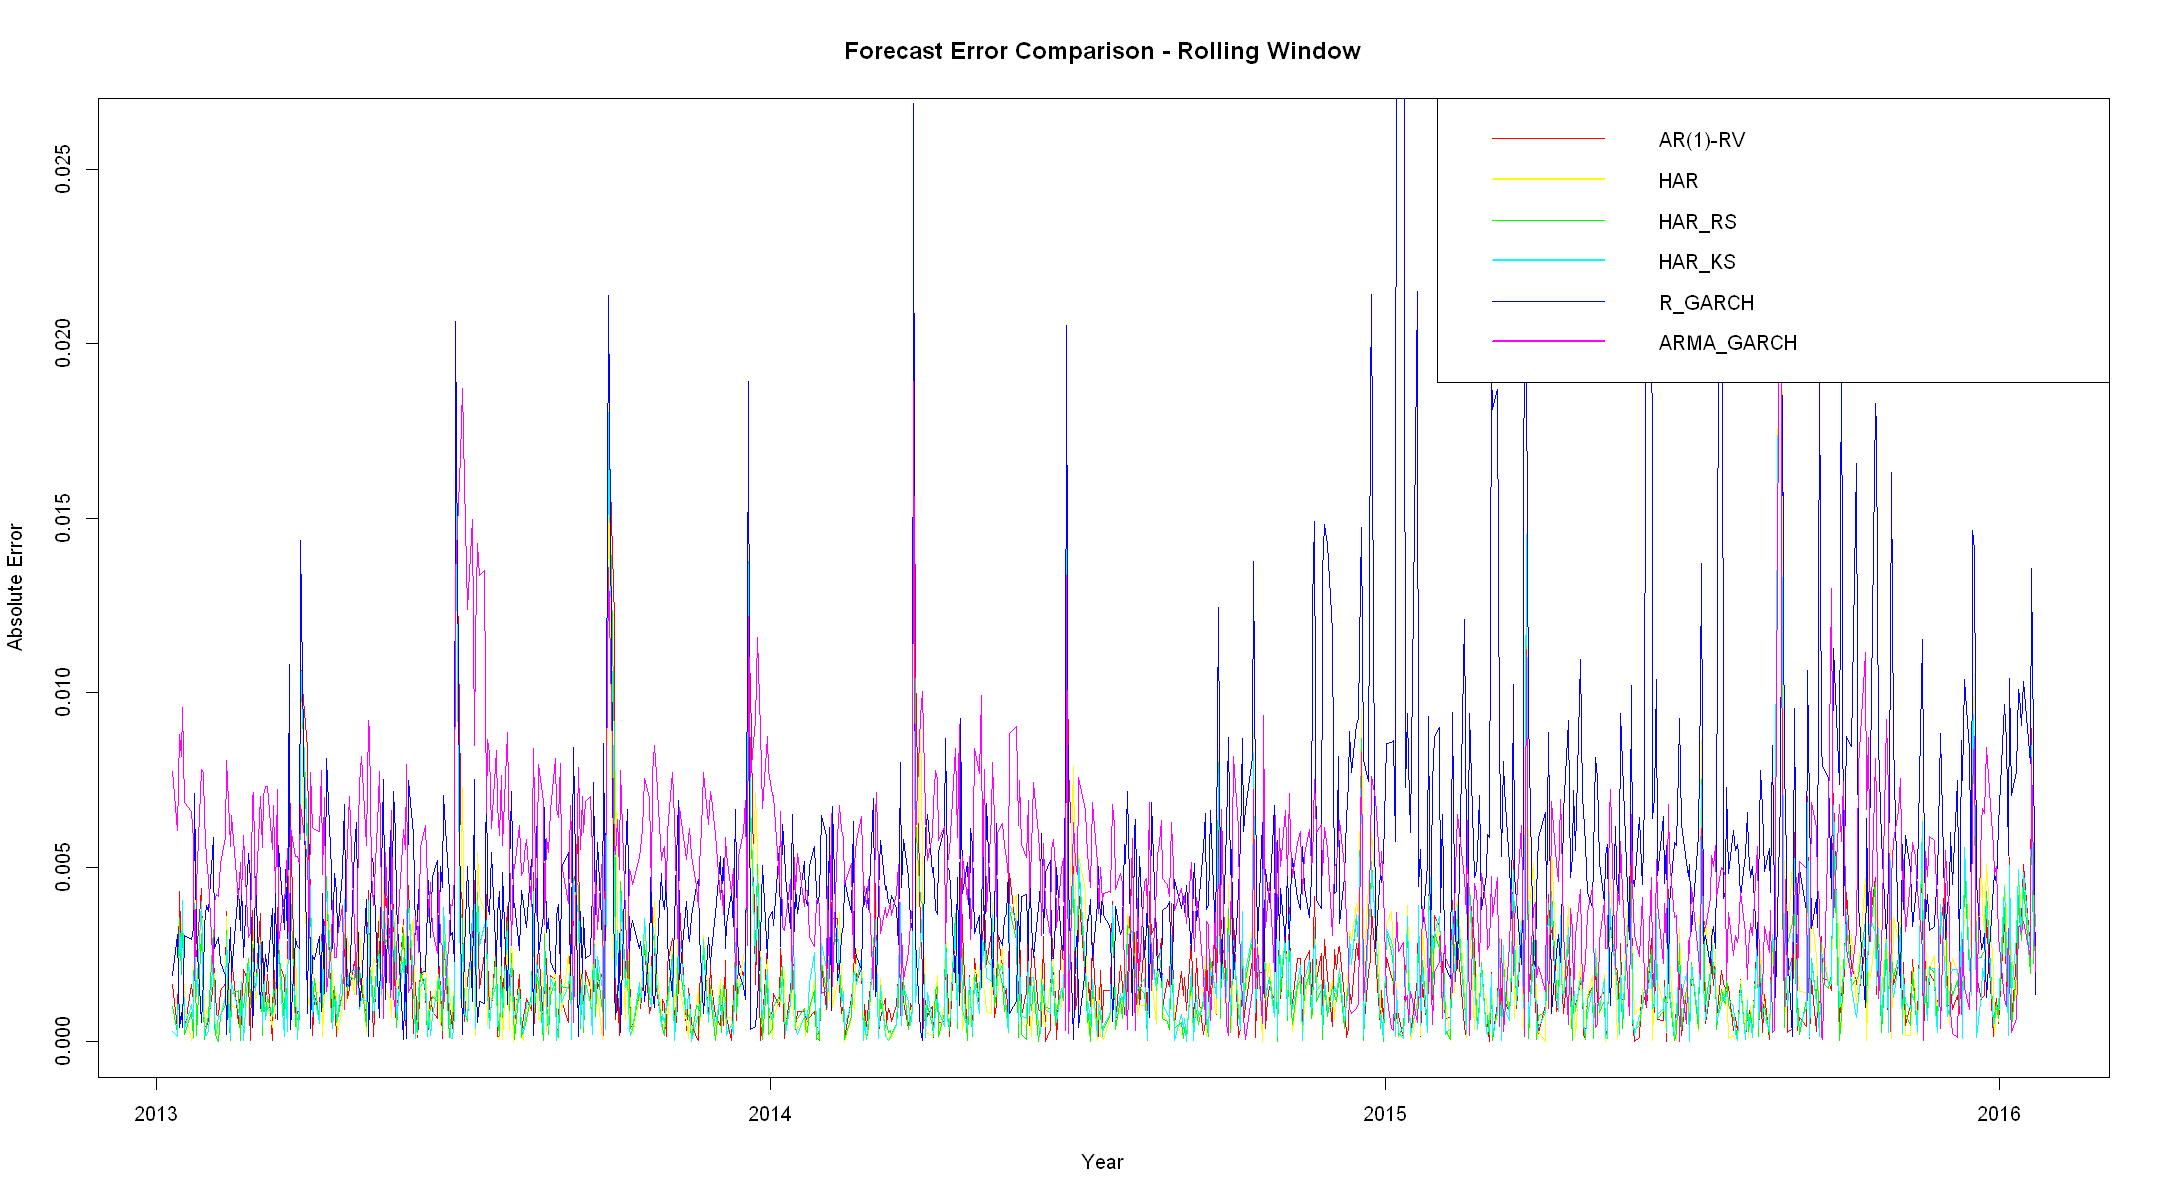

In [86]:
options(repr.plot.width = 18, repr.plot.height = 10)

# Create forecast result list for comparison
model_name_list <- c("AR(1)-RV", "HAR", 'HAR_RS', 'HAR_KS','R_GARCH', 'ARMA_GARCH')
forecast_list_roll <- list(AR1_roll_for, HAR_roll_for, HAR_RS_roll_for, HAR_KS_roll_for, R_GARCH_roll_for, ARMA_GARCH_roll)

# Calculate the absolute error for each forecast model
error_list <- list()
for (i in 1:length(forecast_list_roll)) {
    error_list[[i]] <- abs(RV_day - forecast_list_roll[[i]])
}

rainbow_colors <- rainbow(6)

plot.zoo(error_list[[1]], xlab='Year', ylab="Absolute Error", col = rainbow_colors[1],
         main= "Forecast Error Comparison - Rolling Window")
for (i in 2:length(error_list)) {
    lines(zoo(error_list[[i]]), col = rainbow_colors[i])
}
# Add legend
legend("topright", legend = model_name_list, col = rainbow_colors, lwd = c(1, 2))

options(repr.plot.width = 14, repr.plot.height = 10)

### Loss functions comparison

In [87]:
# join df_mse_exp, df_mae_exp, df_mse_roll and df_mae_roll
df_mse_exp$MSE_roll <- df_mse_roll$MSE
df_mse_exp$MAE <- df_mae_exp$MAE
df_mse_exp$MAE_roll <- df_mae_roll$MAE
df_mse_exp

,MSE,MSE_roll,MAE,MAE_roll
,<dbl>,<dbl>,<dbl>,<dbl>
AR(1)-RV,0.09130067,0.09436442,0.2076782,0.2062894
HAR,0.10049233,0.09983889,0.2093593,0.2073268
HAR_RS,0.08483223,0.08635393,0.1920044,0.1921505
HAR_KS,0.08624548,0.08809614,0.1923358,0.1938527
R_GARCH,0.25145353,0.48552141,0.4011215,0.5249682
ARMA_GARCH,0.35289475,0.29458374,0.5245736,0.4685115


Based on the table, HAR_RS performs the best.

### Thank you for reading!